# Analysis of the autism data

In [ ]:
run init.ipynb

# Retrieve experiments results

In [83]:
from utils import create_autism_df
df = create_autism_df(folder_names = ['13_november_scale_pos_weight'])#'13_november_bis'])#'November 2022'])

100%|██████████| 22/22 [00:02<00:00,  9.00it/s]


In [41]:
results_df_vertical = pd.DataFrame(columns = ['experiment_name', 'imputation_method', 'missing_data_handling', 'scale_data', 'n_features', 'sampling_method', 'score', 'metric_name', 'TP', 'TN', 'FP', 'FN'])

metrics_of_interest = ['AUROC', 'F1 score Corrected', 'Sensitivity', 'Specificity','PPV-Corr', 'TP', 'TN', 'FP', 'FN']
metrics_to_plot = ['AUROC', 'F1 score Corrected', 'Sensitivity', 'Specificity', 'PPV-Corr']#, 'Precision Corrected']

for exp, experiment_row in df.iterrows():
    
    for metric in metrics_of_interest:
        
        results_df_vertical = results_df_vertical.append(pd.DataFrame({'experiment_name':experiment_row['experiment_name'], 
                                                                       'imputation_method':experiment_row['imputation_method'], 
                                                                       'missing_data_handling':experiment_row['missing_data_handling'], 
                                                                       'scale_data':experiment_row['scale_data'], 
                                                                       'n_features': experiment_row['n_features'], 
                                                                       'sampling_method': experiment_row['sampling_method'], 
                                                                       'score':experiment_row[metric], 
                                                                       'metric_name':metric,
                                                                       'TP':experiment_row['TP'], 
                                                                       'TN':experiment_row['TN'], 
                                                                       'FP':experiment_row['FP'], 
                                                                       'FN':experiment_row['FN'], 
                                                                      }, index=[experiment_row['experiment_number']]))

In [12]:
results_df_vertical

experiment_name imputation_method missing_data_handling scale_data n_features sampling_method    score          metric_name  TP   TN  FP  FN
1            use_Z           without               without      False         12         without    0.856                AUROC  32  367  50  18
1            use_Z           without               without      False         12         without    0.279   F1 score Corrected  32  367  50  18
1            use_Z           without               without      False         12         without    0.640          Sensitivity  32  367  50  18
1            use_Z           without               without      False         12         without    0.880          Specificity  32  367  50  18
1            use_Z           without               without      False         12         without      NaN  Precision Corrected  32  367  50  18
..             ...               ...                   ...        ...        ...             ...      ...                  ...  ..  ...  ..  ..
10        Sampling          constant            imputation      False         16         without      NaN  Precision Corrected  32  370  47  18
10        Sampling          constant            imputation      False         16         without   32.000                   TP  32  370  47  18
10        Sampling          constant            imputation      False         16         without  370.000                   TN  32  370  47  18
10        Sampling          constant            imputation      False         16         without   47.000                   FP  32  370  47  18
10        Sampling          constant            imputation      False         16         without   18.000                   FN  32  370  47  18

[189 rows x 12 columns]

In [41]:
df = df.append(pd.DataFrame({'experiment_name': 'EyeTracker', 
                             'Specificity': .98, 
                             'Sensitivity':.17 , 
                             'PPV': .81, 
                             'NPV': .65
                            }, index=[0]))

# Influence of adding the indicator variables

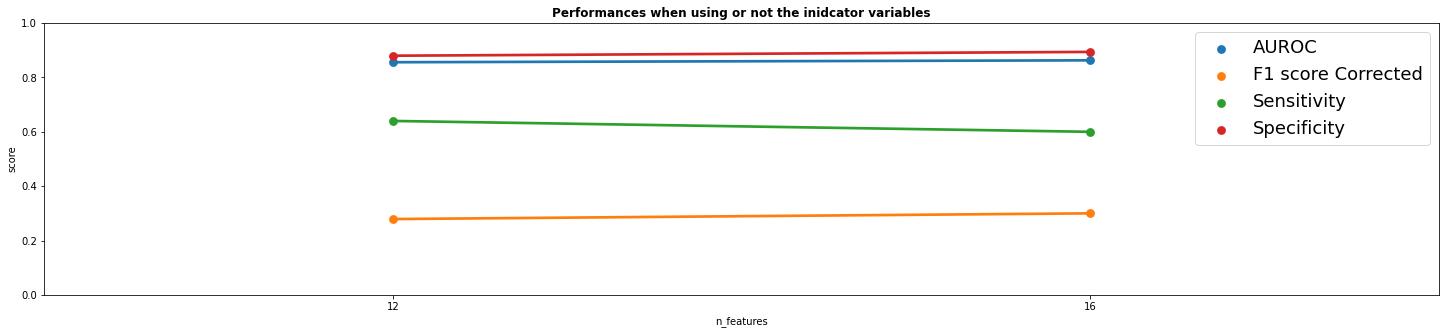

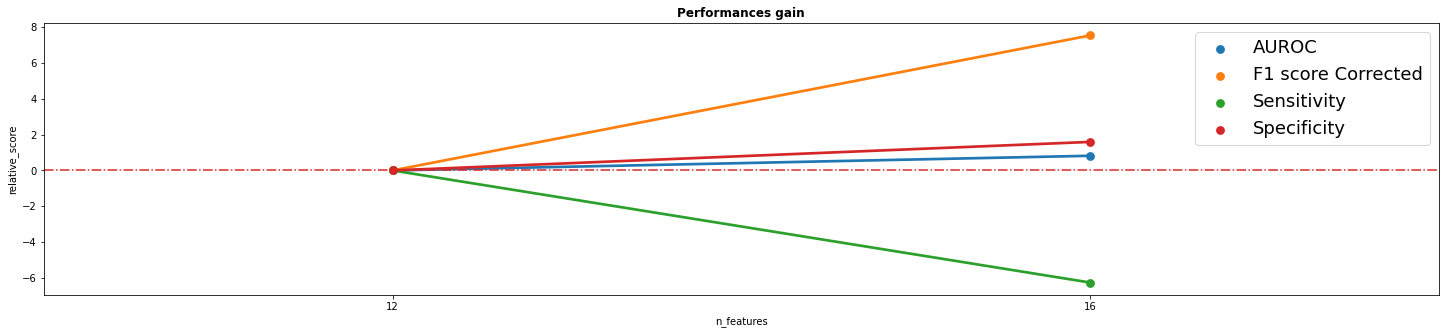

In [15]:
results = results_df_vertical[(results_df_vertical['experiment_name'] == 'use_Z') & (results_df_vertical['metric_name'].isin(metrics_to_plot))]

results.reset_index(drop=True, inplace=True)
results['relative_score'] = np.nan

for idx, row in results.iterrows():
    baseline_score = results.loc[(results['n_features']==12) &(results['metric_name']==row['metric_name']), 'score'].item()
    results.loc[idx, 'relative_score'] = (row['score']-baseline_score)/baseline_score*100


fig = plt.figure(figsize=(25, 5));ax = plt.gca()
ax = sns.pointplot(data=results, x="n_features", y="score", hue='metric_name', ci='sd', ax = ax)
ax.set_title("Performances when using or not the inidcator variables", weight='bold')
ax.set_ylim([0,1]);ax.legend(prop={'size':18})
fig = plt.figure(figsize=(25, 5));ax = plt.gca()
ax = sns.pointplot(data=results, x="n_features", y="relative_score", hue='metric_name', ci='sd', ax = ax)
ax.set_title("Performances gain", weight='bold')
ax.axhline([0], color='tab:red', linestyle='-.');ax.legend(prop={'size':18})


# Influence of the sampling method

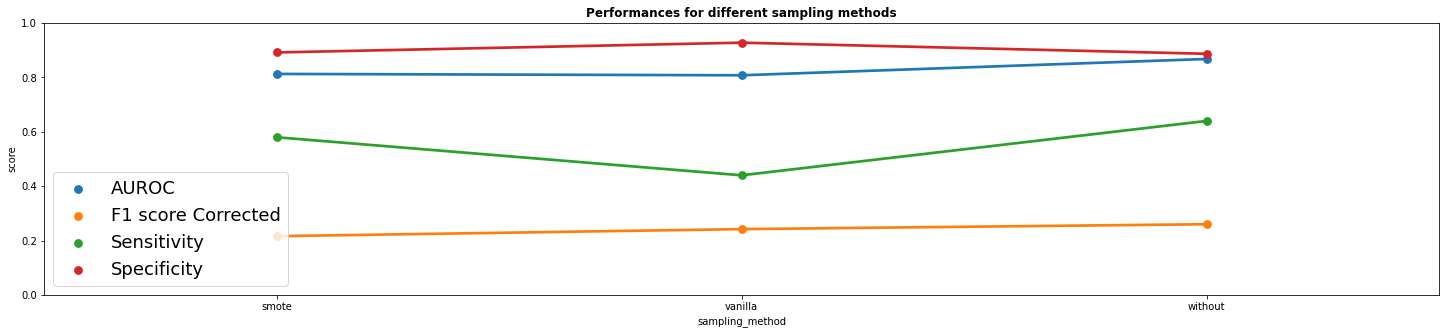

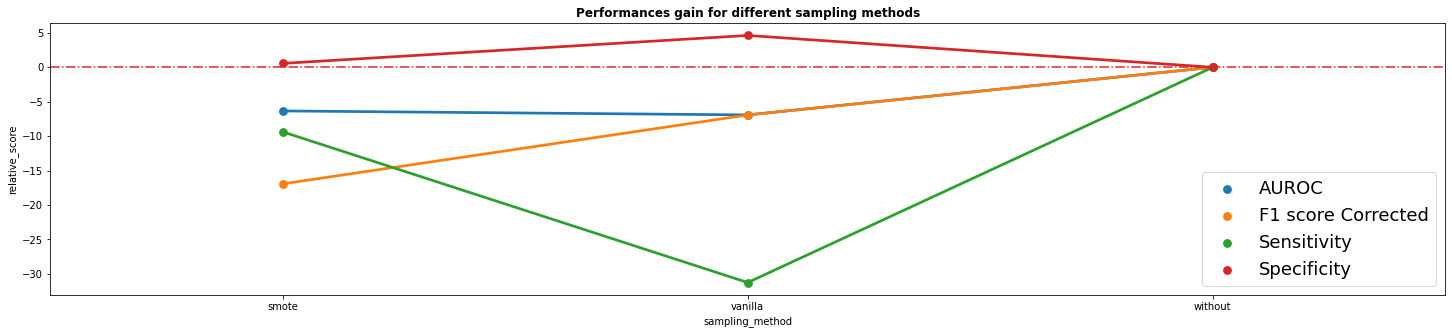

In [16]:
results = results_df_vertical[(results_df_vertical['experiment_name'] == 'Sampling')& (results_df_vertical['metric_name'].isin(metrics_to_plot))]

results.reset_index(drop=True, inplace=True)
results['relative_score'] = np.nan

for idx, row in results.iterrows():
    baseline_score = results.loc[(results['sampling_method']=='without') &(results['metric_name']==row['metric_name']), 'score'].item()
    results.loc[idx, 'relative_score'] = (row['score']-baseline_score)/baseline_score*100



fig = plt.figure(figsize=(25, 5));ax = plt.gca()
ax = sns.pointplot(data=results, x="sampling_method", y="score", hue='metric_name', ci='sd', ax = ax)
ax.set_title("Performances for different sampling methods", weight='bold')
ax.set_ylim([0,1]);ax.legend(prop={'size':18})

fig = plt.figure(figsize=(25, 5));ax = plt.gca()
ax = sns.pointplot(data=results, x="sampling_method", y="relative_score", hue='metric_name', ci='sd', ax = ax)
ax.set_title("Performances gain for different sampling methods", weight='bold')
ax.axhline([0], color='tab:red', linestyle='-.');ax.legend(prop={'size':18})


# Influence of the imputation technics

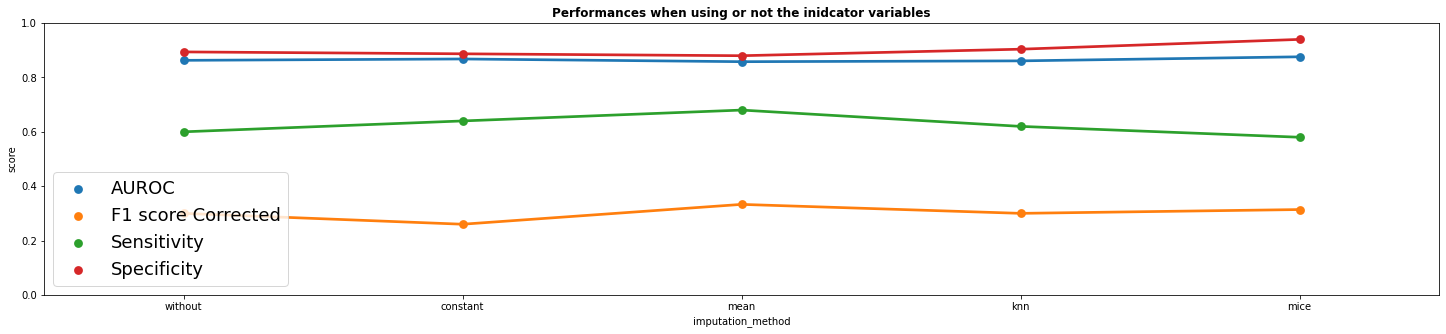

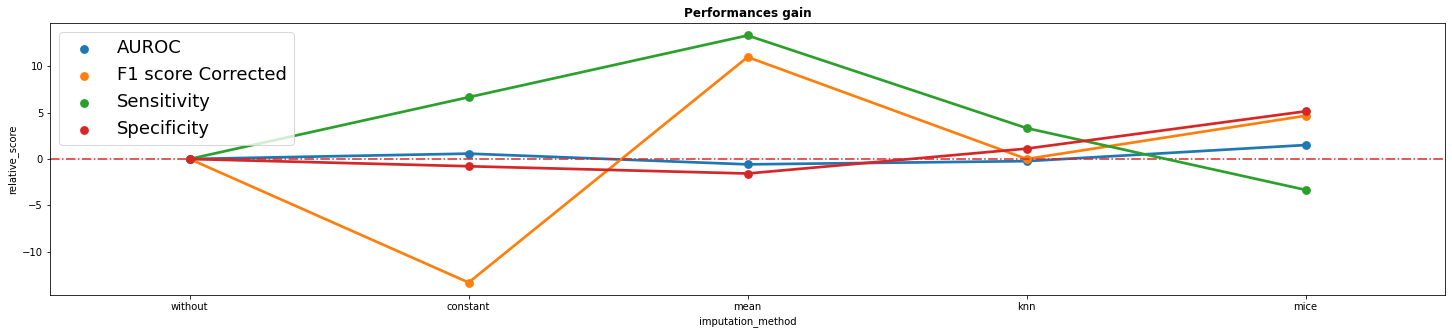

In [17]:
results = results_df_vertical[(results_df_vertical['experiment_name'] == 'Imputation') & (results_df_vertical['metric_name'].isin(metrics_to_plot))]
results.reset_index(drop=True, inplace=True)
results['relative_score'] = np.nan

for idx, row in results.iterrows():
    baseline_score = results.loc[(results['imputation_method']=='without') &(results['metric_name']==row['metric_name']), 'score'].item()
    results.loc[idx, 'relative_score'] = (row['score']-baseline_score)/baseline_score*100

order = ['without', 'constant', 'mean', 'knn', 'mice']

fig = plt.figure(figsize=(25, 5));ax = plt.gca()
ax = sns.pointplot(data=results, x="imputation_method", order=order, y="score", hue='metric_name', ci='sd', ax = ax)
ax.set_title("Performances when using or not the inidcator variables", weight='bold')
ax.set_ylim([0,1]);ax.legend(prop={'size':18})

fig = plt.figure(figsize=(25, 5));ax = plt.gca()
ax = sns.pointplot(data=results, x="imputation_method", order=order, y="relative_score", hue='metric_name', ci='sd', ax = ax)
ax.set_title("Performances gain", weight='bold')
ax.axhline([0], color='tab:red', linestyle='-.');ax.legend(prop={'size':18})

# Influence of the set of variables used

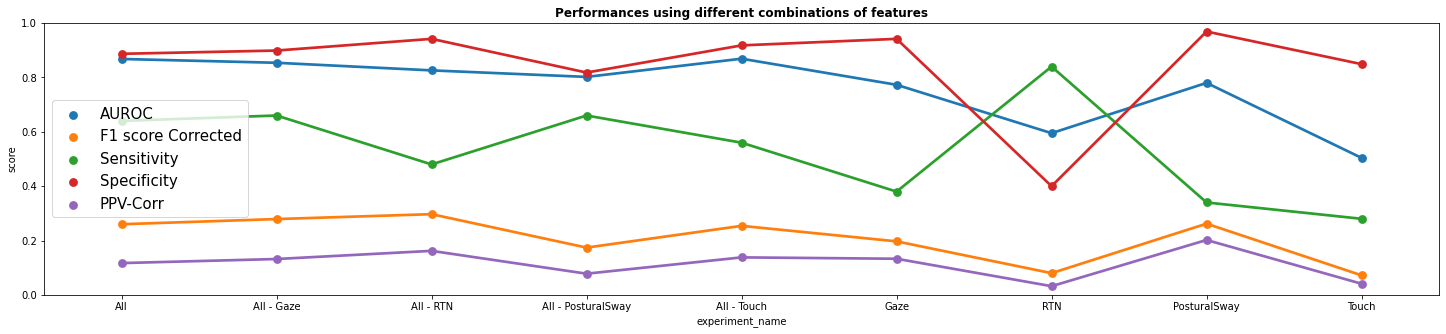

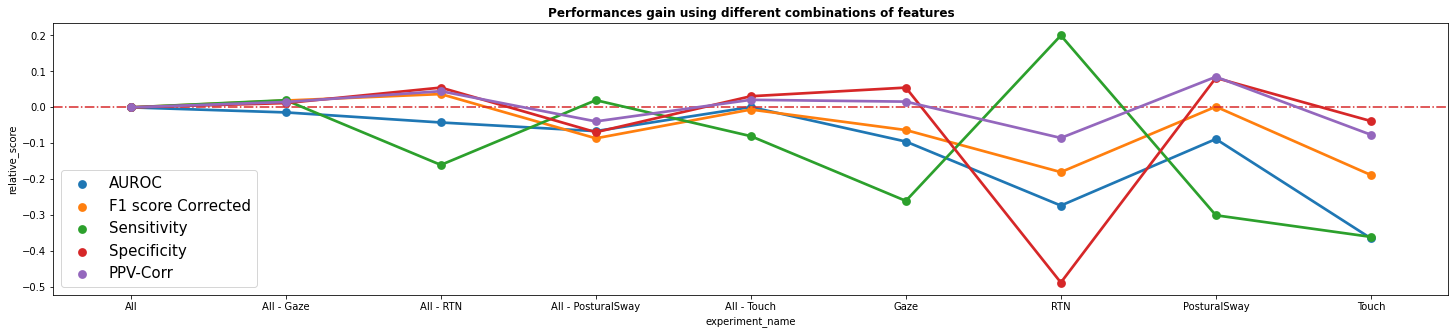

In [80]:
results = results_df_vertical[(results_df_vertical['experiment_name'].str.contains('Multimodal')) & (results_df_vertical['metric_name'].isin(metrics_to_plot))]
results['experiment_name'] = results['experiment_name'].apply(lambda x: x.replace('Multimodal ', ''))
results.reset_index(drop=True, inplace=True)
results['relative_score'] = np.nan

for idx, row in results.iterrows():
    
    baseline_score = results.loc[(results['experiment_name']=='All') &(results['metric_name']==row['metric_name']), 'score'].item()
    
    results.loc[idx, 'relative_score'] = (row['score']-baseline_score)#/baseline_score*100
order_multimodal = ['All', 'All - Gaze', 'All - RTN', 'All - PosturalSway', 'All - Touch', 'Gaze', 'RTN', 'PosturalSway', 'Touch']



fig = plt.figure(figsize=(25, 5));ax = plt.gca()
ax = sns.pointplot(data=results, x="experiment_name", order=order_multimodal, y="score", hue='metric_name', ci='sd', ax = ax)
ax.set_ylim([0,1])
ax.set_title("Performances using different combinations of features", weight='bold');ax.legend(prop={'size':15})



fig = plt.figure(figsize=(25, 5));ax = plt.gca()
ax = sns.pointplot(data=results, x="experiment_name", order=order_multimodal, y="relative_score", hue='metric_name', ci='sd', ax = ax)
#ax.set_ylim([0,1])
ax.set_title("Performances gain using different combinations of features", weight='bold')
ax.axhline([0], color='tab:red', linestyle='-.');ax.legend(prop={'size':15})

In [93]:
r = df[df['experiment_name'].str.contains('Multimodal')]
r['experiment_name'] = r['experiment_name'].apply(lambda x: x.replace('Multimodal ', ''))
r.set_index('experiment_name', inplace=True)

In [94]:
r.drop(columns=['dataset_name','experiment_number', 'approach',
                'missing_data_handling',
                'imputation_method',
                'features_name',
                'n_features',
                'use_missing_indicator_variables',
                'scale_data',
                'sampling_method',
                'scenario',
                'num_samples',
                'imbalance_ratio',	'ratio_of_missing_values',	'ratio_missing_per_class_0',	'ratio_missing_per_class_1',	'resolution',	'bandwidth',	'estimation_time',	'num_cv'])

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected     F1  F1 score Corrected  Accuracy    MCC  Sensitivity  Specificity  Precision  Precision Corrected    PPV    NPV   FNR    FDR    FOR  TP   TN   FP  FN  PPV-Corr
experiment_name                                                                                                                                                                                                                                            
Gaze                0.773   0.343        0.801             0.128                  0.936  0.409               0.197     0.882  0.345         0.38        0.942      0.442                  NaN  0.442  0.927  0.62  0.558  0.073  19  393   24  31     0.133
RTN                 0.595   0.143        0.336             0.032                  0.403  0.246               0.080     0.448  0.154         0.84        0.400      0.144                  NaN  0.144  0.954  0.16  0.856  0.046  42  167  250   8     0.032
All - Gaze          0.854   0.470        0.870             0.204                  0.968  0.528               0.279     0.874  0.471         0.66        0.899      0.440                  NaN  0.440  0.957  0.34  0.560  0.043  33  375   42  17     0.132
All - RTN           0.826   0.451        0.900             0.184                  0.958  0.490               0.297     0.893  0.430         0.48        0.942      0.500                  NaN  0.500  0.938  0.52  0.500  0.062  24  393   24  26     0.162
All                 0.868   0.488        0.916             0.220                  0.978  0.496               0.260     0.861  0.435         0.64        0.887      0.405                  NaN  0.405  0.954  0.36  0.595  0.046  32  370   47  18     0.117
Touch               0.504   0.116        0.073             0.025                  0.270  0.220               0.072     0.788  0.107         0.28        0.849      0.182                  NaN  0.182  0.908  0.72  0.818  0.092  14  354   63  36     0.041
PosturalSway        0.780   0.352        0.865             0.115                  0.874  0.425               0.262     0.901  0.389         0.34        0.969      0.567                  NaN  0.567  0.924  0.66  0.433  0.076  17  404   13  33     0.202
All - Touch         0.869   0.470        0.904             0.178                  0.946  0.500               0.254     0.880  0.436         0.56        0.918      0.452                  NaN  0.452  0.946  0.44  0.548  0.054  28  383   34  22     0.138
All - PosturalSway  0.802   0.340        0.795             0.109                  0.888  0.415               0.174     0.801  0.349         0.66        0.818      0.303                  NaN  0.303  0.953  0.34  0.697  0.047  33  341   76  17     0.078

# Exploration of the model

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0            test  0.868   0.488        0.916              0.22                  0.978                           0.496                0.26     0.861                                   0.435                                               0.64                                                       0.887                                            0.405                                              0.117                                 0.954                                    0.36                             0.595                            0.046  32  370  47  18

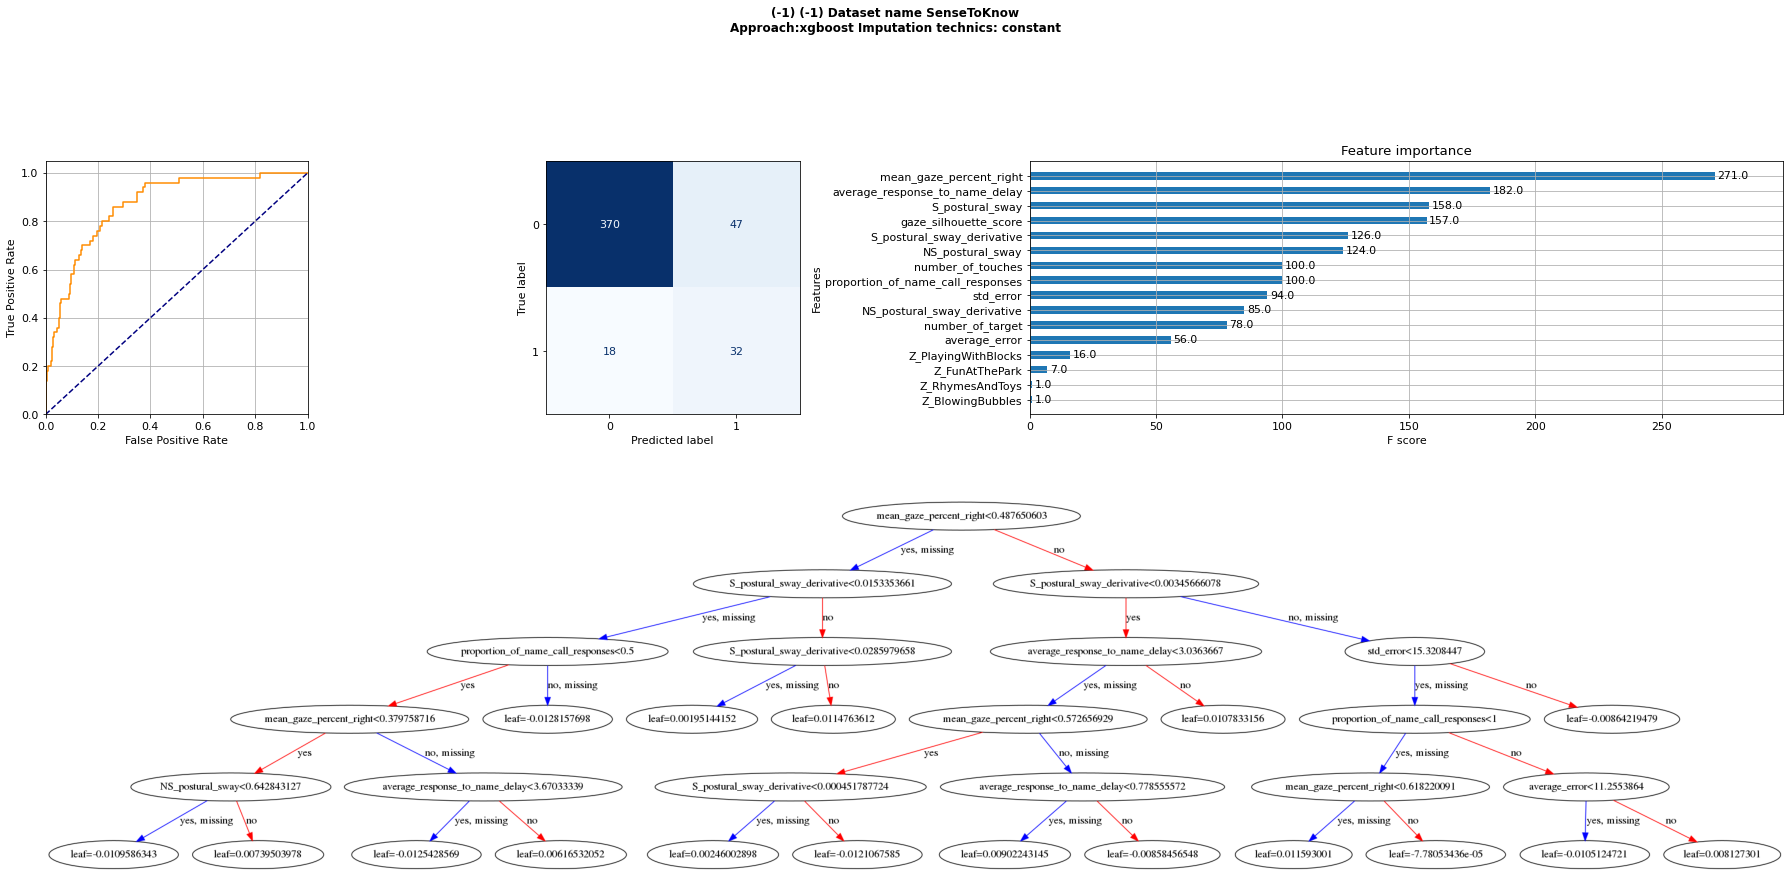

In [140]:
df =  pd.read_csv(AUTISM_DATA_PATH)

data = Dataset(df=df, 
               missing_data_handling='imputation', 
               imputation_method='constant', 
               sampling_method='without',
               outcome_column='diagnosis',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=False,
                use_missing_indicator_variables=USE_MISSING_INDICATOR_PREDICTORS, 
               verbosity=0,
               scenario='multimodal_2023',
               proportion_train=1)

exp = Experiments(data.dataset_name,
                  dataset=data, 
                    approach='xgboost', 
                    previous_experiment=None,
                    experiment_folder_name = 'November 2022',
                    experiment_name = 'test',
                    verbosity=1, 
                    debug=True, 
                    save_experiment=False)
exp.fit_predict(num_cv='loocv')#num_cv='loocv')#num_cv='loocv')

exp.plot()

In [123]:
df =  pd.read_csv(AUTISM_DATA_PATH)

data = Dataset(df=df, 
               missing_data_handling='imputation', 
               imputation_method='constant', 
               sampling_method='without',
               outcome_column='diagnosis',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=False,
                use_missing_indicator_variables=USE_MISSING_INDICATOR_PREDICTORS, 
               verbosity=0,
               scenario=None,
               proportion_train=1)


data.df['administration_number'].unique()

array([   1,    2,    3, ..., 3130, 3131, 3132])

experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0            test  0.868   0.488        0.916              0.22                  0.978                           0.496                0.26     0.861                                   0.435                                               0.64                                                       0.887                                            0.405                                              0.117                                 0.954                                    0.36                             0.595                            0.046  32  370  47  18

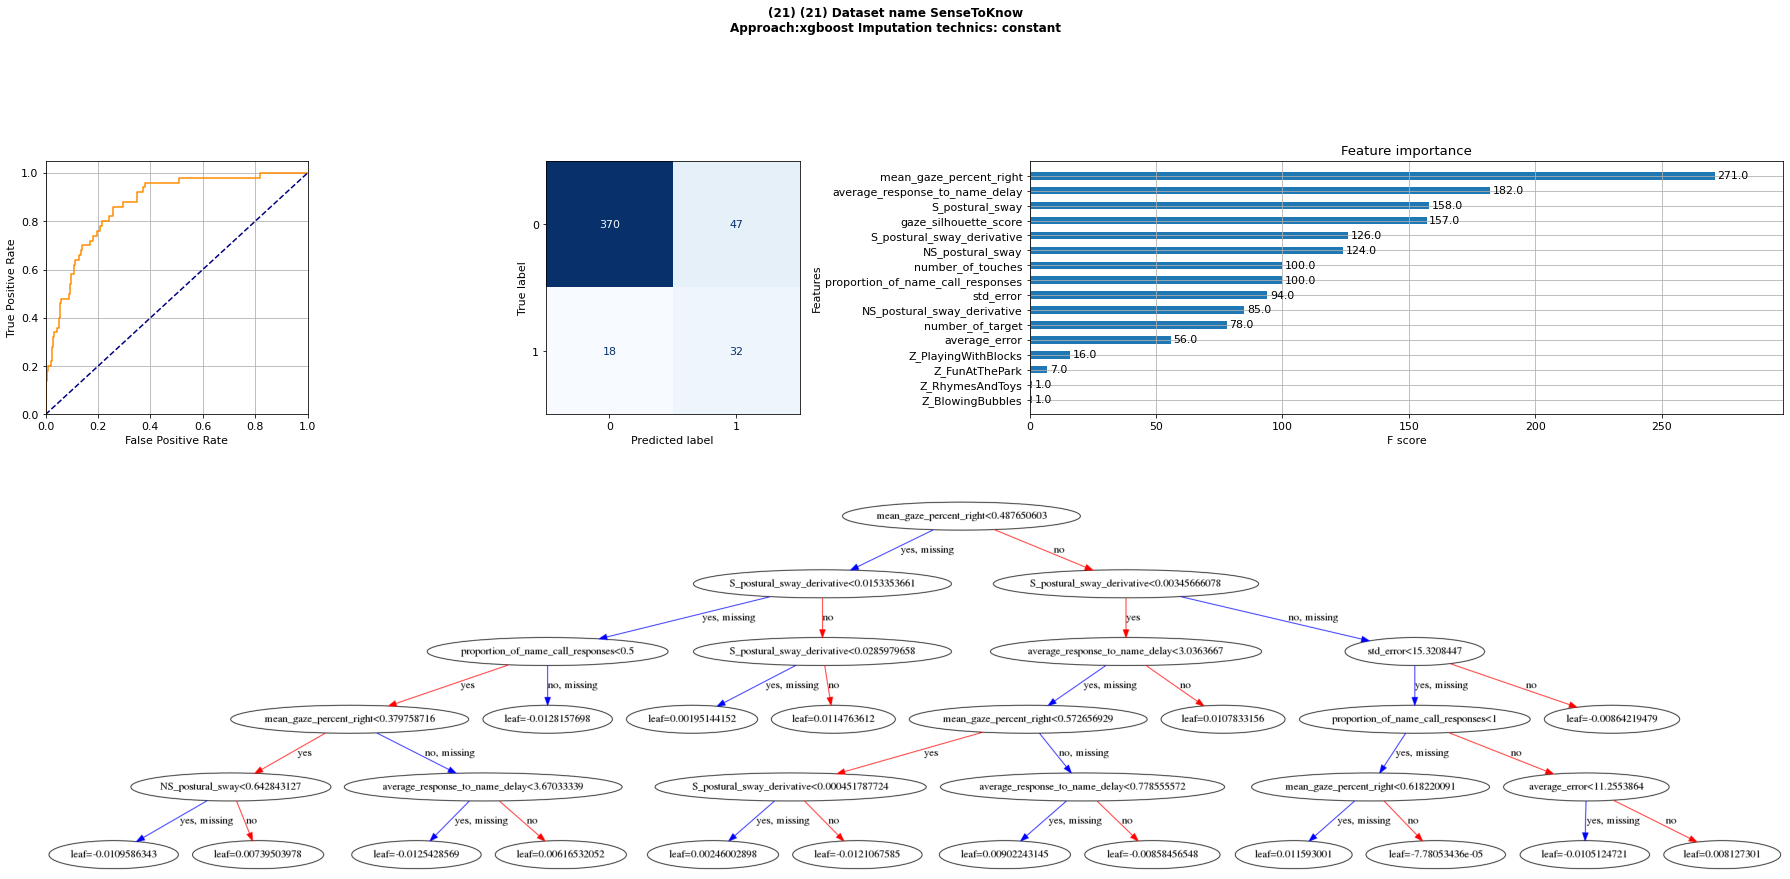

In [100]:
exp.plot()

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
All\n467  0.868   0.488        0.916              0.22                  0.978                           0.496                0.26     0.861                                   0.435                                               0.64                                                       0.887                                            0.405                                              0.117                                 0.954                                    0.36                             0.595                            0.046  32  370  47  18      79.229122       6.852248       10.06424        3.85439  467

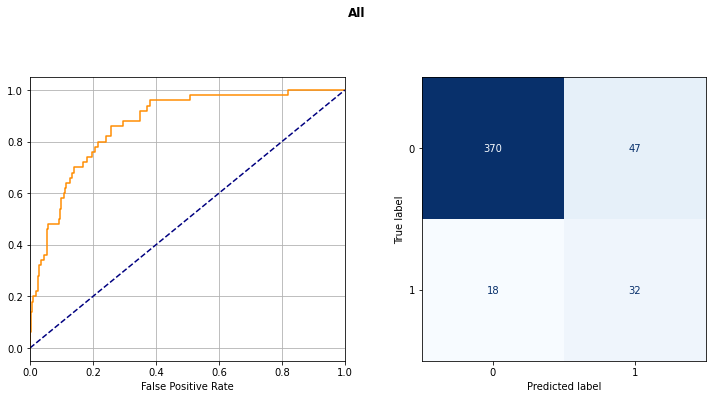

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
All\n467  0.868   0.488        0.916              0.22                  0.978                           0.496                0.26     0.861                                   0.435                                               0.64                                                       0.887                                            0.405                                              0.117                                 0.954                                    0.36                             0.595                            0.046  32  370  47  18      79.229122       6.852248       10.06424        3.85439  467

In [19]:
y_true = exp.predictions_df['y_true'].to_numpy()
y_pred = exp.predictions_df['y_pred'].to_numpy()
compute_results(y_true, y_pred, exp.optimal_threshold, name="All", title="All")

# Ablation study

In [60]:
from model.xgboost.visualization import plot_roc_curves_xgboost
from metrics import f1score, average_precision, bestf1score, calc_auprg, create_prg_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, plot_roc_curve, auc, precision_recall_curve, roc_auc_score, average_precision_score
import prg
def compute_results(y_true, y_pred, threshold, name='?', title=""):


    # Compute imbalance_ratio of our sample
    pi = y_true.mean()
    correction_factor = (pi*(1-REFERENCE_IMBALANCE_RATIO))/(REFERENCE_IMBALANCE_RATIO*(1-pi))
    
    # Compute first AUROC
    auroc = roc_auc_score(y_true, y_pred)

    # Compute the AUC-PR
    auc_pr = average_precision_score(y_true, y_pred)

    # Compute the AUC-PR Corrected
    auc_pr_corrected = average_precision(y_true, y_pred, pi0=REFERENCE_IMBALANCE_RATIO)

    # Compute the AUC-PR Gain
    auc_pr_g = prg.calc_auprg(prg.create_prg_curve(y_true, y_pred))

    # Compute the AUC-PR Gain corrected
    auc_pr_g_corrected = calc_auprg(create_prg_curve(y_true, y_pred, pi0=REFERENCE_IMBALANCE_RATIO))

    # Compute the F1 score
    f1, _ = bestf1score(y_true, y_pred, pi0=None)

    # Compute the corrected F1 score
    f1_corrected, _ = bestf1score(y_true, y_pred, pi0=REFERENCE_IMBALANCE_RATIO)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred >= threshold).ravel()
    
    
    
    # Compute corrected precision (ppv)
    ppv_corr = tp/(tp+correction_factor*fp)

    acc = (tp + tn) / (tp + tn + fp +  fn)
    mcc = (tp*tn - fp*fn) / np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    tpr =  tp / (tp+fn)
    tnr = tn / (tn+fp)
    ppv = tp / (tp+fp)
    npv = tn / (tn+fn)
    fnr = fn / (tp+fn)

    performances_dict = {'AUROC':round(auroc, 3),
                        'AUC-PR': round(auc_pr, 3),
                        'AUC-PR-Gain': round(auc_pr_g, 3),
                        'AUC-PR-Corrected': round(auc_pr_corrected, 3),
                        'AUC-PR-Gain-Corrected' :round(auc_pr_g_corrected, 3),
                        'F1 score (2 PPVxTPR/(PPV+TPR))': round(f1, 3),
                        'F1 score Corrected': round(f1_corrected, 3),
                        'Accuracy' : round(acc, 3),
                        'Matthews correlation coefficient (MCC)': round(mcc, 3),
                        'Sensitivity, recall, hit rate, or true positive rate (TPR)': round(tpr, 3),
                        'Specificity, selectivity or true negative rate (TNR)': round(tnr, 3),
                        'Precision or positive predictive value (PPV)': round(ppv, 3),
                        'Corrected Precision or positive predictive value (PPV)': round(ppv_corr, 3),
                        'Negative predictive value (NPV)': round(npv, 3),
                        'Miss rate or false negative rate (FNR)': round(fnr, 3),
                        'False discovery rate (FDR=1-PPV)': round(1-ppv, 3),
                        'False omission rate (FOR=1-NPV)': round(1-npv, 3),
                        'TP': tp,
                        'TN': tn,
                        'FP': fp,
                        'FN': fn,
                        }
    
    performances_df = pd.DataFrame(performances_dict, index=[name+'\n'+str(len(y_true))])

    performances_df['TN'] = tn
    performances_df['TP'] = tp
    performances_df['FP'] = fp
    performances_df['FN'] = fn

    performances_df['TN_normalized'] = 100*tn/len(y_true)
    performances_df['TP_normalized'] = 100*tp/len(y_true)
    performances_df['FP_normalized'] =  100*fp/len(y_true)
    performances_df['FN_normalized'] =  100*fn/len(y_true)    
    performances_df['N'] = len(y_true) 
    
    display(performances_df)

    fig_mosaic = """
                    AB
                """

    fig, axes = plt.subplot_mosaic(mosaic=fig_mosaic, figsize=(10,5))

    fig.suptitle(title, y=1.1, weight='bold', fontsize=12)

    cm = confusion_matrix(y_true, y_pred >= threshold)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', ax=axes['B']);disp.im_.colorbar.remove()    

    # Plot the roc curves
    
    fpr, tpr, _ = roc_curve(y_true, y_pred); roc_auc = auc(fpr, tpr)
    axes['A'].plot(fpr, tpr, '-', color='darkorange', lw=1.5, label='ROC curve (area = %0.2f)' % roc_auc,)
    axes['A'].plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
    axes['A'].set_xlim([0.0, 1.0]); ax.set_ylim([0.0, 1.05]); axes['A'].grid()
    axes['A'].set_xlabel('False Positive Rate'); ax.set_ylabel('True Positive Rate')
    
    plt.tight_layout()
    plt.show()
    return performances_df

def having_missing(df, features, contrary=True):
    if not contrary:
        return df.loc[df.drop(index=df.dropna(subset=features, how='all').index).index, :]
    else:
        return df.dropna(subset=features, how='all')
    
    
def select(df, feat, value):
    return df[df[feat]==value]  

## Ablation per sex

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
Male\n251  0.848   0.497        0.814             0.142                  0.892                           0.551               0.216     0.833                                   0.452                                              0.641                                                       0.868                                            0.472                                              0.101                                 0.929                                   0.359                             0.528                            0.071  25  184  28  14      73.306773       9.960159      11.155378       5.577689  251

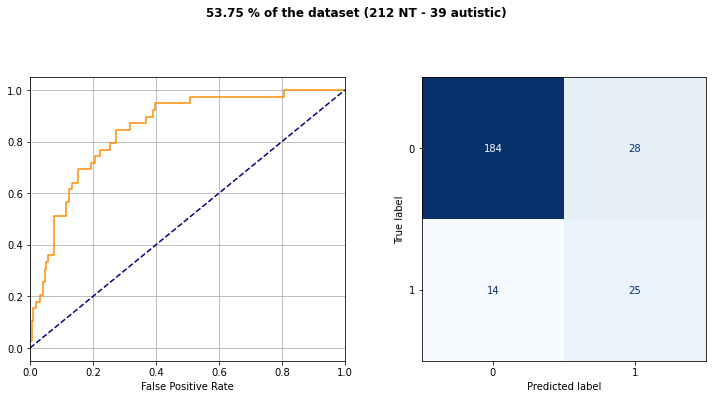

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
Female\n216  0.903   0.488        0.982             0.402                  0.992                             0.5               0.462     0.894                                   0.367                                              0.636                                                       0.907                                            0.269                                              0.138                                 0.979                                   0.364                             0.731                            0.021   7  186  19   4      86.111111       3.240741       8.796296       1.851852  216

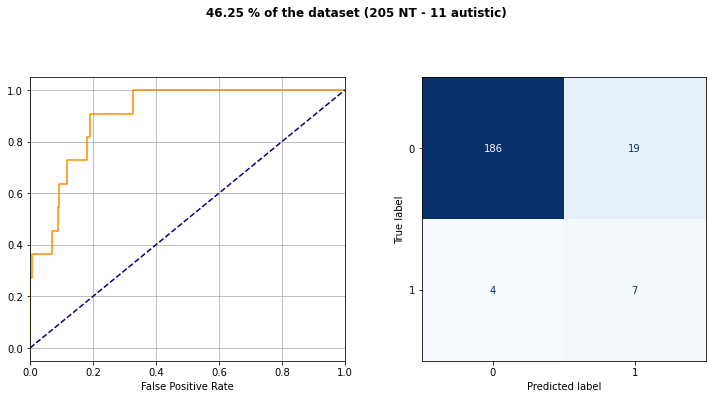

In [61]:
# init the result df for all the dataset
results = deepcopy(exp.performances_df)
results.index = ['All']
for name in ['TP','FN', 'TN', 'FP']:
    results[name+'_normalized'] = 100*exp.predictions_df[name].mean().round(2)
results['N'] = len(exp.predictions_df)

dataframe = deepcopy(exp.predictions_df)

for sex, sex_encoding in zip(['Male', 'Female'], [0,1]):
    
    d=dataframe.iloc[list(exp.dataset.df[exp.dataset.df['sex']==sex_encoding].index)]
    

    title = "{:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(d)/len(dataframe), len(d[d['y_true']==0]), len(d[d['y_true']==1]))
    
    y_true = d['y_true'].to_numpy()
    y_pred = d['y_pred'].to_numpy()
    res = compute_results(y_true, y_pred, exp.optimal_threshold, name=sex, title=title)
    results = results.append(res)

## Ablation per race and ethnicity

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
White/Caucasian\n343   0.89   0.404        0.932             0.207                  0.964                           0.423               0.268     0.872                                   0.345                                               0.56                                                       0.896                                            0.298                                              0.112                                 0.963                                    0.44                             0.702                            0.037  14  285  33  11      83.090379       4.081633       9.620991       3.206997  343

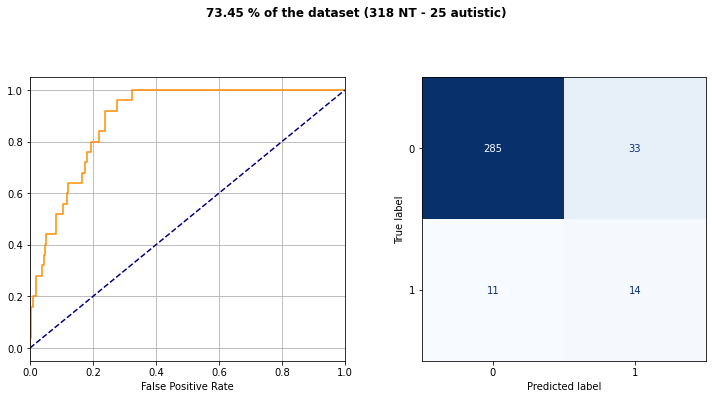

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP  TN  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized   N
Black/African American\n49  0.705   0.223        0.293             0.046                  0.049                           0.421               0.125     0.776                                    0.34                                              0.667                                                       0.791                                            0.308                                              0.069                                 0.944                                   0.333                             0.692                            0.056   4  34   9   2      69.387755       8.163265      18.367347       4.081633  49

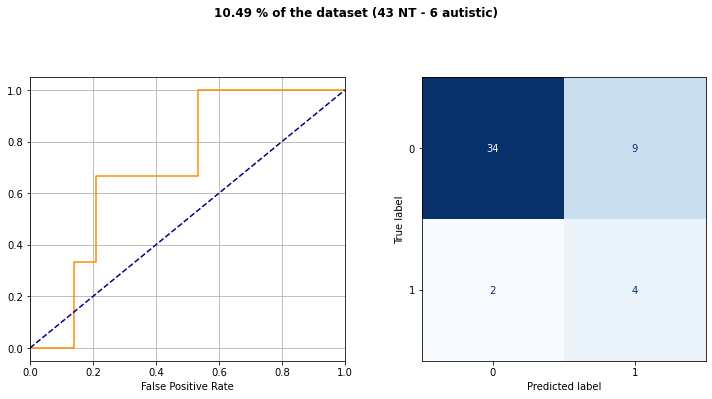

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP  TN  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized   N
Other\n75  0.883   0.821        0.935             0.588                  0.996                           0.757                0.69     0.867                                   0.648                                              0.737                                                       0.911                                            0.737                                              0.161                                 0.911                                   0.263                             0.263                            0.089  14  51   5   5           68.0      18.666667       6.666667       6.666667  75

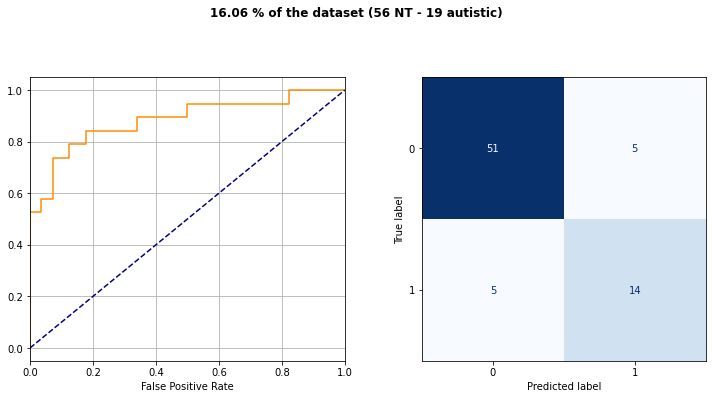

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
Not Hispanic/Latino\n422  0.855   0.413        0.921             0.188                  0.945                           0.453               0.265     0.865                                   0.387                                              0.611                                                       0.889                                            0.338                                              0.113                                 0.961                                   0.389                             0.662                            0.039  22  343  43  14      81.279621        5.21327      10.189573       3.317536  422

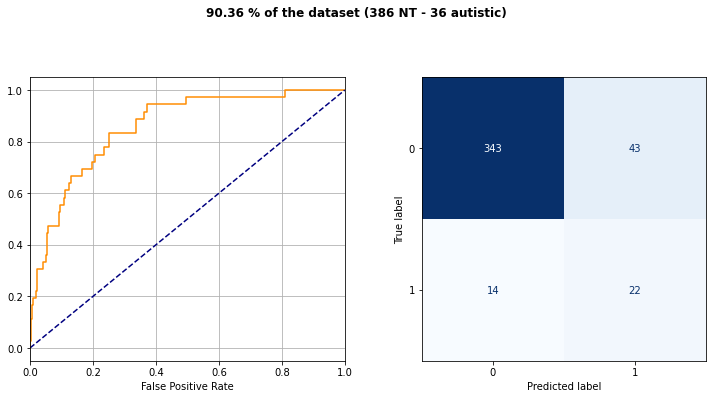

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP  TN  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized   N
Hispanic/Latino\n45  0.894   0.781        0.842             0.317                  0.988                           0.788               0.353     0.822                                   0.585                                              0.714                                                       0.871                                            0.714                                              0.114                                 0.871                                   0.286                             0.286                            0.129  10  27   4   4           60.0      22.222222       8.888889       8.888889  45

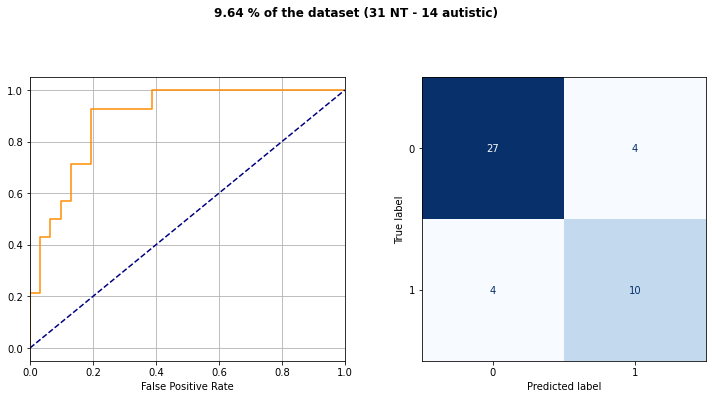

In [62]:

exp.dataset.df.loc[exp.dataset.df['race'].isnull(), 'race'] = -1
for race, race_encoding in zip(['White/Caucasian', 'Black/African American', 'Other'], [0,1, 2]):
    
    d=dataframe.iloc[list(exp.dataset.df[exp.dataset.df['race']==race_encoding].index)]

    title = "{:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(d)/len(dataframe), len(d[d['y_true']==0]), len(d[d['y_true']==1]))
    
    y_true = d['y_true'].to_numpy()
    y_pred = d['y_pred'].to_numpy()

    res = compute_results(y_true, y_pred, exp.optimal_threshold, name=race, title=title)
    
    results = results.append(res)
    
        
for ethnicity, ethnicity_encoding in zip(['Not Hispanic/Latino', 'Hispanic/Latino'], [0,1]):
    
    d=dataframe.iloc[list(exp.dataset.df[exp.dataset.df['ethnicity']==ethnicity_encoding].index)]

    title = "{:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(d)/len(dataframe), len(d[d['y_true']==0]), len(d[d['y_true']==1]))
    
    y_true = d['y_true'].to_numpy()
    y_pred = d['y_pred'].to_numpy()

    res = compute_results(y_true, y_pred, exp.optimal_threshold, name=ethnicity, title=title)
    
    results = results.append(res)
    
    
   

## Ablation per age

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
Age\n21-25\n124  0.837   0.322        0.714             0.097                   0.77                             0.5               0.239     0.871                                   0.407                                              0.583                                                       0.902                                            0.389                                              0.121                                 0.953                                   0.417                             0.611                            0.047   7  101  11   5      81.451613       5.645161       8.870968       4.032258  124

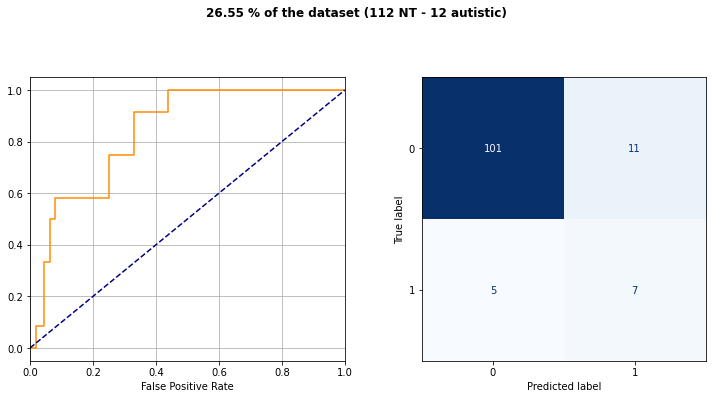

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP  TN  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized   N
Age\n29-36\n12  0.938   0.917        0.951             0.771                  0.998                           0.857               0.857     0.833                                   0.625                                               0.75                                                       0.875                                             0.75                                              0.122                                 0.875                                    0.25                              0.25                            0.125   3   7   1   1      58.333333           25.0       8.333333       8.333333  12

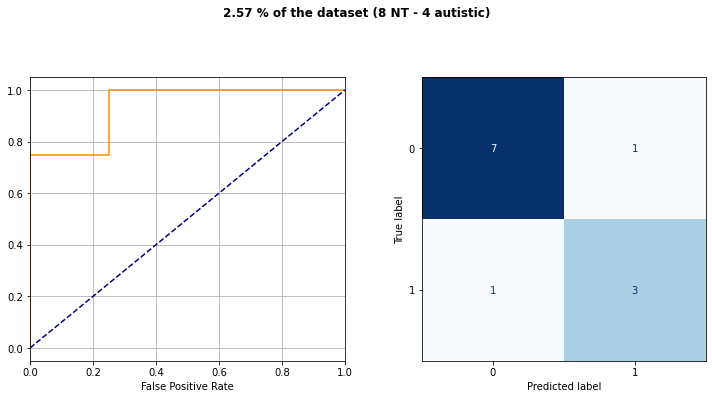

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP  TN  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized   N
Age\n25-29\n31  0.855   0.776        0.764             0.256                  0.973                             0.8               0.303      0.71                                   0.398                                              0.667                                                       0.737                                            0.615                                              0.056                                 0.778                                   0.333                             0.385                            0.222   8  14   5   4       45.16129      25.806452      16.129032      12.903226  31

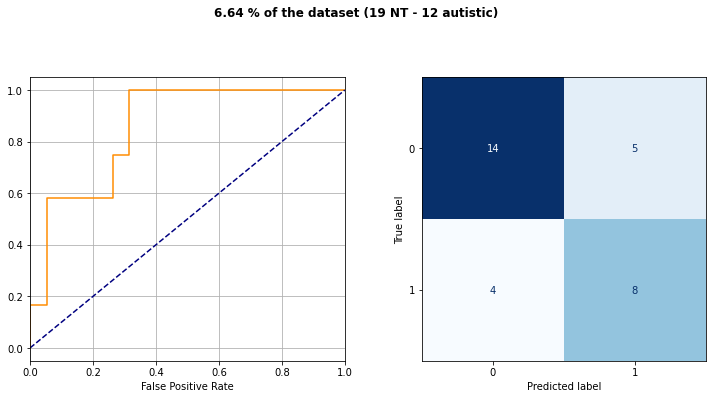

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP  TN  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized   N
Age\n36-50\n13  0.667    0.85        0.239             0.357                  0.969                           0.842                 0.5     0.615                                   0.158                                              0.667                                                         0.5                                             0.75                                               0.03                                   0.4                                   0.333                              0.25                              0.6   6   2   2   3      15.384615      46.153846      15.384615      23.076923  13

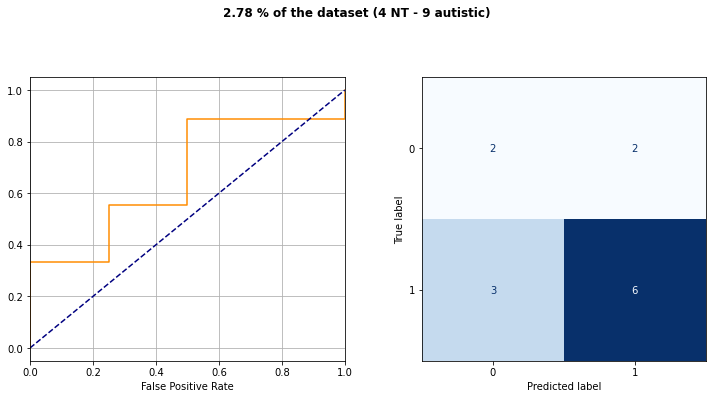

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
Age\n17-21\n287  0.876   0.301        0.945              0.21                  0.973                           0.327               0.235     0.885                                   0.322                                              0.615                                                       0.898                                            0.222                                              0.123                                  0.98                                   0.385                             0.778                             0.02   8  246  28   5      85.714286       2.787456       9.756098        1.74216  287

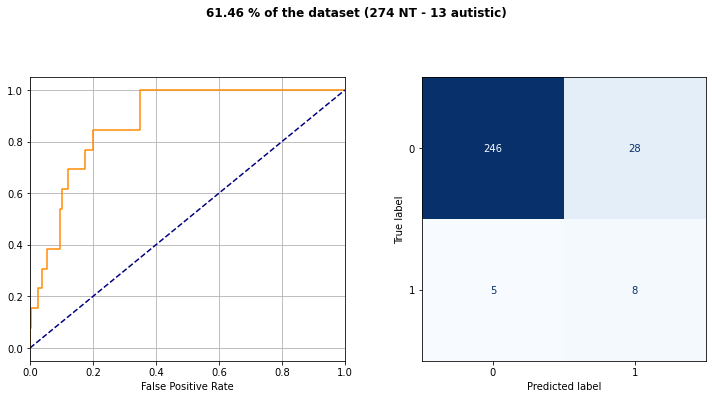

In [63]:
age_bins = [[17, 21], [21, 25], [25, 29], [29, 36], [36, 50]]
exp.dataset.df['age_bin'] = np.nan
for (low_age, high_age) in age_bins:
    
    age_name = 'Age\n{}-{}'.format(low_age, high_age)
    exp.dataset.df.loc[(exp.dataset.df['age'] >= low_age) & (exp.dataset.df['age'] < high_age), 'age_bin'] = age_name
    
    
        
for age_bin in exp.dataset.df['age_bin'].unique():
    
    d=dataframe.iloc[list(exp.dataset.df[exp.dataset.df['age_bin']==age_bin].index)]

    title = "{:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(d)/len(dataframe), len(d[d['y_true']==0]), len(d[d['y_true']==1]))
    
    y_true = d['y_true'].to_numpy()
    y_pred = d['y_pred'].to_numpy()

    res = compute_results(y_true, y_pred, exp.optimal_threshold, name=age_bin, title=title)
    
    results = results.append(res)
    
    

## Ablation per Mchat results

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP  TN  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized   N
No MCHAT\n14  0.756   0.879        0.376             0.472                  0.986                           0.842               0.615     0.714                                   0.378                                              0.778                                                         0.6                                            0.778                                              0.043                                   0.6                                   0.222                             0.222                              0.4   7   3   2   2      21.428571           50.0      14.285714      14.285714  14

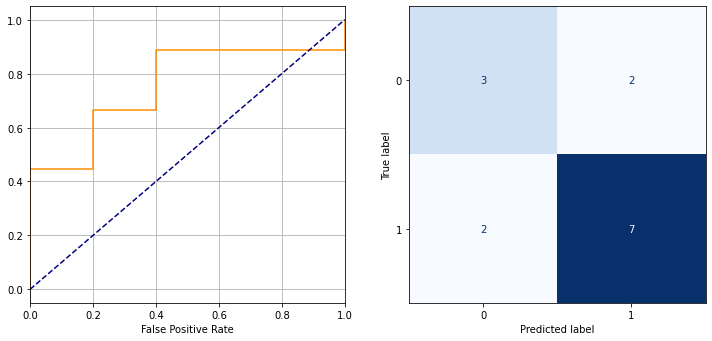

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
MCHAT Negative\n412  0.897   0.163        0.912               0.2                   0.91                           0.222               0.265     0.883                                    0.13                                              0.429                                                       0.891                                            0.064                                              0.084                                 0.989                                   0.571                             0.936                            0.011   3  361  44   4      87.621359       0.728155      10.679612       0.970874  412

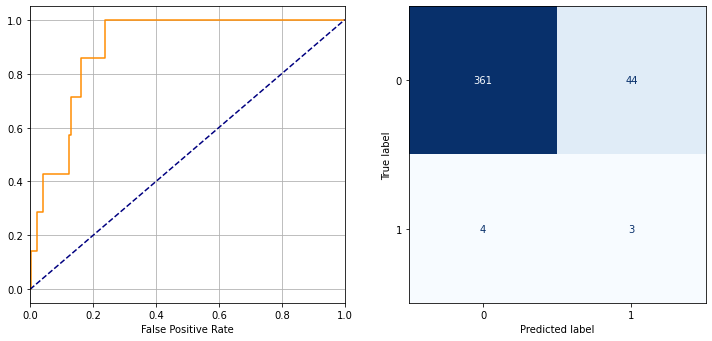

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP  TN  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized   N
MCHAT Positive\n41  0.807   0.939        0.506             0.226                  0.945                           0.944                 0.3     0.683                                   0.382                                              0.647                                                       0.857                                            0.957                                              0.095                                 0.333                                   0.353                             0.043                            0.667  22   6   1  12      14.634146      53.658537       2.439024      29.268293  41

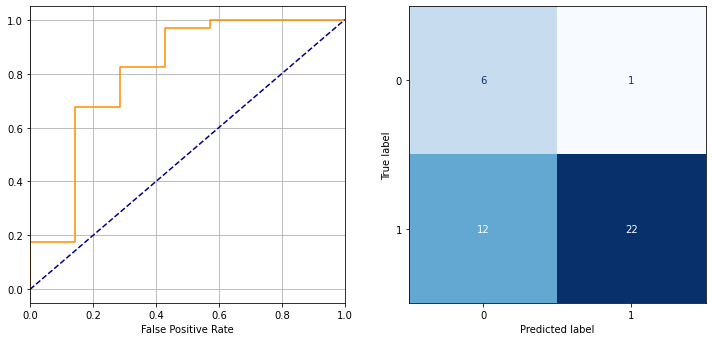

In [64]:
res_without_mchat = exp.predictions_df.iloc[exp.dataset.df[exp.dataset.df['mchat_final'].isnull()].index]
y_true = res_without_mchat['y_true'].to_numpy()
y_pred = res_without_mchat['y_pred'].to_numpy()
res = compute_results(y_true, y_pred, exp.optimal_threshold, name='No MCHAT', title="")
results = results.append(res)


res_without_mchat = exp.predictions_df.iloc[exp.dataset.df[exp.dataset.df['mchat_result'] == 0].index]
y_true = res_without_mchat['y_true'].to_numpy()
y_pred = res_without_mchat['y_pred'].to_numpy()
res = compute_results(y_true, y_pred, exp.optimal_threshold, name='MCHAT Negative', title="")
results = results.append(res)

res_without_mchat = exp.predictions_df.iloc[exp.dataset.df[exp.dataset.df['mchat_result'] == 1].index]
y_true = res_without_mchat['y_true'].to_numpy()
y_pred = res_without_mchat['y_pred'].to_numpy()
res = compute_results(y_true, y_pred, exp.optimal_threshold, name='MCHAT Positive', title="")
results = results.append(res)

## Ablation per missing data patterns

In [65]:
grouped_missing_features = {'mean_gaze_percent_right': ['mean_gaze_percent_right'],
                             'gaze_silhouette_score': ['gaze_silhouette_score'],
                             'proportion_of_name_call_responses': ['proportion_of_name_call_responses'],
                             'average_response_to_name_delay': ['average_response_to_name_delay'],
                            
                             'S_postural_sway': ['S_postural_sway'],
                             'NS_postural_sway': ['NS_postural_sway'],
                             'S_postural_sway': ['S_postural_sway'],
                             'S_postural_sway_derivative': ['S_postural_sway_derivative'],
                             'NS_postural_sway_derivative': ['NS_postural_sway_derivative'],
                             'Game': ['average_length','std_length','average_error', 'pop_rate','average_delay_to_pop','average_time_spent']}

grouped_missing_features = {'Gaze': ['mean_gaze_percent_right', 'gaze_silhouette_score'],
                                     'Social': ['S_postural_sway', 'S_postural_sway_derivative'],
                                     'Non Social': ['NS_postural_sway', 'NS_postural_sway_derivative'],
                                     'average_response_to_name_delay': ['average_response_to_name_delay'],
                                     'Game': ['std_error',
                                             'number_of_touches',
                                             'number_of_target',
                                             'average_error']}


In [66]:

X  = deepcopy(exp.predictions_df[exp.features_name])
dataset = X.copy()

vars = dataset.dtypes.index.values
n_var = dataset.shape[1]

# set up missing data patterns
r = 1 * dataset.isnull()
mdp = np.dot(r, list(map(lambda x: pow(2, x), range(n_var))))
sorted_mdp = sorted(np.unique(mdp))
n_pat = len(sorted_mdp)
correct_mdp = list(map(lambda x: sorted_mdp.index(x), mdp))
exp.predictions_df["mdp"] = pd.Series(correct_mdp, index=dataset.index)




dataframe = deepcopy(exp.predictions_df)
for name_missing, feature_missing  in grouped_missing_features.items():
    
    print("{} {:.2f}% with {:.2f} NT and {:.2f} autistic".format(name_missing, 100*len(having_missing(dataframe, feature_missing, contrary=False))/len(dataframe), 
                                                                 100*round(len(having_missing(select(dataframe, 'y_true', 0), feature_missing, contrary=False))/len(select(dataframe, 'y_true', 0)), 2), 
                                                                 100*round(len(having_missing(select(dataframe, 'y_true', 1), feature_missing, contrary=False))/len(select(dataframe, 'y_true', 1)), 2)))

Gaze 4.93% with 5.00 NT and 6.00 autistic
Social 4.71% with 5.00 NT and 6.00 autistic
Non Social 0.00% with 0.00 NT and 0.00 autistic
average_response_to_name_delay 25.48% with 25.00 NT and 28.00 autistic
Game 28.27% with 29.00 NT and 24.00 autistic


In [67]:
dataframe["mdp"].value_counts(normalize=True)

0     0.494647
10    0.179872
2     0.143469
11    0.072805
5     0.036403
6     0.021413
12    0.017131
7     0.010707
13    0.008565
14    0.004283
9     0.002141
4     0.002141
1     0.002141
8     0.002141
3     0.002141
Name: mdp, dtype: float64

Number of missing patterns: 15


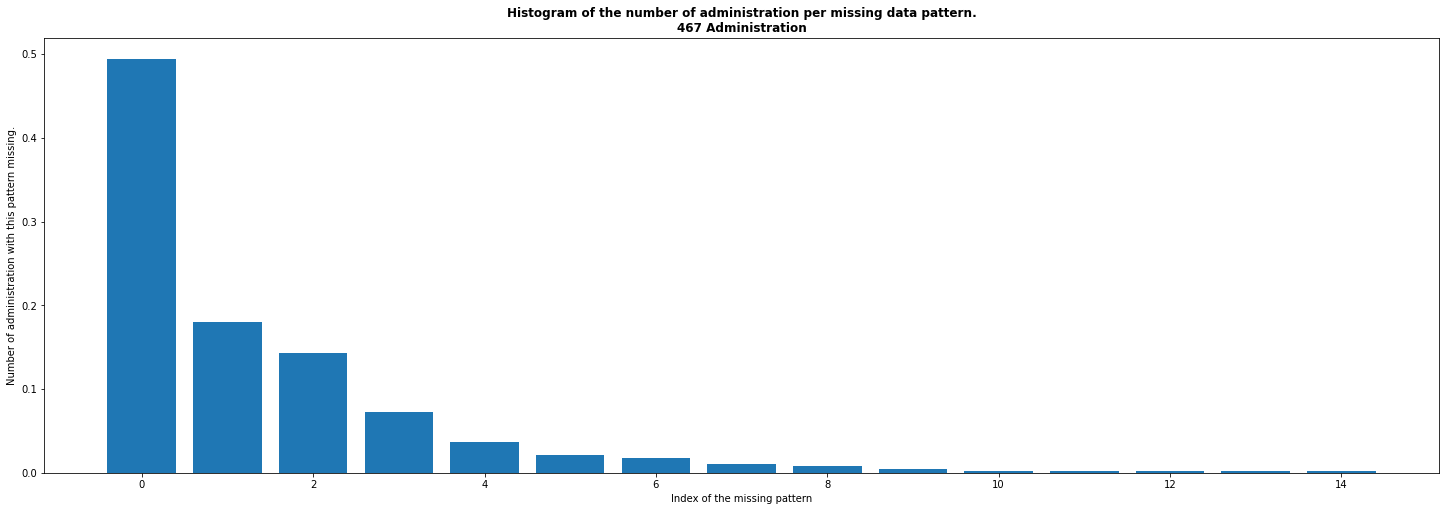

In [68]:
plt.figure(figsize=(25, 8))
plt.bar(x=np.arange((len(dataframe["mdp"].value_counts().index))), height=dataframe["mdp"].value_counts(normalize=True).to_numpy())
plt.title("Histogram of the number of administration per missing data pattern.\n{} Administration".format(len(dataframe)), weight='bold');plt.xlabel("Index of the missing pattern"); plt.ylabel("Number of administration with this pattern missing.")
print("Number of missing patterns: {}".format(n_pat))
matrix = pd.DataFrame(
            data=np.zeros(shape=(len(dataframe["mdp"].value_counts().index), len(exp.features_name)+1)),
            columns=exp.features_name+['Percentage of rows'],
            index=dataframe["mdp"].unique(),
        ).sort_index()

Text(0.5, 1.0, 'Features missing for the most frequent patterns. 467 adm (417 NT, 50 ASD)')

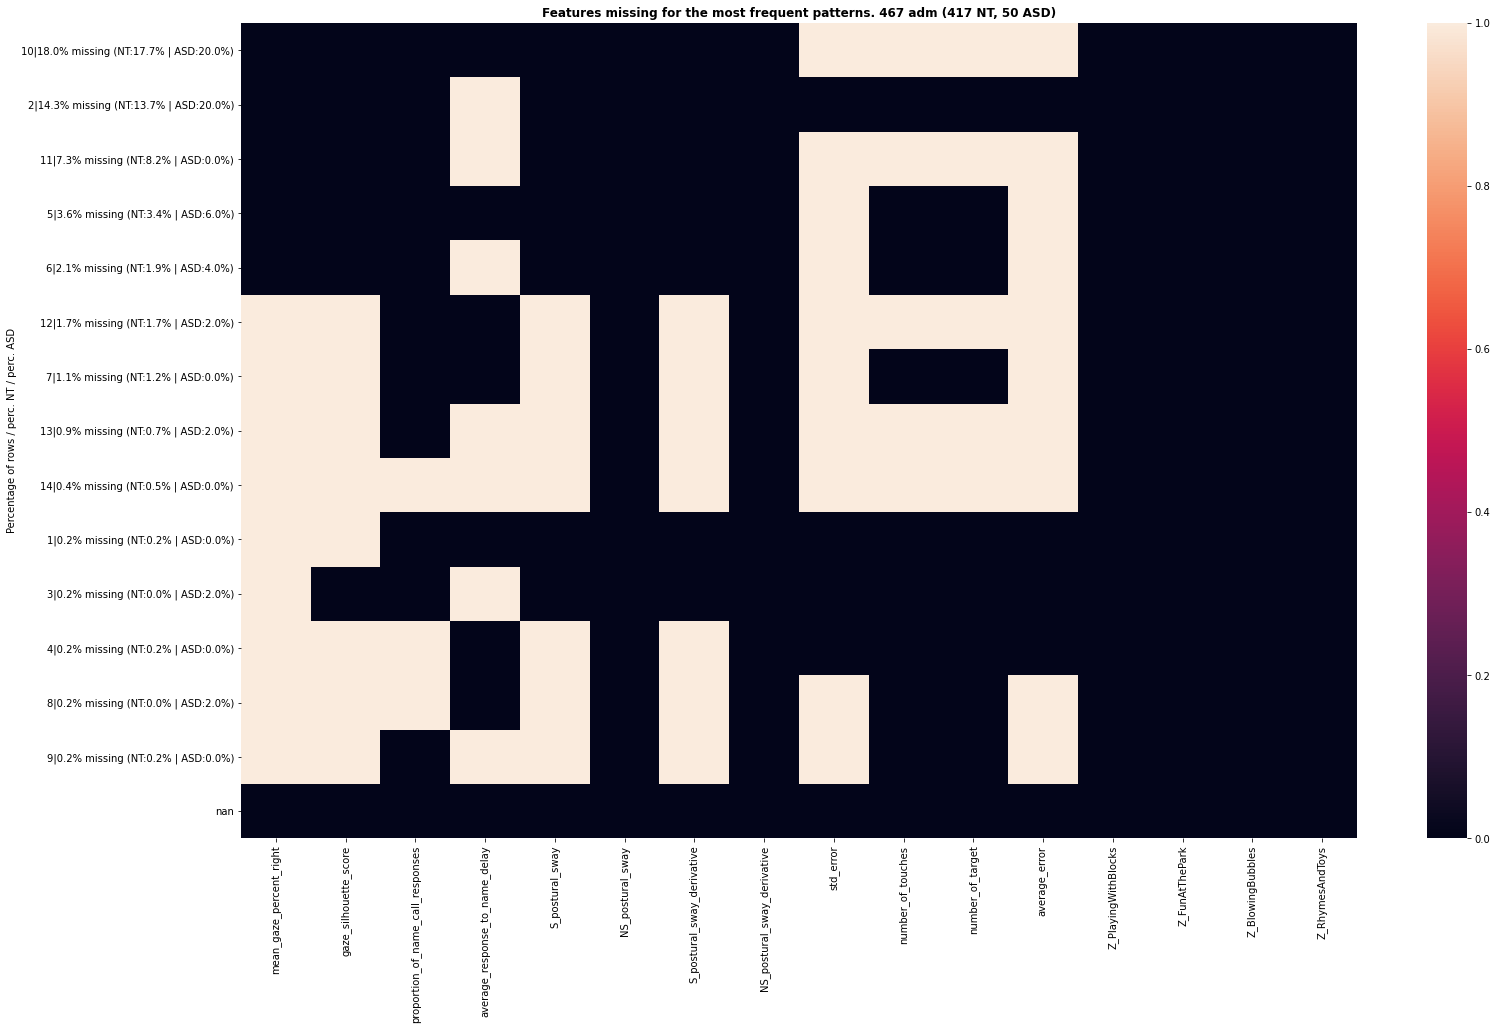

In [69]:
for pattern in sorted(dataframe["mdp"].unique())[1:]:
    d = dataframe.loc[dataframe['mdp']==pattern, ['y_true'] + exp.features_name]
    missing_columns = list(d.columns[d.isnull().any()])
    matrix.loc[pattern, missing_columns] = 1
    matrix.loc[pattern, 'Percentage of rows'] = np.round(len(d)/len(dataframe)*100,2)
    #matrix.loc[pattern, 'Percentage of rows (autism)'] = np.round(len(d[d['diagnosis']==0])/len(data.df[data.df['diagnosis']==0])*100,2)
    #matrix.loc[pattern, 'Percentage of rows (NT)'] = np.round(len(d[d['diagnosis']==1])/len(data.df[data.df['diagnosis']==1])*100,2)
    matrix.loc[pattern, 'Percentage of rows / perc. NT / perc. ASD'] = "{}|{}% missing (NT:{}% | ASD:{}%)".format(pattern,np.round(len(d)/len(dataframe)*100,1), np.round(len(d[d['y_true']==0])/len(dataframe[dataframe['y_true']==0])*100,1), np.round(len(d[d['y_true']==1])/len(dataframe[dataframe['y_true']==1])*100,1))
matrix.sort_values('Percentage of rows', ascending=False, inplace=True)
plt.figure(figsize=(25, 15))
sns.heatmap(matrix.set_index('Percentage of rows / perc. NT / perc. ASD').loc[:, exp.features_name].astype(int))
plt.title("Features missing for the most frequent patterns. {} adm ({} NT, {} ASD)".format(len(dataframe), len(dataframe[dataframe['y_true']==0]), len(data.df[dataframe['y_true']==1])), weight='bold')



AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
Complete\n231  0.889   0.558        0.961             0.345                  0.991                           0.524               0.383      0.87                                   0.484                                              0.762                                                       0.881                                             0.39                                               0.13                                 0.974                                   0.238                              0.61                            0.026  16  185  25   5       80.08658       6.926407      10.822511       2.164502  231

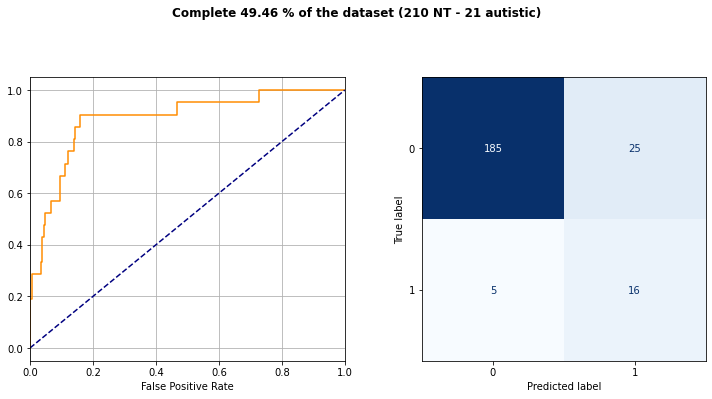

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP  TN  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized   N
Only game missing\n84  0.868   0.539        0.919             0.303                  0.986                           0.522               0.333     0.881                                   0.432                                                0.5                                                       0.932                                              0.5                                              0.147                                 0.932                                     0.5                               0.5                            0.068   5  69   5   5      82.142857       5.952381       5.952381       5.952381  84

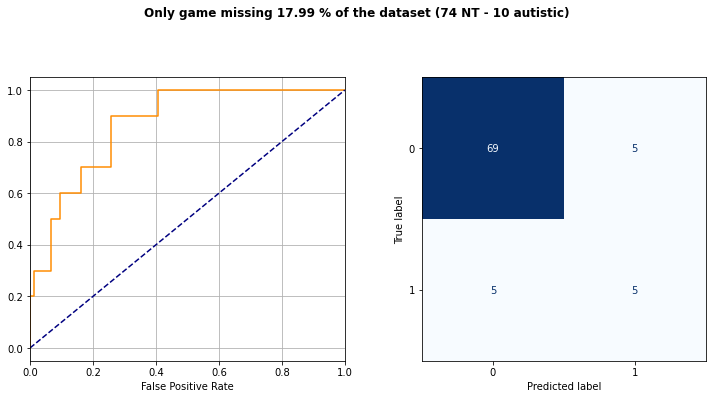

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP  TN  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized   N
Only delay missing\n67  0.947   0.731        0.921             0.337                  0.978                            0.75                0.51      0.91                                   0.678                                                0.8                                                        0.93                                            0.667                                               0.21                                 0.964                                     0.2                             0.333                            0.036   8  53   4   2      79.104478      11.940299       5.970149       2.985075  67

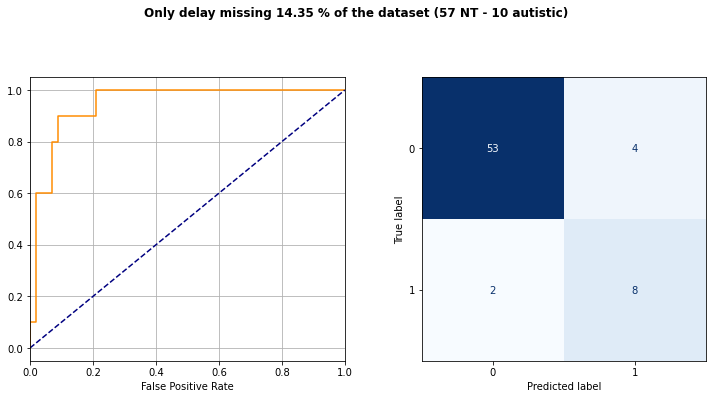

In [70]:
from metrics import f1score, average_precision, bestf1score, calc_auprg, create_prg_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, plot_roc_curve, auc, precision_recall_curve, roc_auc_score, average_precision_score
import prg

dataframe = deepcopy(exp.predictions_df)
mapping_name = {0: "Complete", 
                10: "Only game missing", 
                2: "Only delay missing"}
               # 11: "Game & Delay missing"}

#for mdp_index in mapping_name.keys():
#    d = dataframe[dataframe['mdp']==mdp_index]

grouped_missing_features = {'None': DEFAULT_PREDICTORS,
                            'mean_gaze_percent_right': ['mean_gaze_percent_right'],
                             'gaze_silhouette_score': ['gaze_silhouette_score'],
                             'proportion_of_name_call_responses': ['proportion_of_name_call_responses'],
                             'average_response_to_name_delay': ['average_response_to_name_delay'],
                            
                             'S_postural_sway': ['S_postural_sway'],
                             'NS_postural_sway': ['NS_postural_sway'],
                             'S_postural_sway': ['S_postural_sway'],
                             'S_postural_sway_derivative': ['S_postural_sway_derivative'],
                             'NS_postural_sway_derivative': ['NS_postural_sway_derivative'],
                             'Game': ['average_length','std_length','average_error', 'pop_rate','average_delay_to_pop','average_time_spent'], 
                             }

for mdp_index in mapping_name.keys():
    d = dataframe[dataframe['mdp']==mdp_index]

    
    title = mapping_name[mdp_index]
    title+= " {:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(d)/len(dataframe), len(d[d['y_true']==0]), len(d[d['y_true']==1]))
    
    y_true = d['y_true'].to_numpy()
    y_pred = d['y_pred'].to_numpy()
    
    res = compute_results(y_true, y_pred, exp.optimal_threshold, name=mapping_name[mdp_index], title=title)
    
    results = results.append(res)
    
    
    

## Analysis of the results

In [ ]:
results.reset_index(inplace=True)
results.rename(columns={'Sensitivity, recall, hit rate, or true positive rate (TPR)':'Sensitivity', 
                       'Specificity, selectivity or true negative rate (TNR)':'Specificity', 
                       'Corrected Precision or positive predictive value (PPV)':'PPV-Corr', 
                       }, inplace=True)
results.rename(columns={'index': 'subgroup'}, inplace=True)
results['subgroup_name'] = results['subgroup'].apply(lambda x: x.split('\n')[0] if x.split('\n')[0]!='Age' else x.split('\n')[0] + '\n' + x.split('\n')[1])

#del results['experiment_name']
results

In [79]:
results.set_index('subgroup_name')


subgroup  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity  Specificity  Precision or positive predictive value (PPV)  PPV-Corr  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN  TP_normalized  FN_normalized  TN_normalized  FP_normalized    N
subgroup_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
All                                            All  0.868   0.488        0.916             0.220                  0.978                           0.496               0.260     0.861                                   0.435        0.640        0.887                                         0.405     0.117                            0.954                                   0.360                             0.595                            0.046  32  370  47  18       7.000000       4.000000      79.000000      10.000000  467
Male                                     Male\n251  0.848   0.497        0.814             0.142                  0.892                           0.551               0.216     0.833                                   0.452        0.641        0.868                                         0.472     0.101                            0.929                                   0.359                             0.528                            0.071  25  184  28  14       9.960159       5.577689      73.306773      11.155378  251
Female                                 Female\n216  0.903   0.488        0.982             0.402                  0.992                           0.500               0.462     0.894                                   0.367        0.636        0.907                                         0.269     0.138                            0.979                                   0.364                             0.731                            0.021   7  186  19   4       3.240741       1.851852      86.111111       8.796296  216
White/Caucasian               White/Caucasian\n343  0.890   0.404        0.932             0.207                  0.964                           0.423               0.268     0.872                                   0.345        0.560        0.896                                         0.298     0.112                            0.963                                   0.440                             0.702                            0.037  14  285  33  11       4.081633       3.206997      83.090379       9.620991  343
Black/African American  Black/African American\n49  0.705   0.223        0.293             0.046                  0.049                           0.421               0.125     0.776                                   0.340        0.667        0.791                                         0.308     0.069                            0.944                                   0.333                             0.692                            0.056   4   34   9   2       8.163265       4.081633      69.387755      18.367347   49
Other                                    Other\n75  0.883   0.821        0.935             0.588                  0.996                           0.757               0.690     0.867                                   0.648        0.737        0.911                                         0.737     0.161                            0.911                        

In [72]:
results_vertical = pd.DataFrame(columns = ['subgroup', 'score', 'metric_name'])#, 'TP', 'TN', 'FP', 'FN', 'N'])

metrics_of_interest = ['AUROC', 'F1 score Corrected', 'Sensitivity', 'Specificity', 'PPV-Corr']#, 'TP', 'TN', 'FP', 'FN']
metrics_to_plot = ['AUROC', 'F1 score Corrected', 'Sensitivity', 'Specificity', 'PPV-Corr']

for exp, experiment_row in results.iterrows():
    

    
    for metric in metrics_of_interest:
        
        results_vertical = results_vertical.append(pd.DataFrame({'subgroup':experiment_row['subgroup'], 
                                                                       'score':experiment_row[metric], 
                                                                       'metric_name':metric,
                                                                       'TP':experiment_row['TP'], 
                                                                       'TN':experiment_row['TN'], 
                                                                       'FP':experiment_row['FP'], 
                                                                       'FN':experiment_row['FN'], 
                                                                       'N': experiment_row['N'], 
                                                                      }, index=[0]))
        
results_vertical.reset_index(drop=True, inplace=True)
results_vertical['subgroup_name'] = results_vertical['subgroup'].apply(lambda x: x.split('\n')[0] if x.split('\n')[0]!='Age' else x.split('\n')[0] + '\n' + x.split('\n')[1])


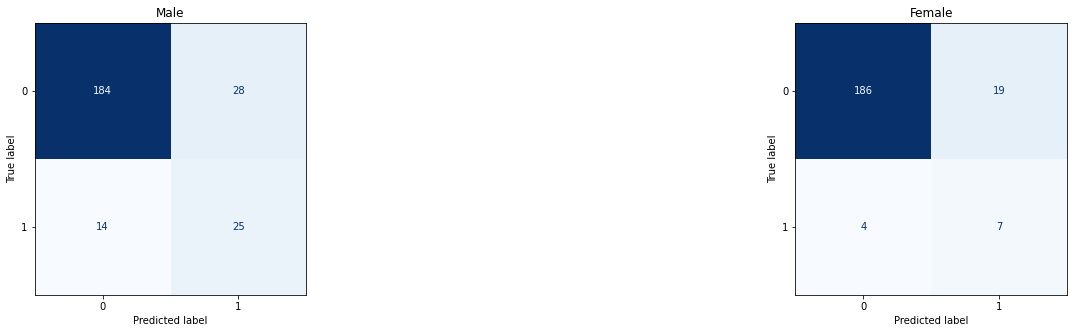

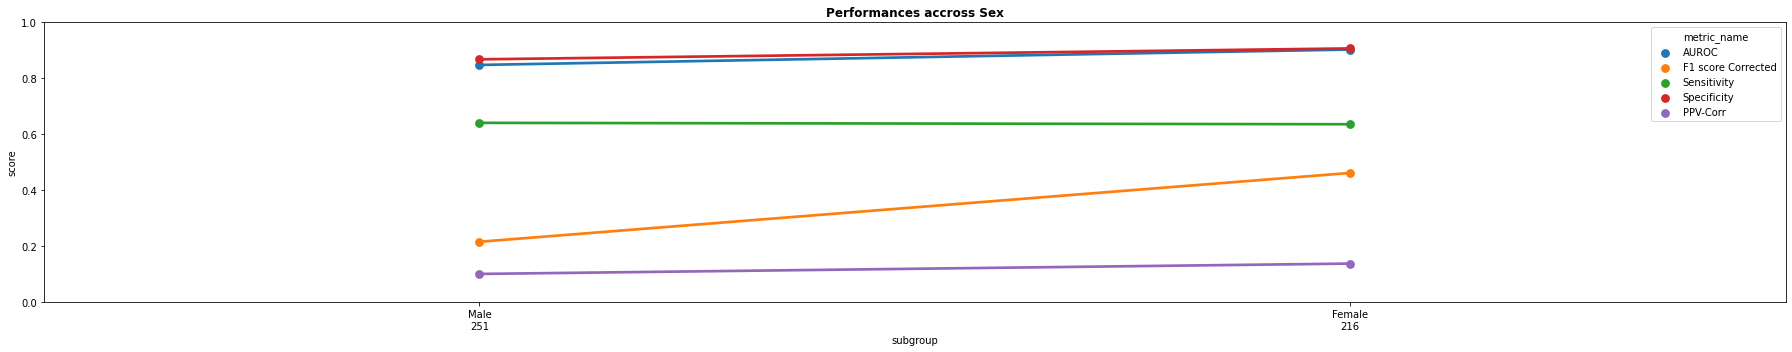

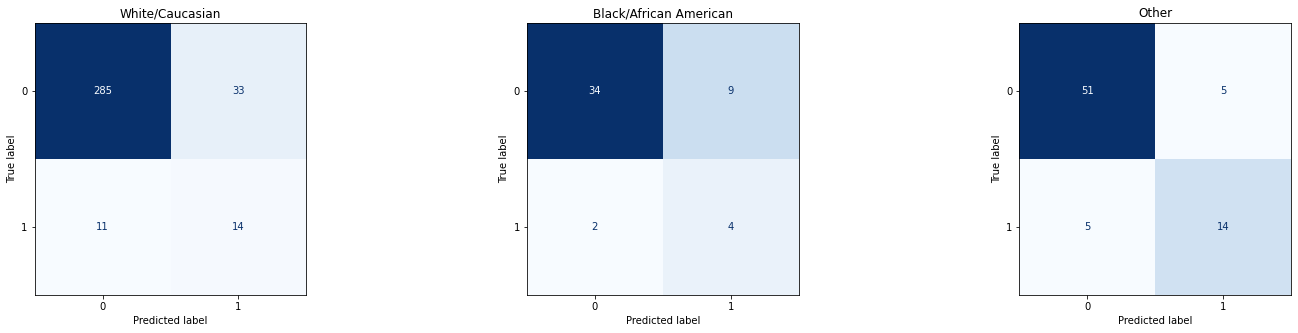

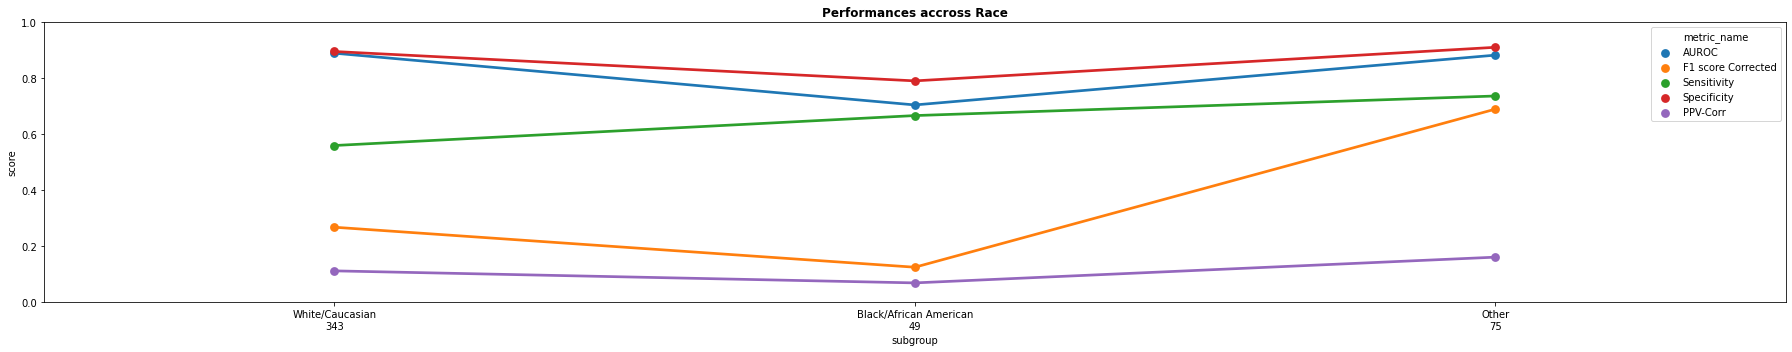

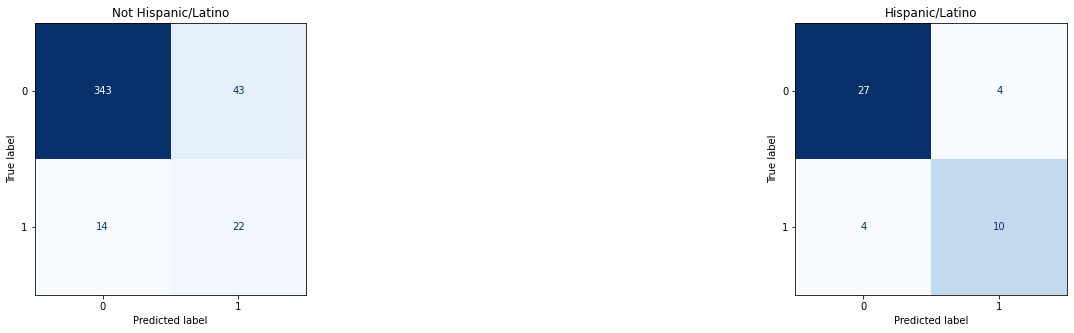

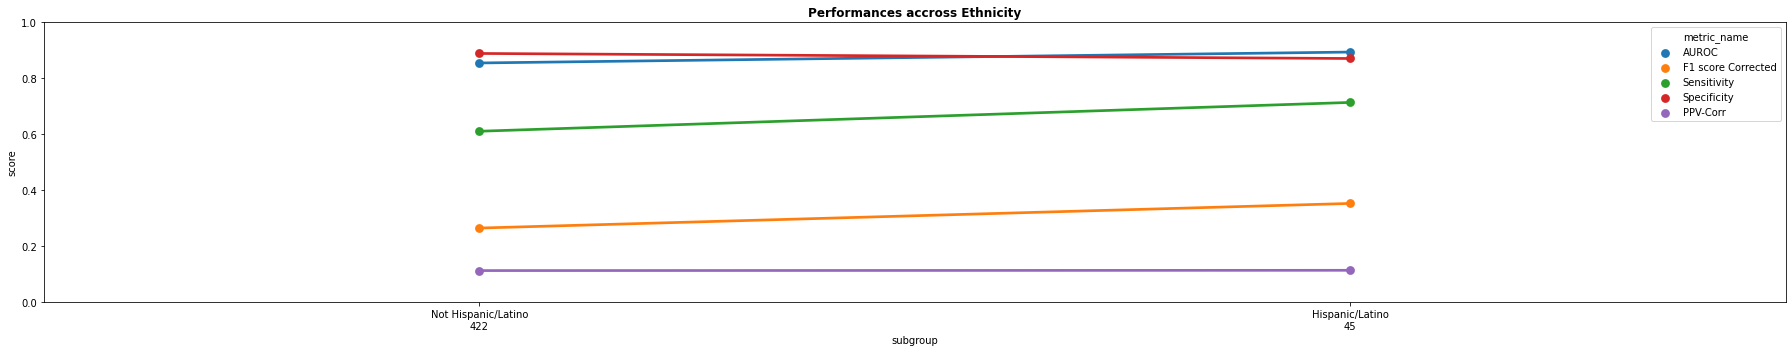

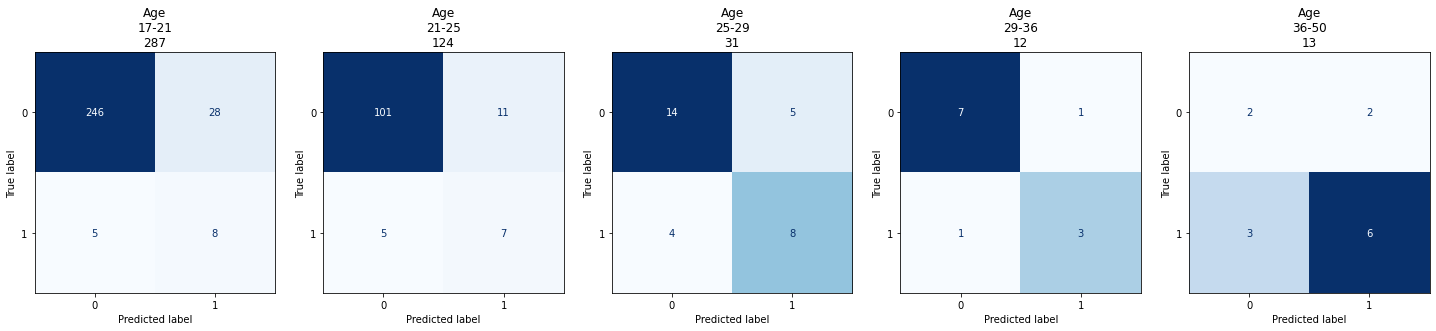

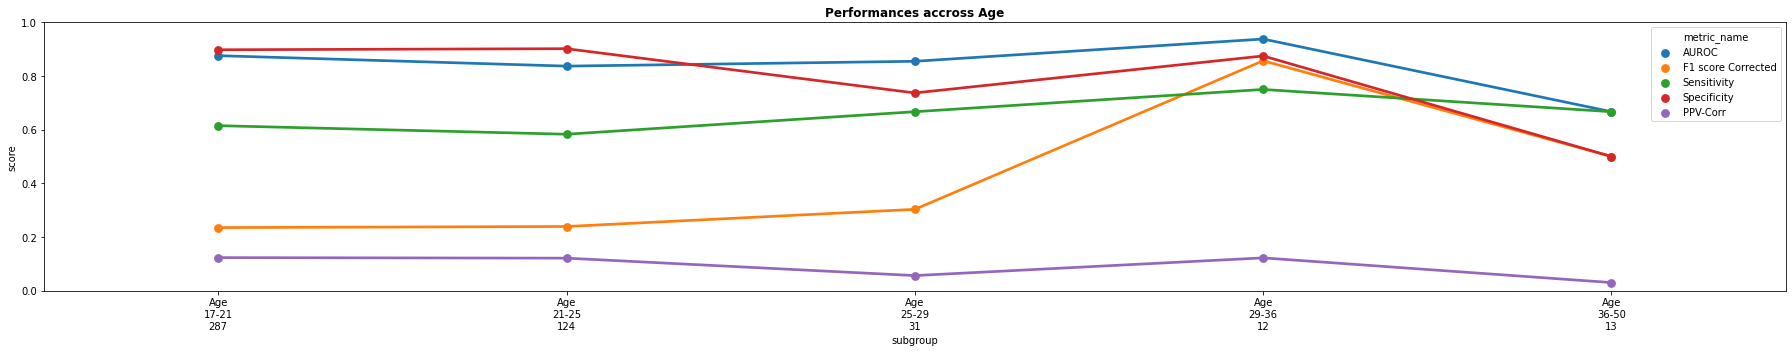

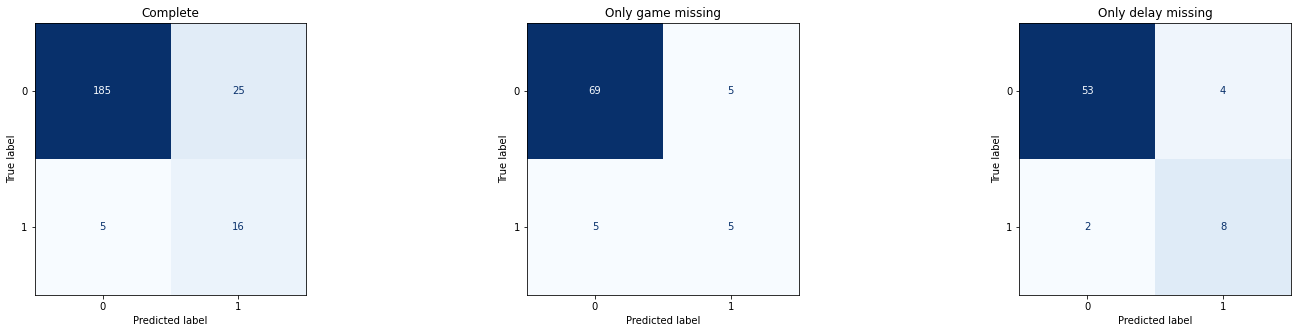

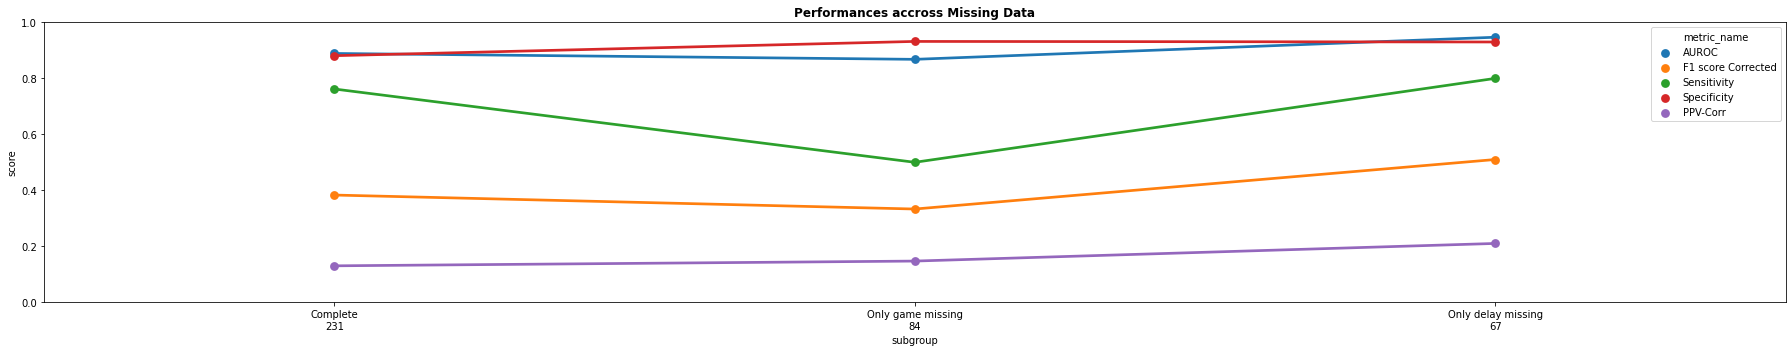

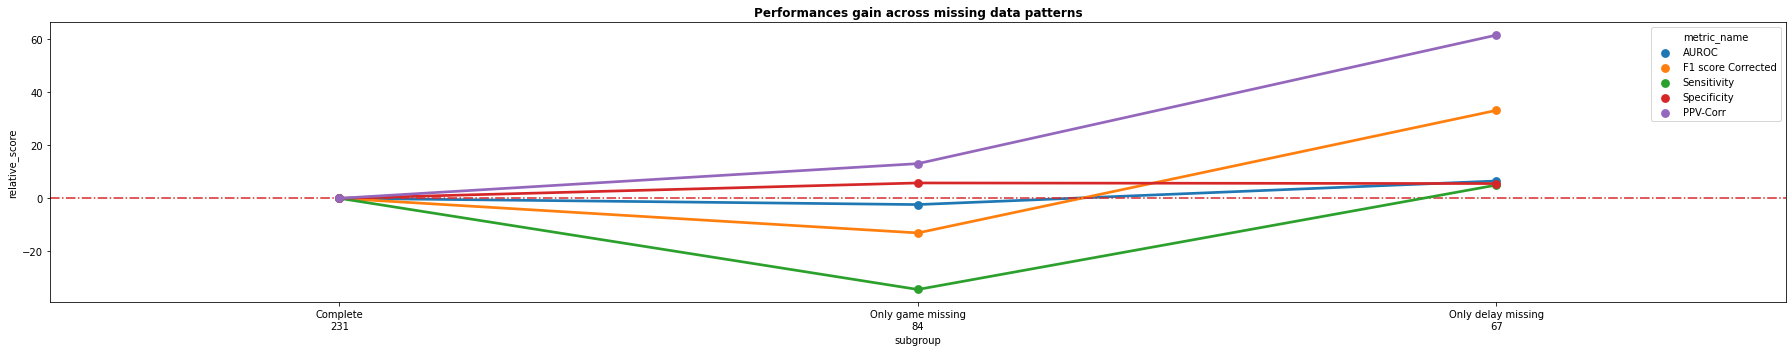

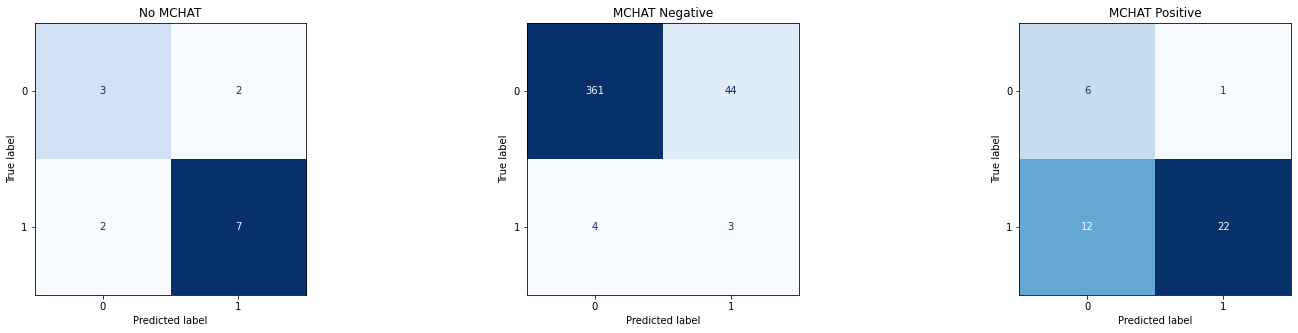

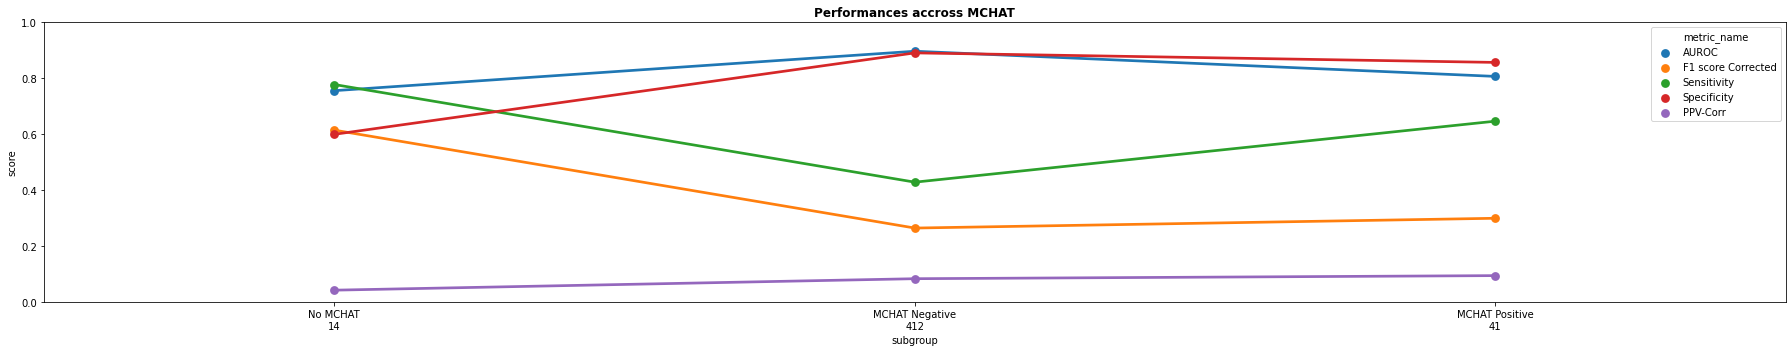

In [73]:
for comparisons_name, comparisons in zip(['Sex', 'Race', 'Ethnicity', 'Age', 'Missing Data', 'MCHAT'],
                                         [['Male', 'Female'],['White/Caucasian','Black/African American', 'Other'],
                                         ['Not Hispanic/Latino','Hispanic/Latino'], 
                                          ['Age\n21-25', 'Age\n29-36', 'Age\n25-29','Age\n36-50', 'Age\n17-21'],
                                         ['Complete', 'Only game missing','Only delay missing'],
                                         ['No MCHAT','MCHAT Negative', 'MCHAT Positive']] ):
    
    d = results_vertical[results_vertical['subgroup_name'].isin(comparisons)]
    
    
    if comparisons_name!= 'Age':
        fig, axes = plt.subplots(1, len(comparisons), figsize=(25, 5))
        for i, comp in enumerate(comparisons):
            row = d[d['subgroup_name'] == comp].iloc[0]


            cm = np.array([[row['TN'], row['FP']], [row['FN'], row['TP']]]).astype(int)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            disp.plot(cmap='Blues', ax=axes[i]);disp.im_.colorbar.remove()  
            axes[i].set_title("{}".format(comp))
    else:
        
        fig, axes = plt.subplots(1, len(comparisons), figsize=(25, 5))
        for i, comp in enumerate(['Age\n17-21\n287', 'Age\n21-25\n124', 'Age\n25-29\n31', 'Age\n29-36\n12', 'Age\n36-50\n13']):
            row = d[d['subgroup'] == comp].iloc[0]


            cm = np.array([[row['TN'], row['FP']], [row['FN'], row['TP']]]).astype(int)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            disp.plot(cmap='Blues', ax=axes[i]);disp.im_.colorbar.remove()  
            axes[i].set_title("{}".format(comp))


    
    
    
    if comparisons_name == 'Age':
        order = ['Age\n17-21\n287', 'Age\n21-25\n124', 'Age\n25-29\n31', 'Age\n29-36\n12', 'Age\n36-50\n13']
    else:
        order=None


    fig = plt.figure(figsize=(25, 5));ax = plt.gca()
    ax = sns.pointplot(data=d, x="subgroup", order=order, y="score", hue='metric_name', ci='sd', ax = ax)
    ax.set_ylim([0,1])
    ax.set_title("Performances accross {}".format(comparisons_name), weight='bold')
    plt.tight_layout()

    if comparisons_name == 'Missing Data':
        
        d['relative_score'] = np.nan
        for idx, row in d.iterrows():
            baseline_score = d.loc[(d['subgroup_name']=='Complete') &(d['metric_name']==row['metric_name']), 'score'].item()
            d.loc[idx, 'relative_score'] = (row['score']-baseline_score)/baseline_score*100


    

        fig = plt.figure(figsize=(25, 5));ax = plt.gca()
        ax = sns.pointplot(data=d, x="subgroup",  order=order, y="relative_score", hue='metric_name', ci='sd', ax = ax)
        #ax.set_ylim([0,1])
        ax.set_title("Performances gain across missing data patterns", weight='bold')
        ax.axhline([0], color='tab:red', linestyle='-.')
        plt.tight_layout()



# Analysis of individual cases

In [299]:
def plot_summary_sample(exp, index_sample, name):
    
    
    row = exp.dataset.df.iloc[index_sample]
    print_participant_summary(row)
    
    sample_row = exp.predictions_df.iloc[index_sample]
    shap_value_individual = exp.shap_values[index_sample]
    expected_value_individual =  exp.models_expected_value[index_sample]
    
    shap.force_plot(expected_value_individual, shap_value_individual, feature_names=exp.features_name, matplotlib=True)
    shap.decision_plot(expected_value_individual, shap_value_individual, exp.features_name, title="Shap Values for a {} predictions".format(name))
    
    
    n_plots = len(DEFAULT_PREDICTORS)
    fig, axes = plt.subplots(n_plots//3, 3, figsize=(25, 12));axes = axes.flatten()

    n_Z = len(exp.dataset.use_missing_indicator_variables.keys())
    shaps = (np.abs(shap_value_individual[:-n_Z])/np.sum(np.abs(shap_value_individual[:-n_Z]))*100)

    for i,  idx in enumerate(reversed(np.argsort(shaps))):

        feature_name = DEFAULT_PREDICTORS[idx]

        #_, bins, _ = axes[i].hist(exp.dataset._X_train[exp.dataset.y_train==0, i], density=True,  bins=50, color='tab:blue', label='NT', alpha=.7)
        #axes[i].hist(exp.dataset._X_train[exp.dataset.y_train==1, i], density=True, bins=bins, color='tab:orange', label='Autistic', alpha=.7)
        sns.kdeplot(data=exp.dataset.df, x=feature_name, hue="diagnosis", multiple="layer", common_norm=False, alpha=.7, ax=axes[i], bw=.25)
        axes[i].set_title("{}\nRelative importance: {:.1f}%".format(feature_name, shaps[idx]), weight='bold')
        axes[i].scatter(x=sample_row[feature_name], y=0, color='red', s=300)


    plt.tight_layout();plt.show()
    return 


def print_participant_summary(row):
    Texte = "Profile of participant: {}\n".format(row['id'])
    Texte += "Sex: {}\n".format(row['sex'])
    Texte += "Age: {}\n".format(row['age'])
    Texte += "Diagnosis: {}\n".format(row['diagnosis'])
    if not np.isnan(row['ados_total']):
        Texte += "ADOS Scores\n"
        Texte += "\tTotal Score: {}\n".format(row['ados_total'])
        Texte += "\tRRB: {}\n".format(row['ados_rrb'])
        Texte += "\tSA: {}\n".format(row['ados_sa'])


    if not np.isnan(row['mullen_el']):
        Texte += "Mullen Scale of Early Learning\n"
        Texte += "\tExpressive Language: {}\n".format(row['mullen_el'])
        Texte += "\tFine Motor: {}\n".format(row['mullen_fm'])
        Texte += "\tReceptive Language: {}\n".format(row['mullen_rl'])
        Texte += "\tVisual Reception: {}\n".format(row['mullen_vr'])
        Texte += "\tELC: {}\n".format(row['mullen_el'])

    if not np.isnan(row['srs_total_tscore']):
        Texte += "SRS\n"
        Texte += "\tsrs_total_tscore: {}\n".format(row['srs_total_tscore'])
        Texte += "\tsrs_social_awareness_tscore: {}\n".format(row['srs_social_awareness_tscore'])
        Texte += "\tsrs_social_motivation_tscore: {}\n".format(row['srs_social_motivation_tscore'])

    if not np.isnan(row['mchat_total']):
        Texte += "MCHAT\n"
        Texte += "\tFinal Score: {}\n".format(row['mchat_final'])
        Texte += "\tResult: {}\n".format("Positive" if row['mchat_result'] else "Negative")

    print(Texte)
    return

## True Positive examples

Profile of participant: 810843
Sex: 1.0
Age: 26.19672131147541
Diagnosis: 1.0
ADOS Scores
	Total Score: 10.0
	RRB: 10.0
	SA: 10.0
Mullen Scale of Early Learning
	Expressive Language: 20.0
	Fine Motor: 20.0
	Receptive Language: 20.0
	Visual Reception: 20.0
	ELC: 20.0
SRS
	srs_total_tscore: 73.0
	srs_social_awareness_tscore: 66.0
	srs_social_motivation_tscore: 68.0
MCHAT
	Final Score: 15.0
	Result: Positive



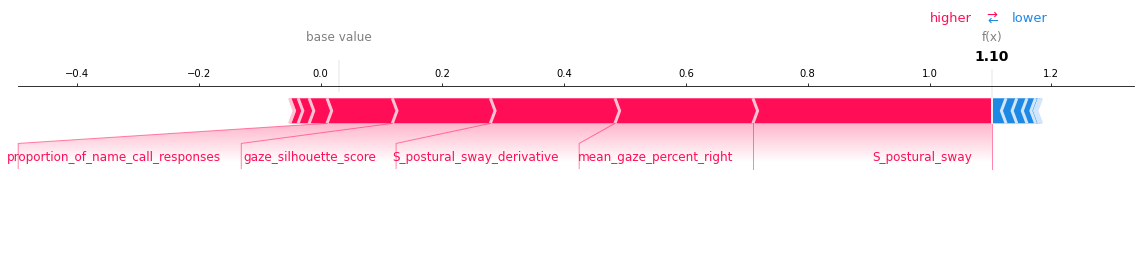

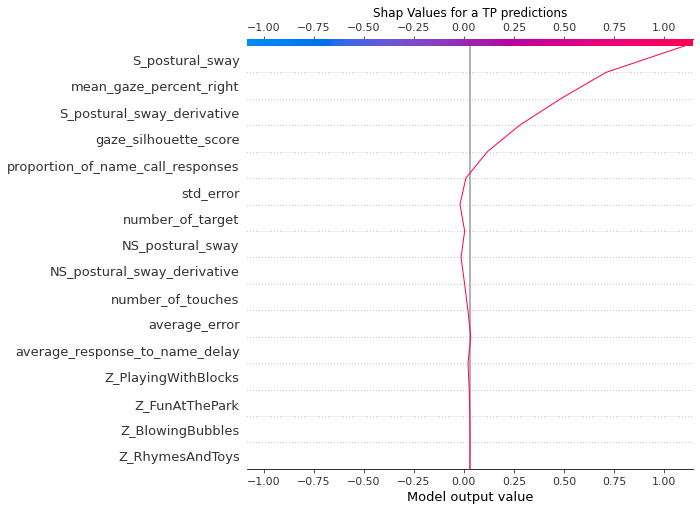

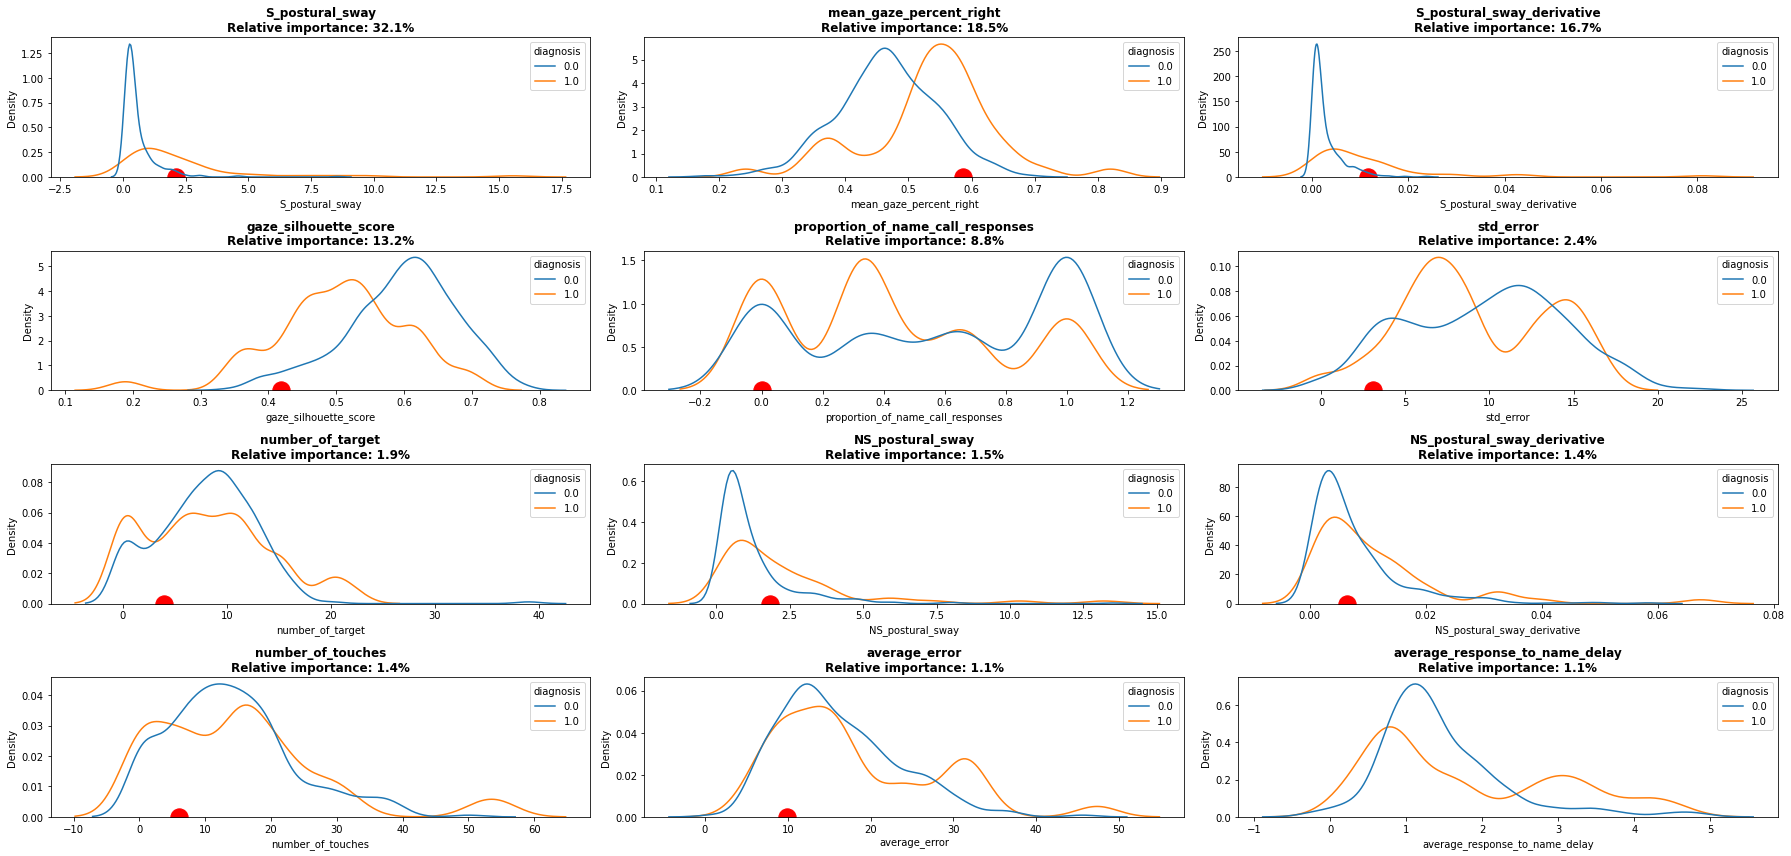

Profile of participant: 810366
Sex: 0.0
Age: 30.59016393442623
Diagnosis: 1.0
ADOS Scores
	Total Score: 9.0
	RRB: 7.0
	SA: 10.0
Mullen Scale of Early Learning
	Expressive Language: 20.0
	Fine Motor: 47.0
	Receptive Language: 20.0
	Visual Reception: 42.0
	ELC: 20.0
SRS
	srs_total_tscore: 40.0
	srs_social_awareness_tscore: 43.0
	srs_social_motivation_tscore: 45.0
MCHAT
	Final Score: 2.0
	Result: Positive



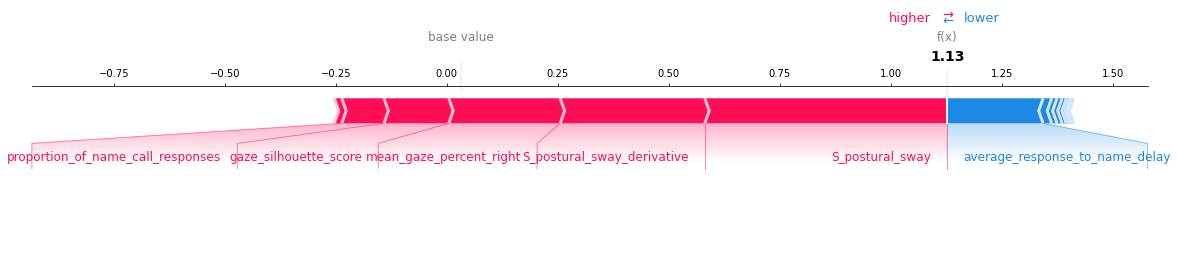

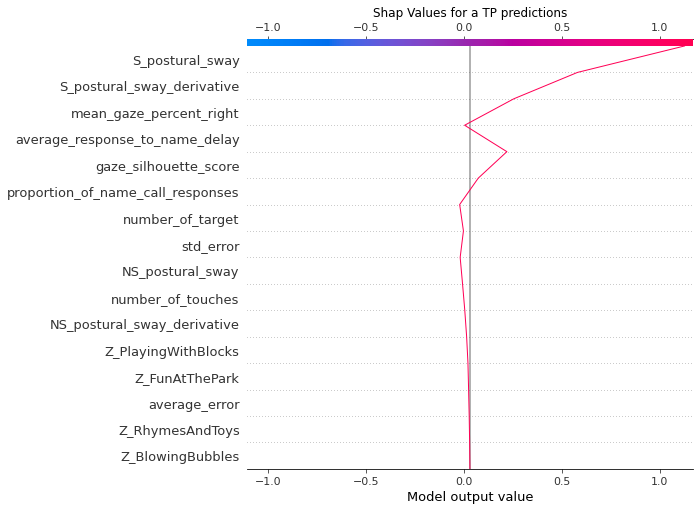

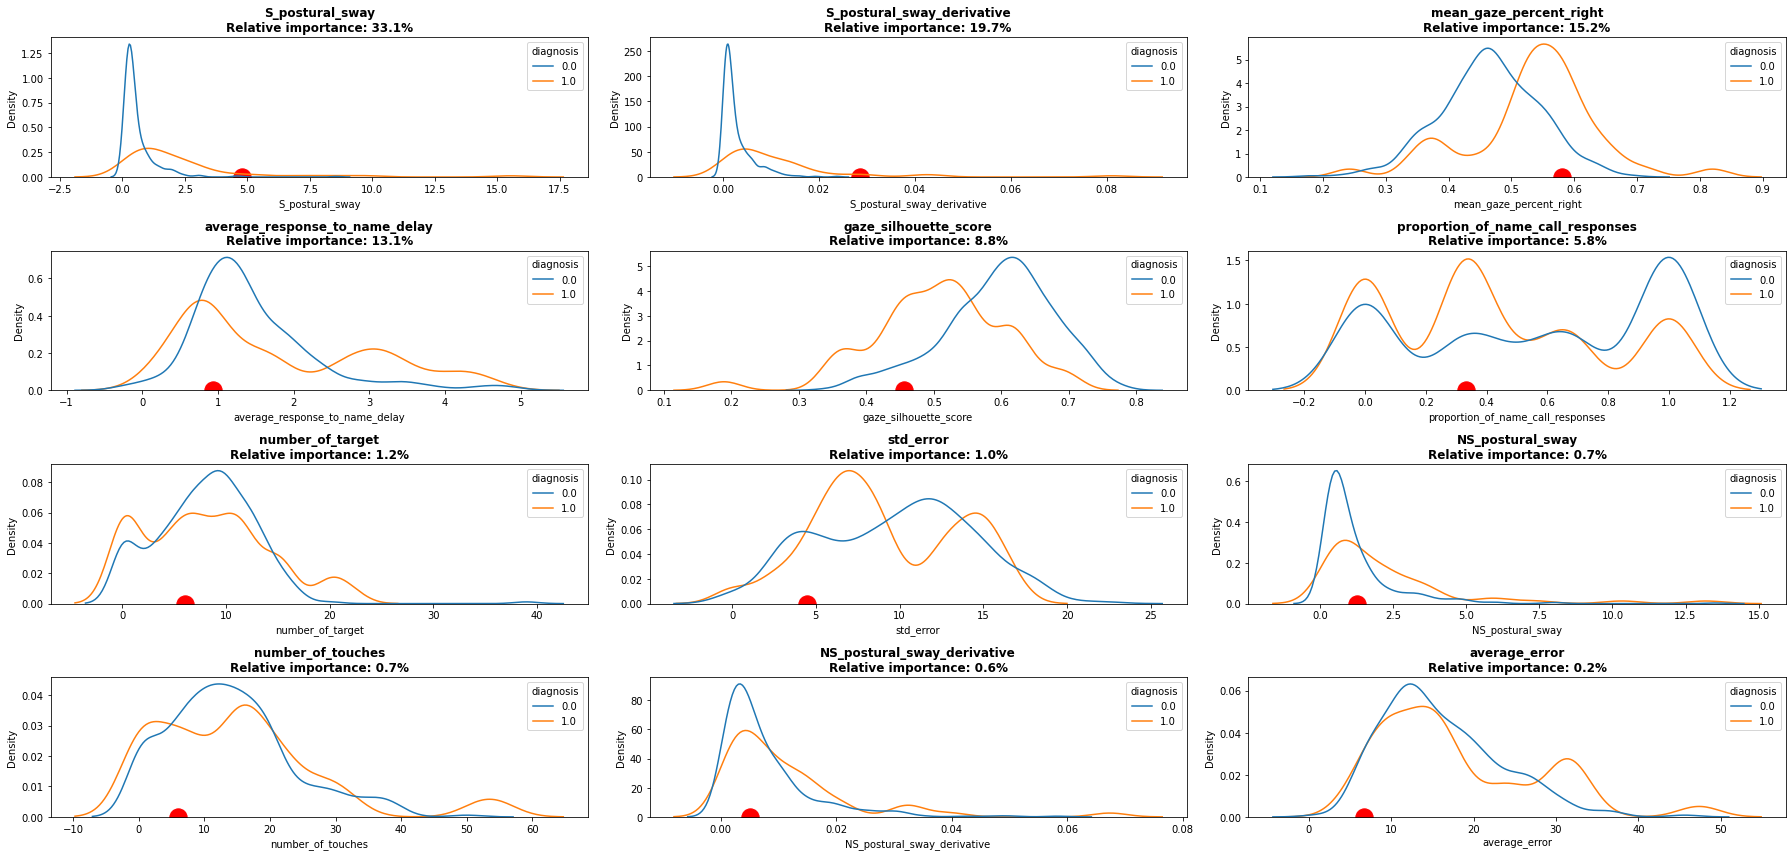

In [300]:
import shap
name = 'TP'
index_samples = exp.predictions_df[exp.predictions_df[name]==1].sort_values('y_pred').index[-2:]

for idx in index_samples:
    plot_summary_sample(exp, idx, name)

## True Negative examples

Profile of participant: 910135
Sex: 0.0
Age: 48.32786885245902
Diagnosis: 1.0
ADOS Scores
	Total Score: 7.0
	RRB: 9.0
	SA: 6.0
SRS
	srs_total_tscore: 84.0
	srs_social_awareness_tscore: 60.0
	srs_social_motivation_tscore: 72.0



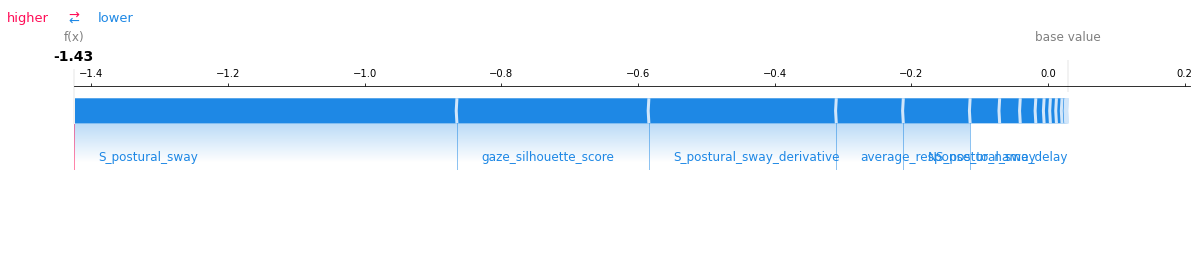

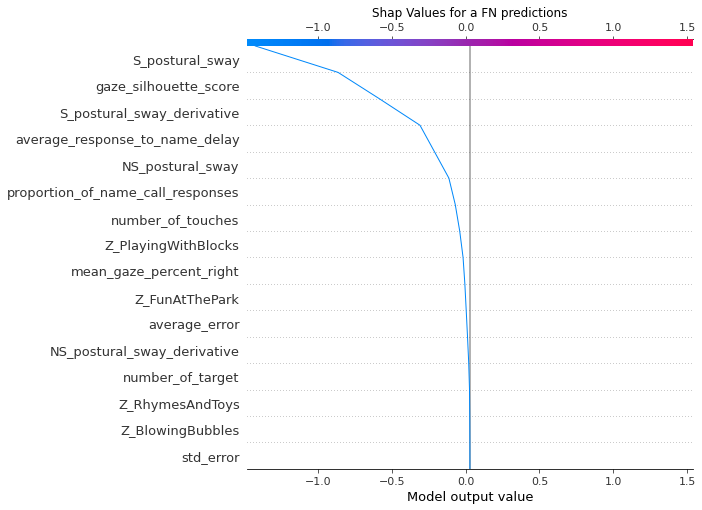

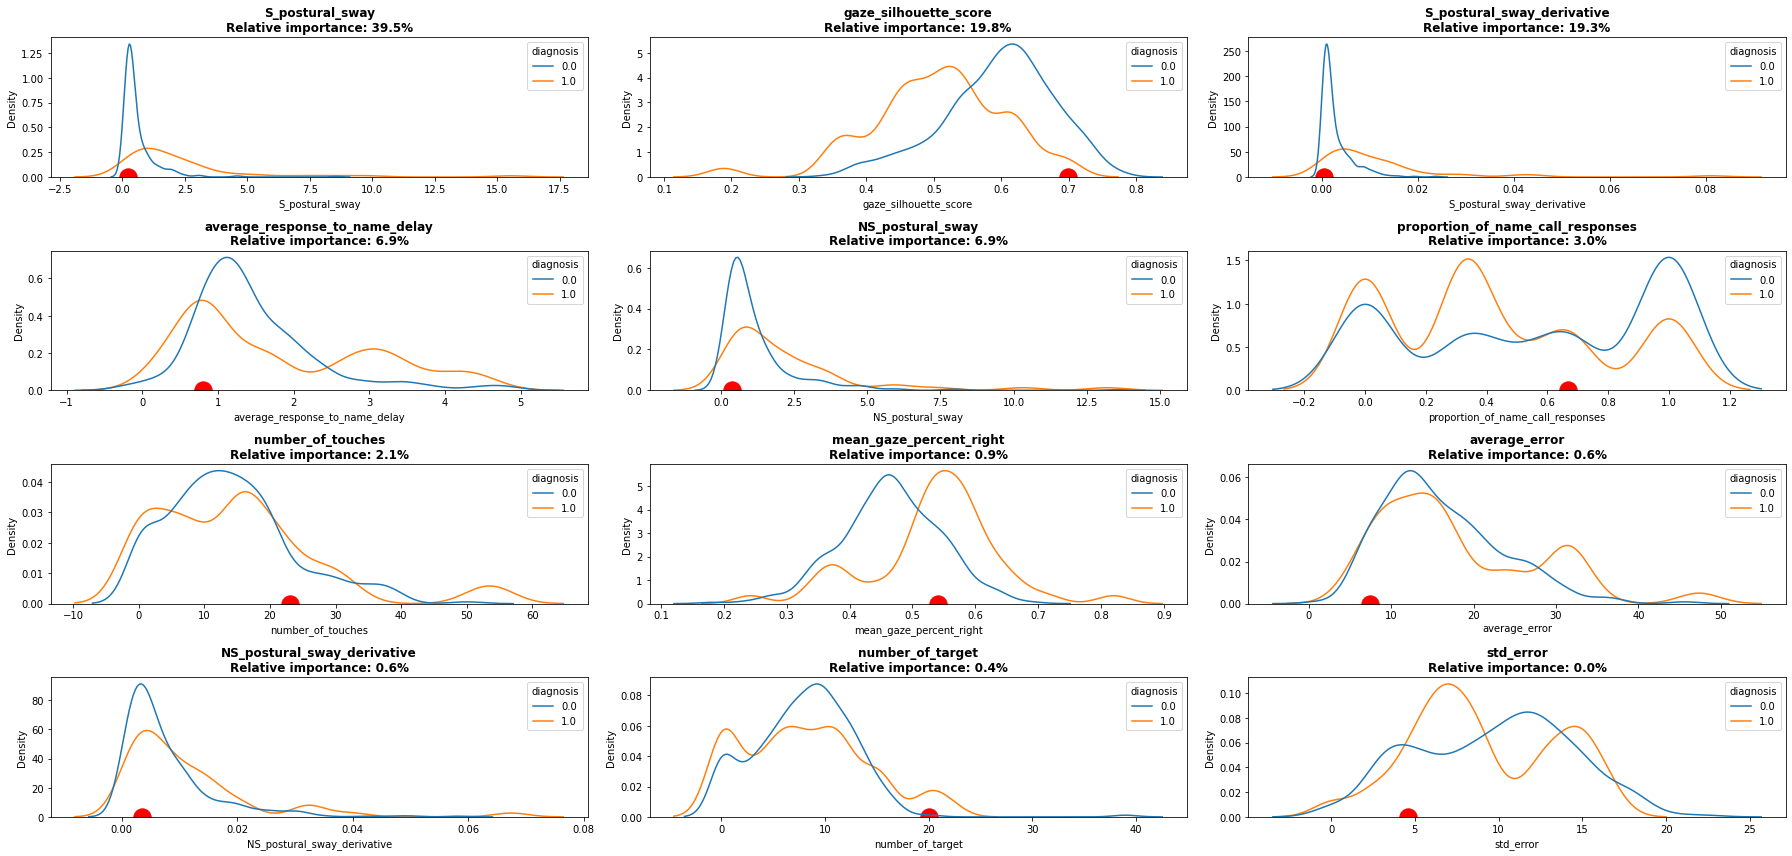

Profile of participant: 851176
Sex: 0.0
Age: 22.0327868852459
Diagnosis: 1.0
ADOS Scores
	Total Score: 7.0
	RRB: 9.0
	SA: 5.0
Mullen Scale of Early Learning
	Expressive Language: 50.0
	Fine Motor: 37.0
	Receptive Language: 35.0
	Visual Reception: 52.0
	ELC: 50.0
MCHAT
	Final Score: 3.0
	Result: Positive



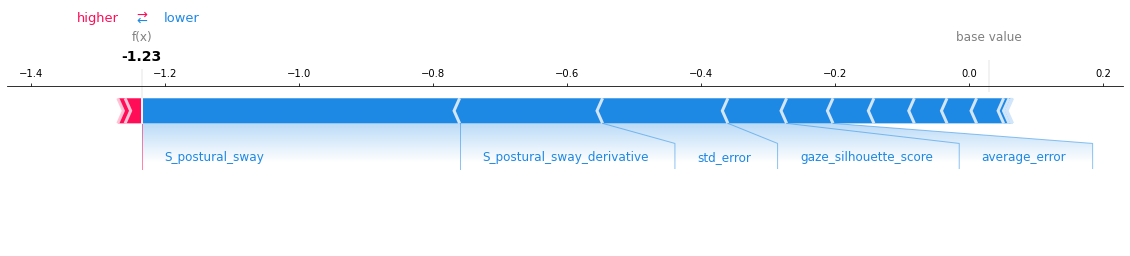

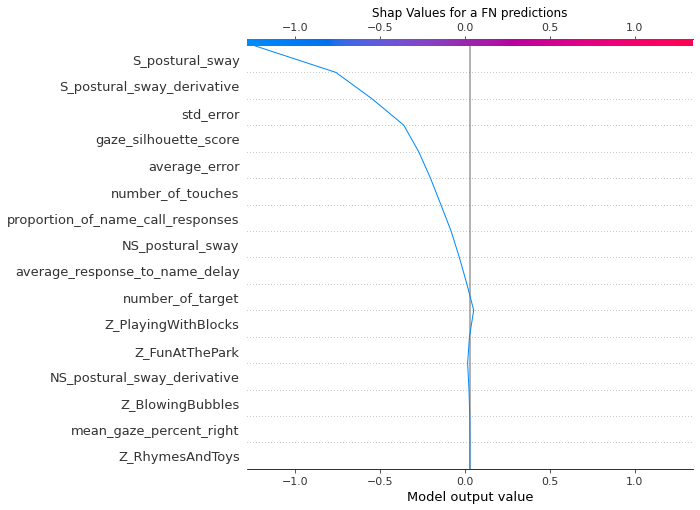

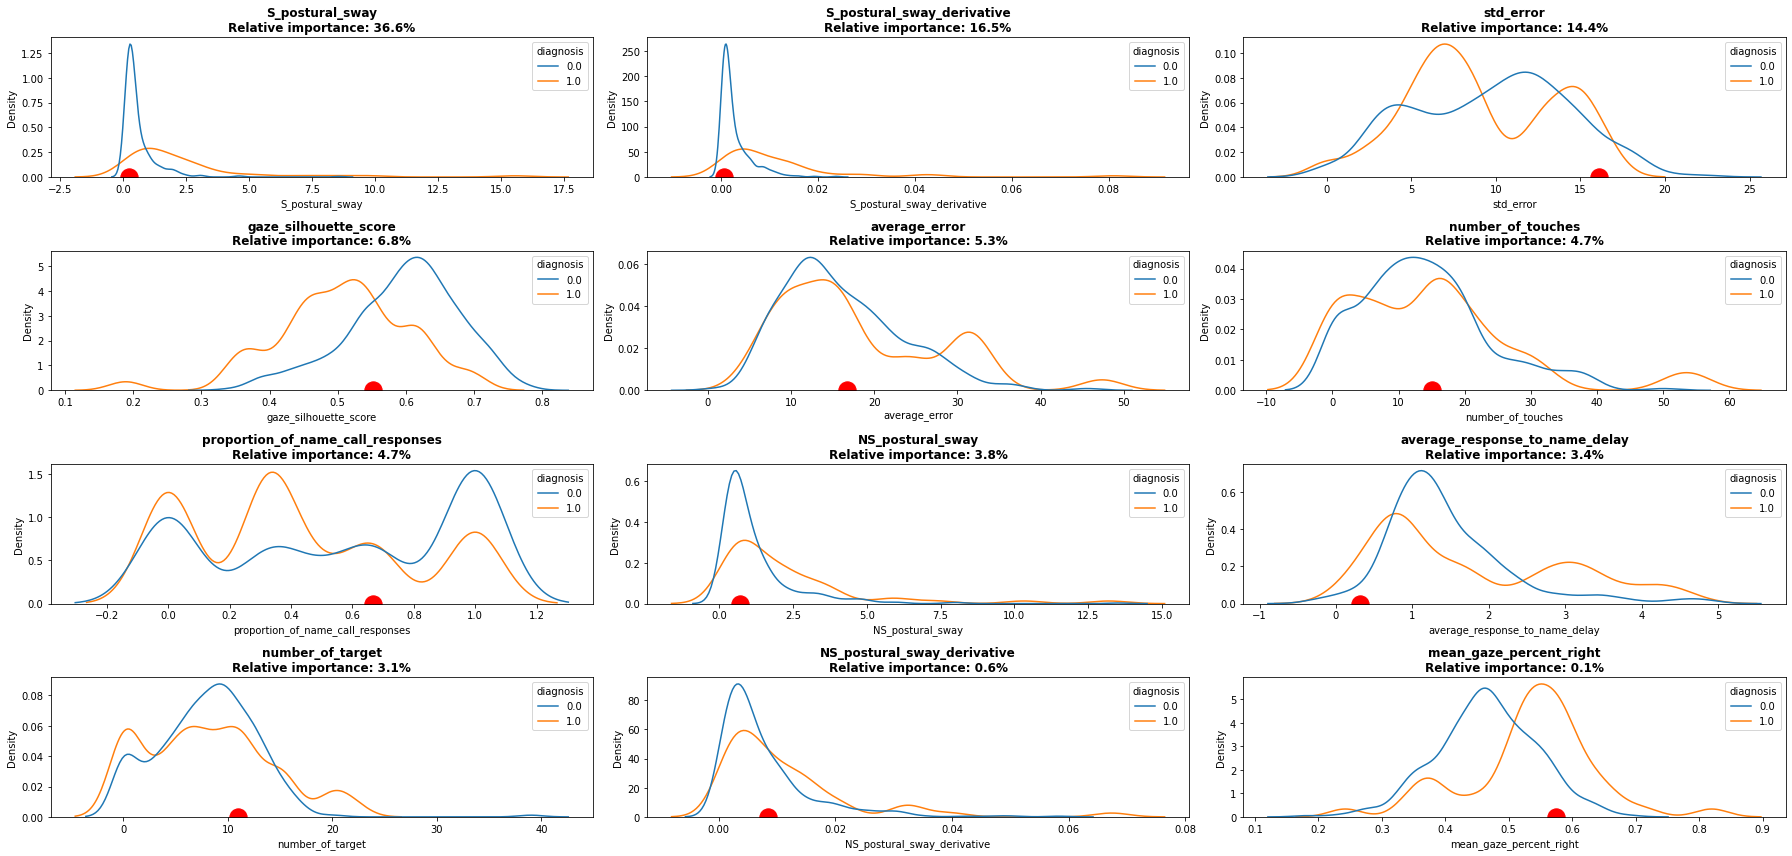

In [301]:
import shap
name = 'FN'
index_samples = exp.predictions_df[exp.predictions_df[name]==1].sort_values('y_pred').index[:2]
for idx in index_samples:
    plot_summary_sample(exp, idx, name)

## False Negative examples

Profile of participant: 910135
Sex: 0.0
Age: 48.32786885245902
Diagnosis: 1.0
ADOS Scores
	Total Score: 7.0
	RRB: 9.0
	SA: 6.0
SRS
	srs_total_tscore: 84.0
	srs_social_awareness_tscore: 60.0
	srs_social_motivation_tscore: 72.0



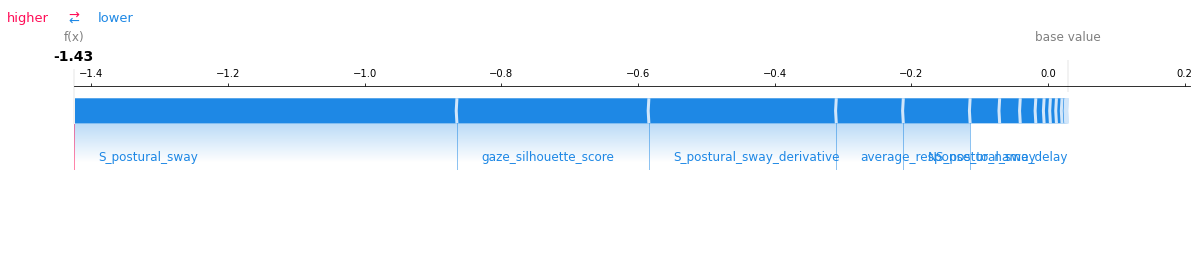

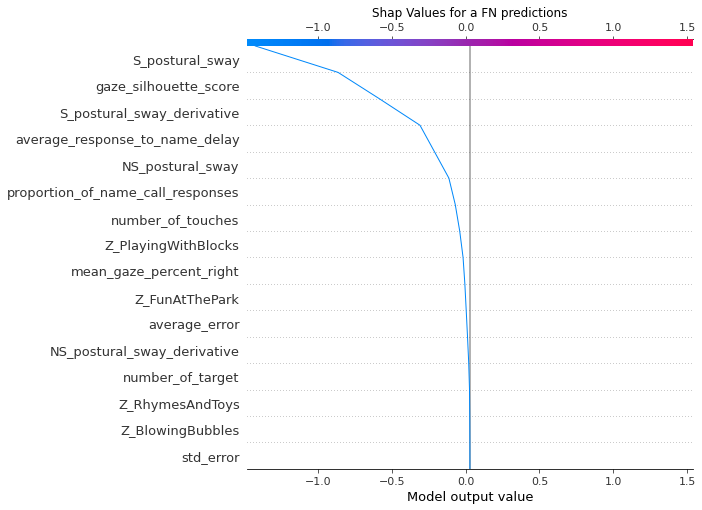

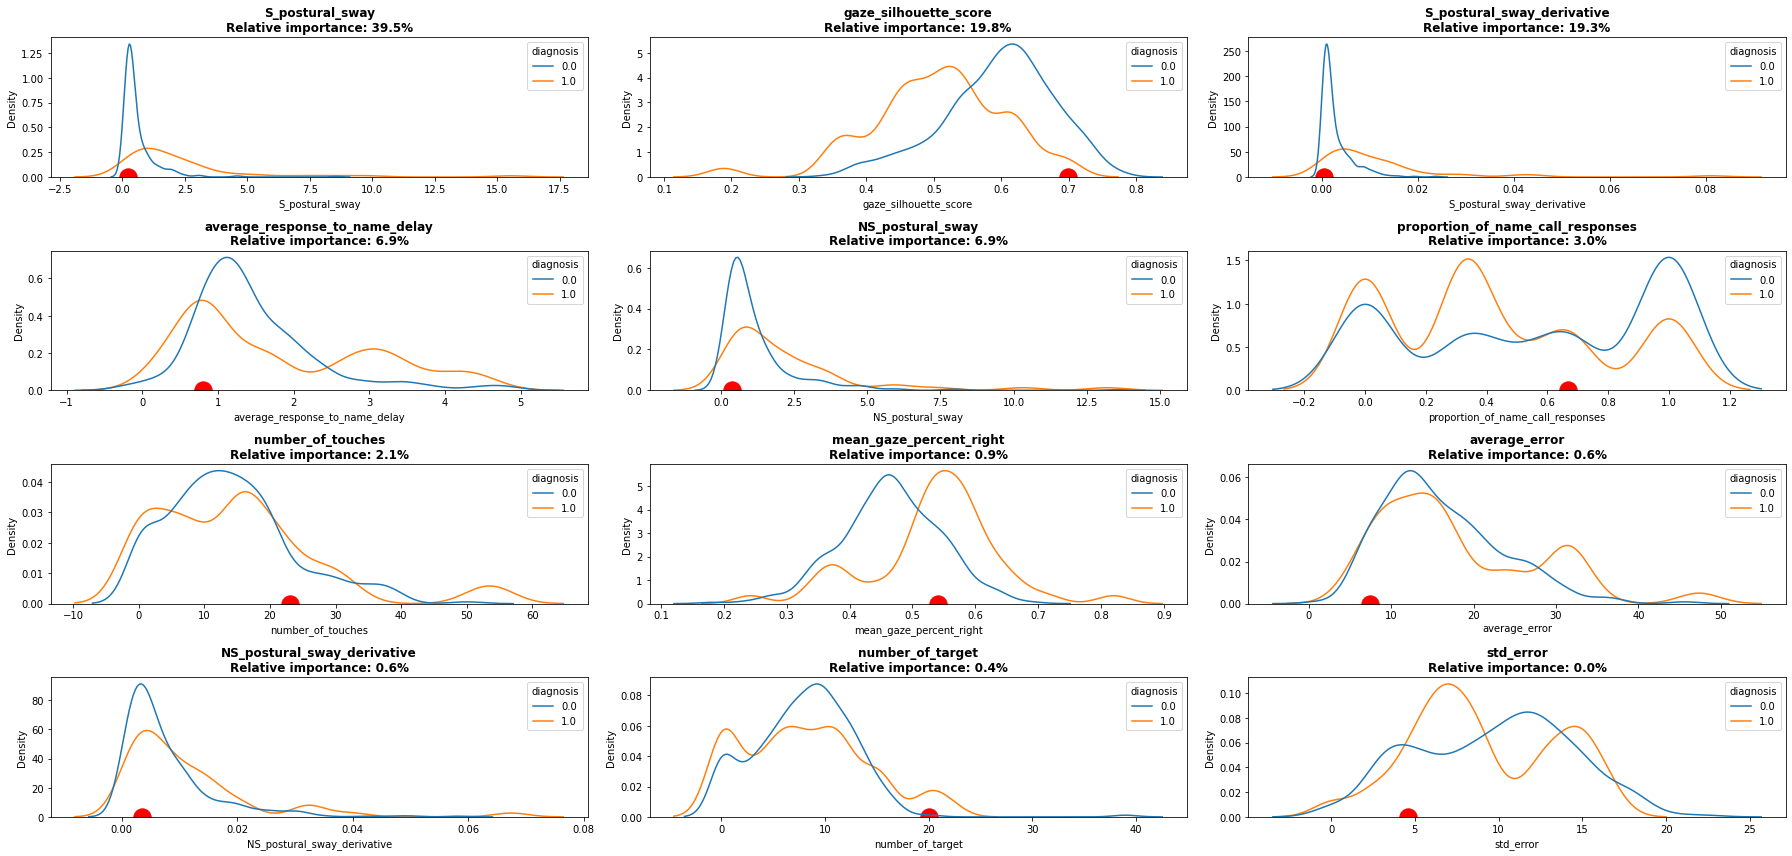

Profile of participant: 851176
Sex: 0.0
Age: 22.0327868852459
Diagnosis: 1.0
ADOS Scores
	Total Score: 7.0
	RRB: 9.0
	SA: 5.0
Mullen Scale of Early Learning
	Expressive Language: 50.0
	Fine Motor: 37.0
	Receptive Language: 35.0
	Visual Reception: 52.0
	ELC: 50.0
MCHAT
	Final Score: 3.0
	Result: Positive



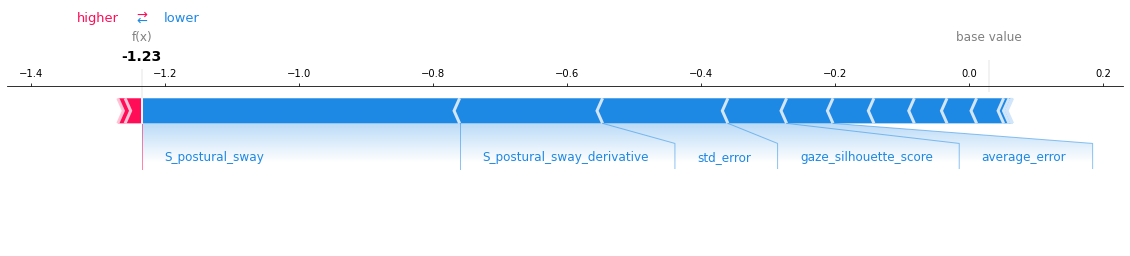

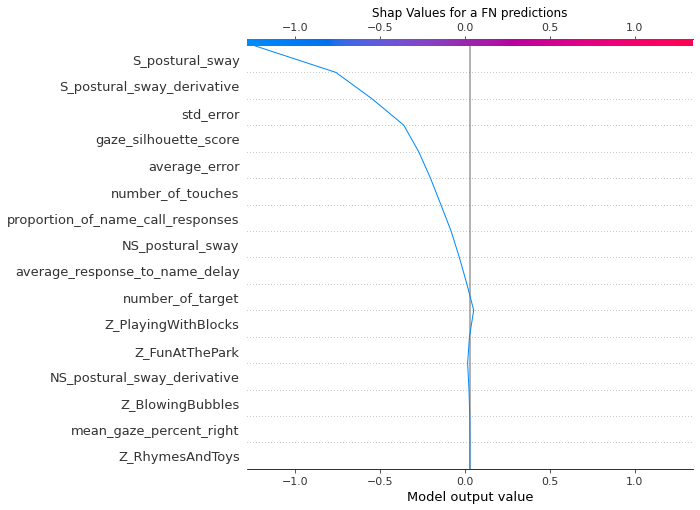

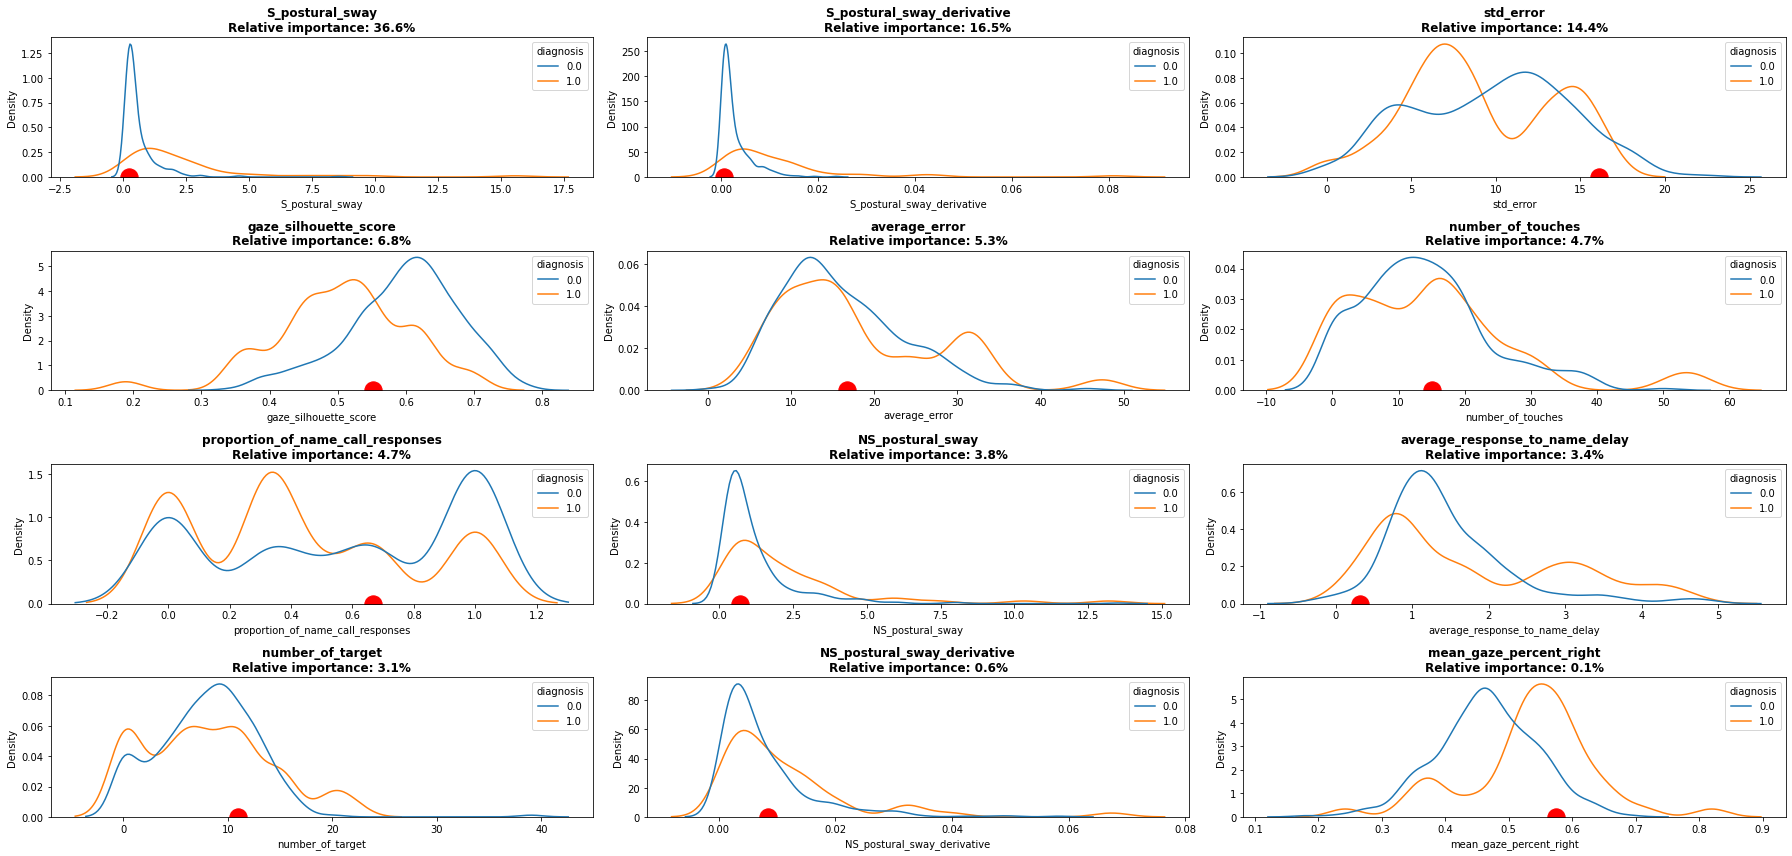

In [302]:
import shap
name = 'FN'
index_samples = exp.predictions_df[exp.predictions_df[name]==1].sort_values('y_pred').index[:2]
for idx in index_samples:
    plot_summary_sample(exp, idx, name)
    

## False Positive examples

Profile of participant: 810185
Sex: 0.0
Age: 24.0
Diagnosis: 0.0
SRS
	srs_total_tscore: 55.0
	srs_social_awareness_tscore: 68.0
	srs_social_motivation_tscore: 55.0
MCHAT
	Final Score: 0.0
	Result: Negative



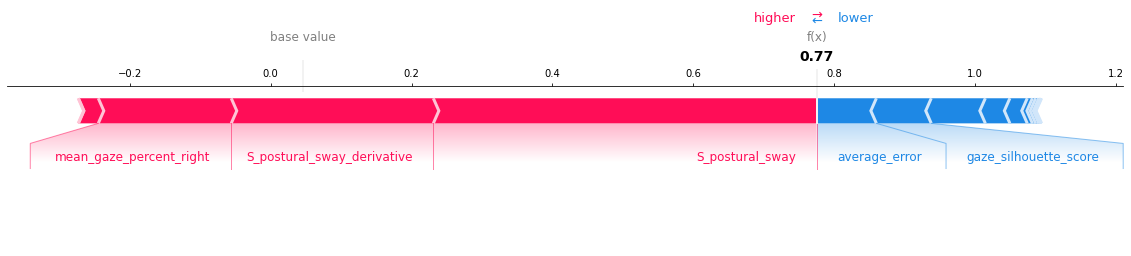

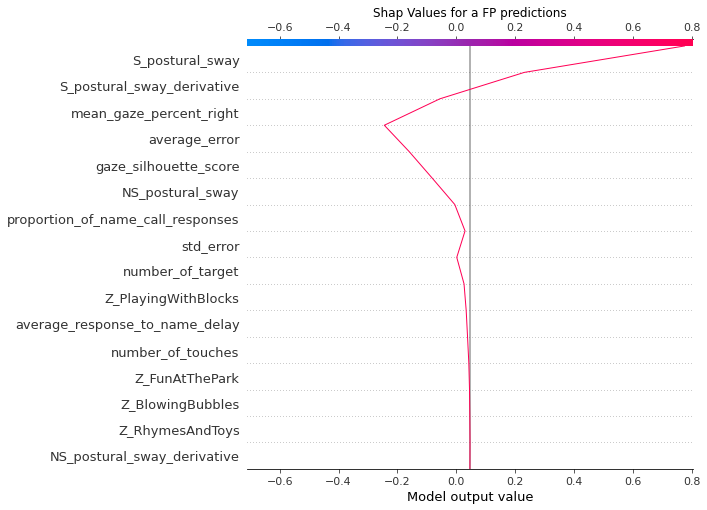

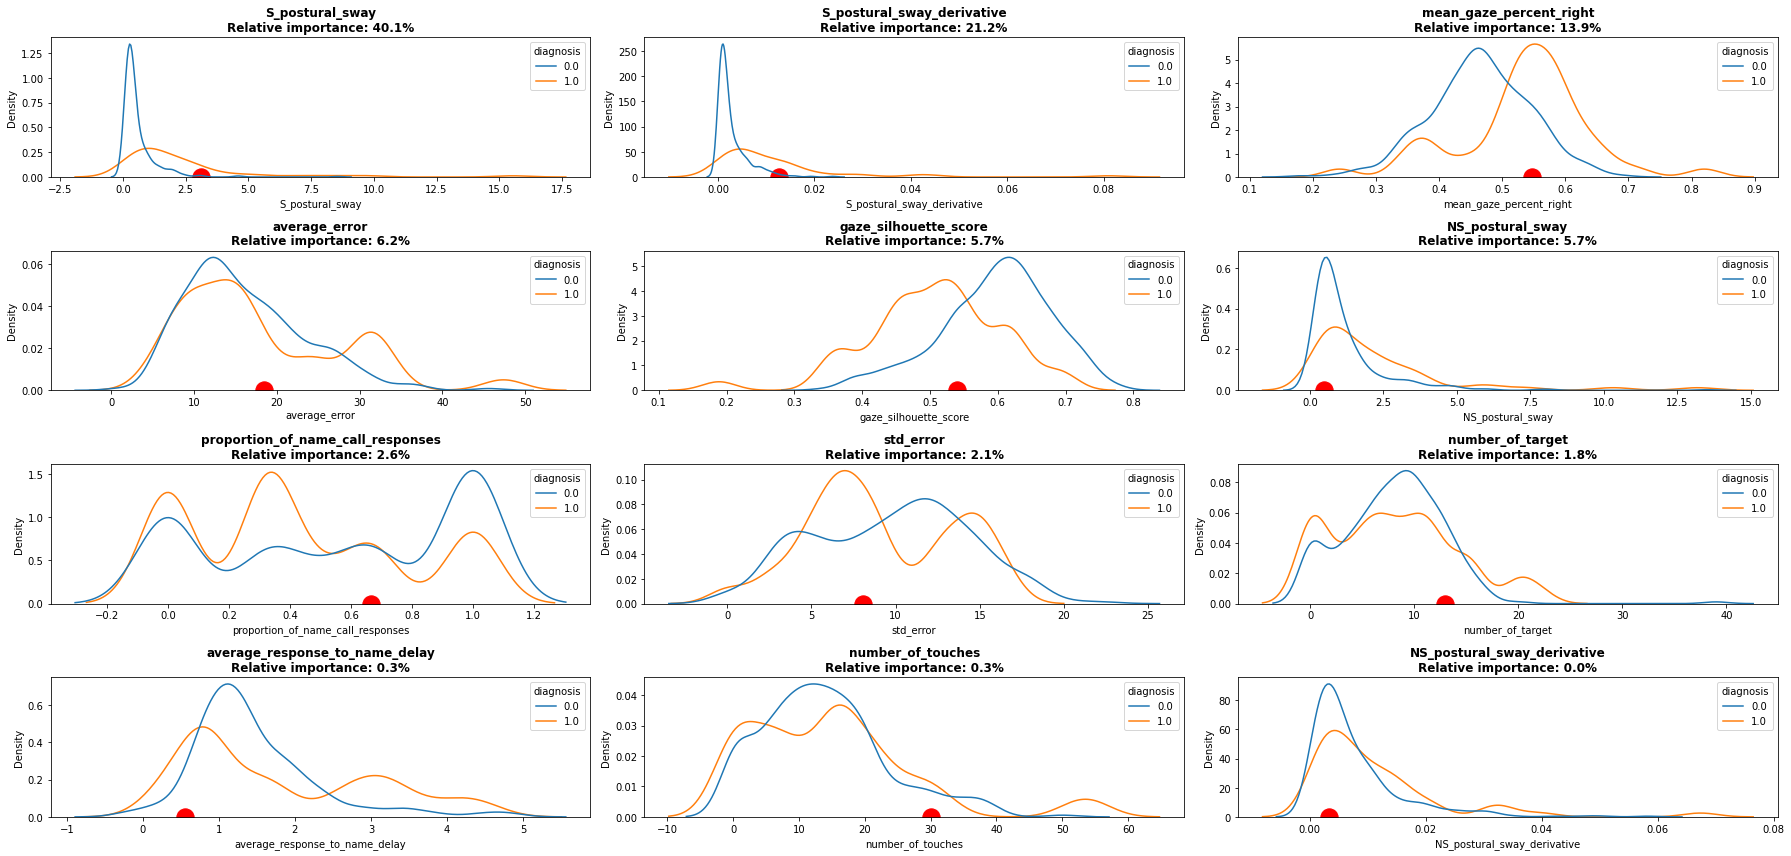

Profile of participant: 850931
Sex: 0.0
Age: 18.0
Diagnosis: 0.0
SRS
	srs_total_tscore: 35.0
	srs_social_awareness_tscore: 34.0
	srs_social_motivation_tscore: 37.0
MCHAT
	Final Score: 2.0
	Result: Negative



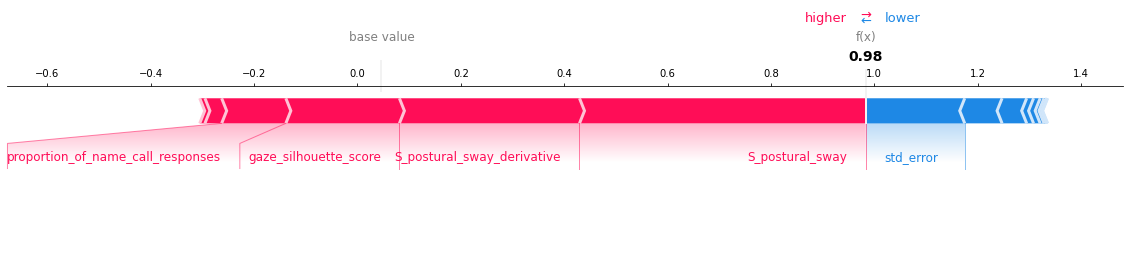

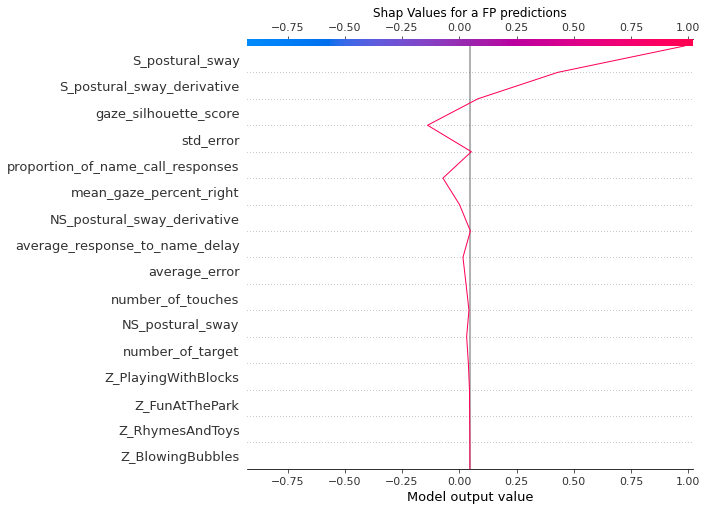

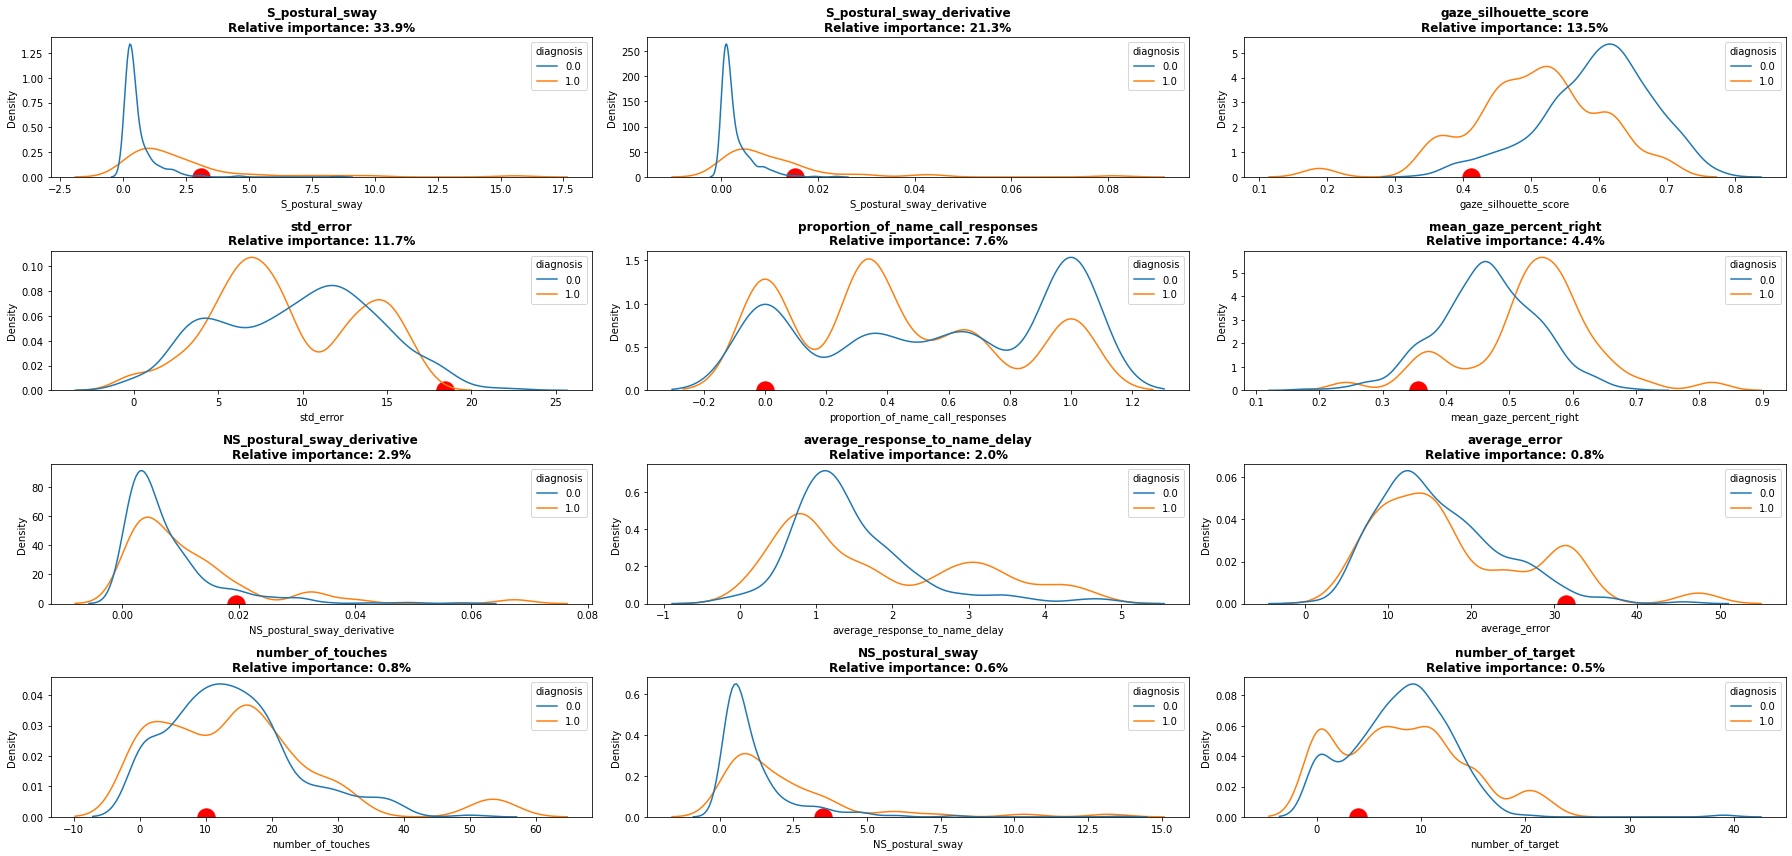

In [303]:
import shap
name = 'FP'
index_samples = exp.predictions_df[exp.predictions_df[name]==1].sort_values('y_pred').index[-2:]

for idx in index_samples:
    plot_summary_sample(exp, idx, name)

## SHAP Summary Plot¶


The SHAP values for XGBoost explain the margin output of the model, which is the change in log odds of being autistic for the trained XGBoost model. 

This summary plot replaces the typical bar chart of feature importance. It tells which features are most important, and also their range of effects over the dataset. The color allows us match how changes in the value of a feature effect the change in risk.

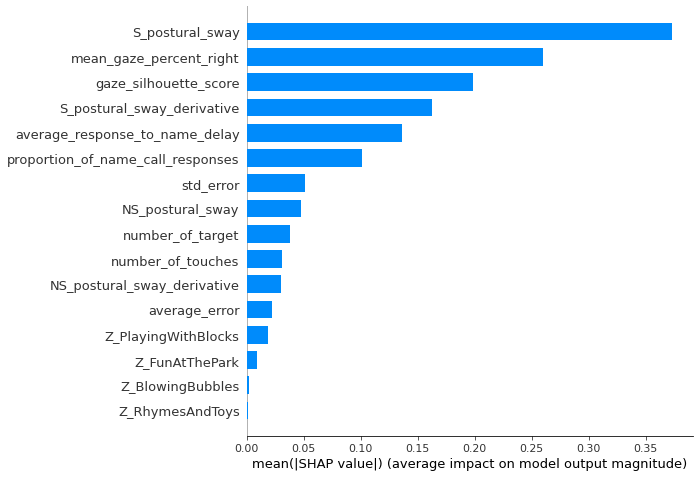

In [324]:
shap.summary_plot(exp.shap_values, exp.dataset.X_train, feature_names = exp.features_name, plot_type='bar')


In [308]:
import shap
explainer = shap.TreeExplainer(exp.model)
expected_value = explainer.expected_value
shap_values  = explainer.shap_values(exp.dataset.X_train)


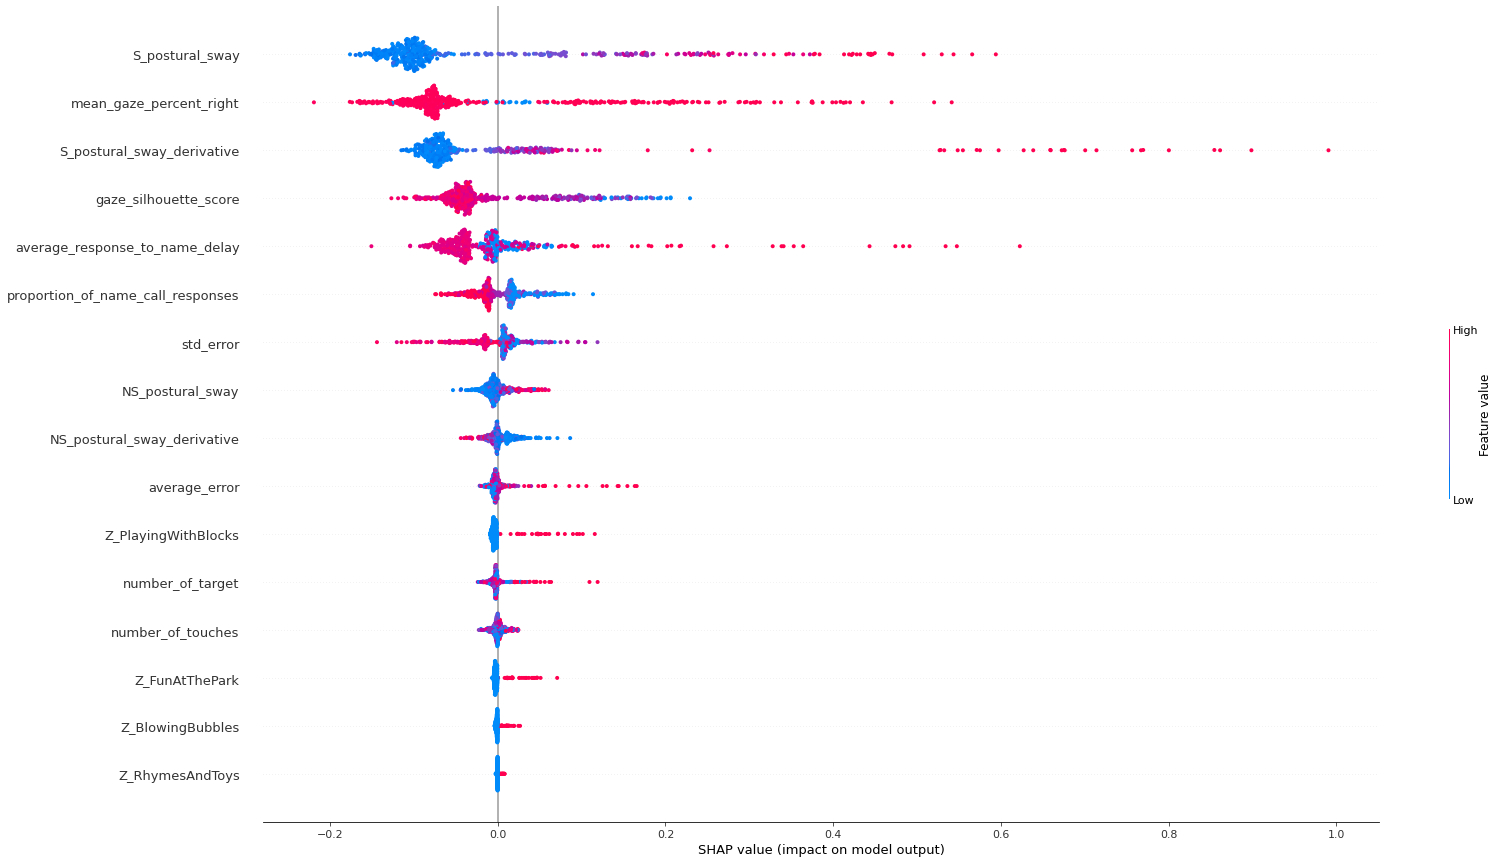

In [20]:
shap.summary_plot(exp.shap_values, exp.dataset.X_train, feature_names=exp.features_name, plot_size=(25, 15))

## SHAP Dependence Plots


While a SHAP summary plot gives a general overview of each feature a SHAP dependence plot show how the model output varies by feauture value. Note that every dot is a participant, and the vertical dispersion at a single feature value results from interaction effects in the model. The feature used for coloring is automatically chosen to highlight what might be driving these interactions. Later we will see how to check that the interaction is really in the model with SHAP interaction values. Note that the row of a SHAP summary plot results from projecting the points of a SHAP dependence plot onto the y-axis, then recoloring by the feature itself.


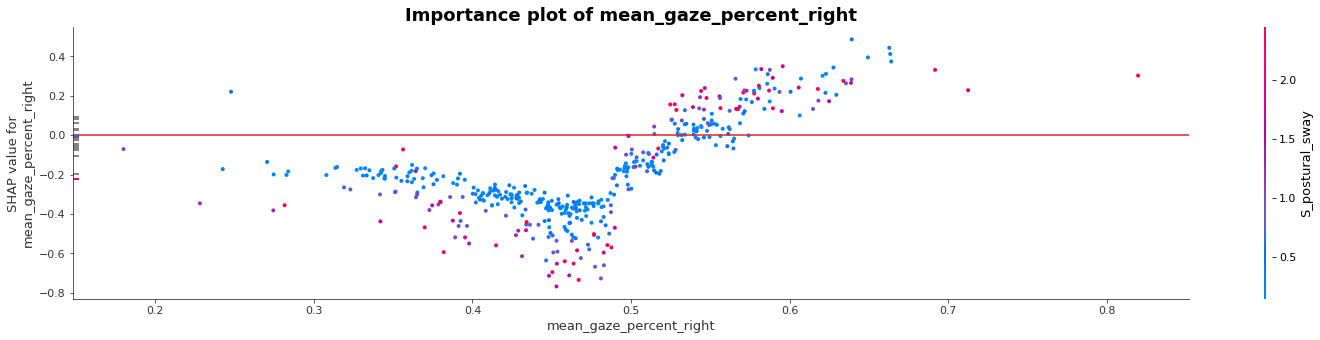

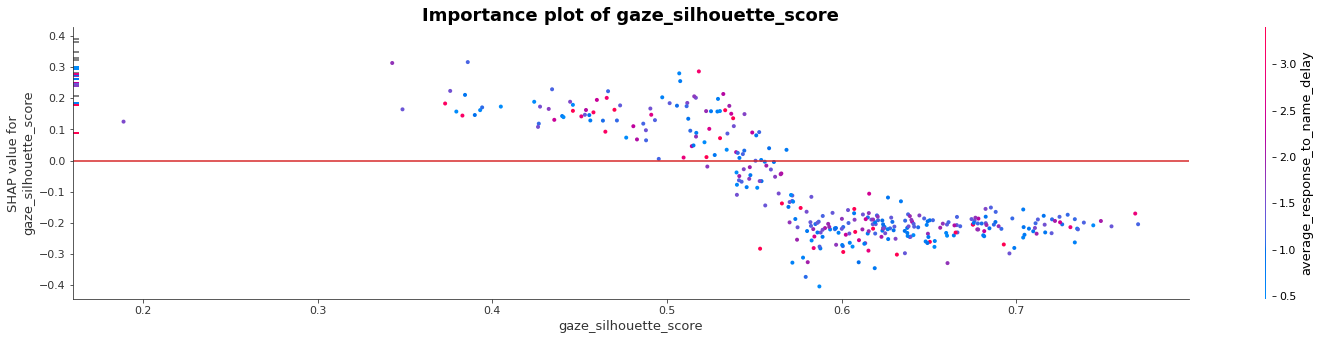

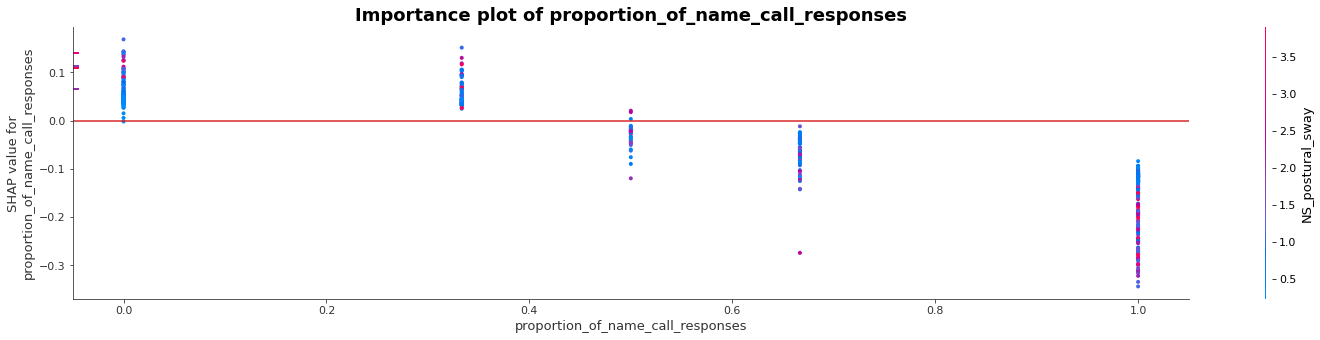

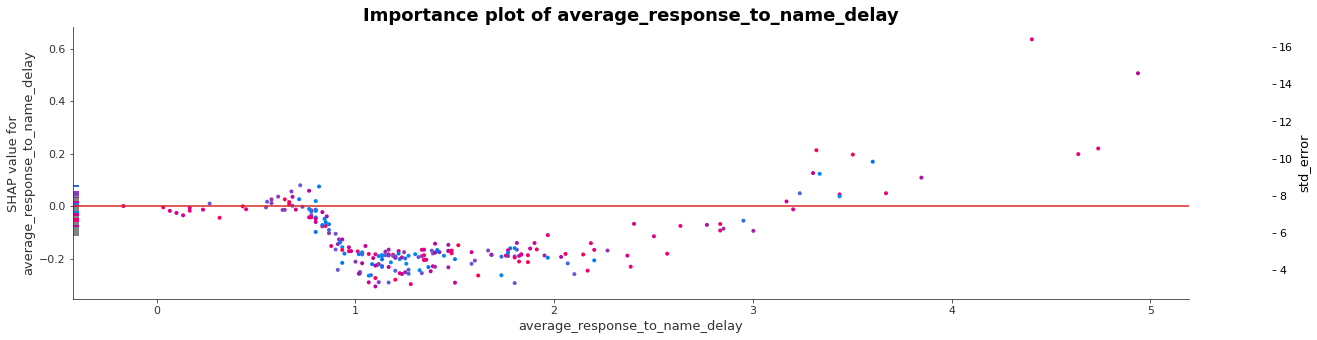

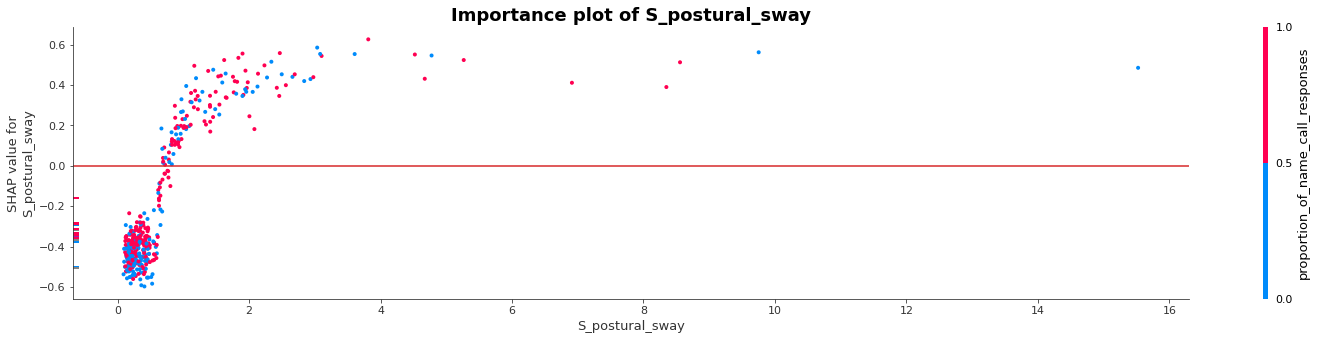

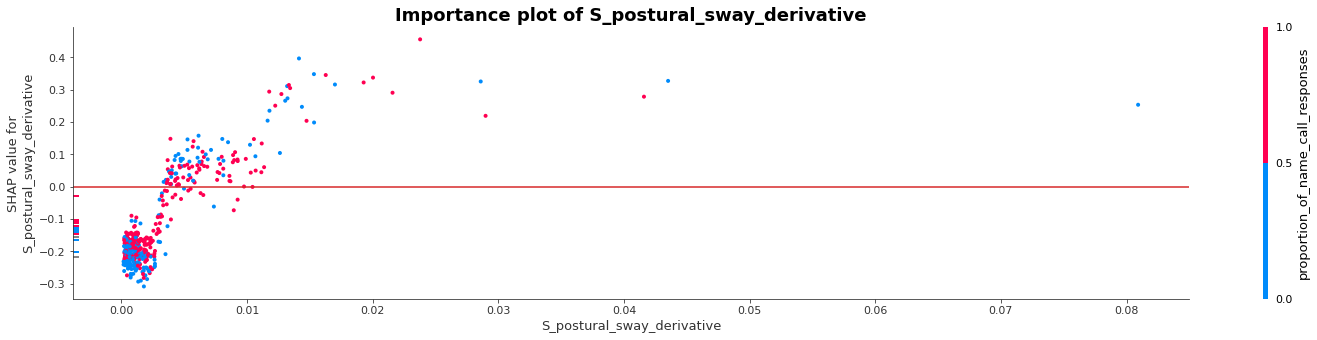

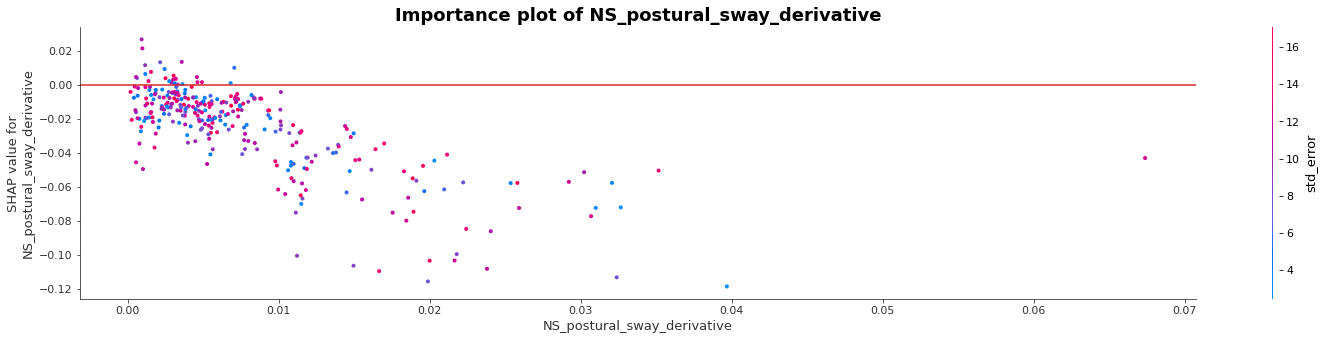

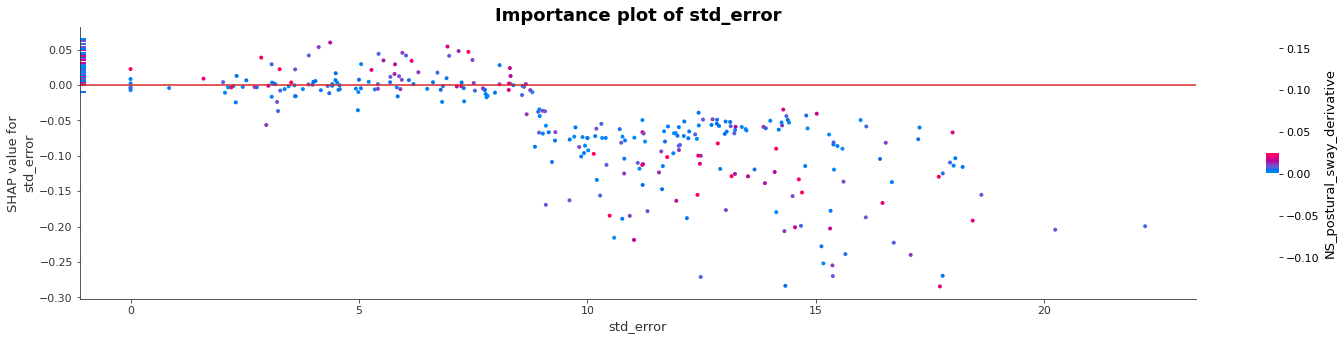

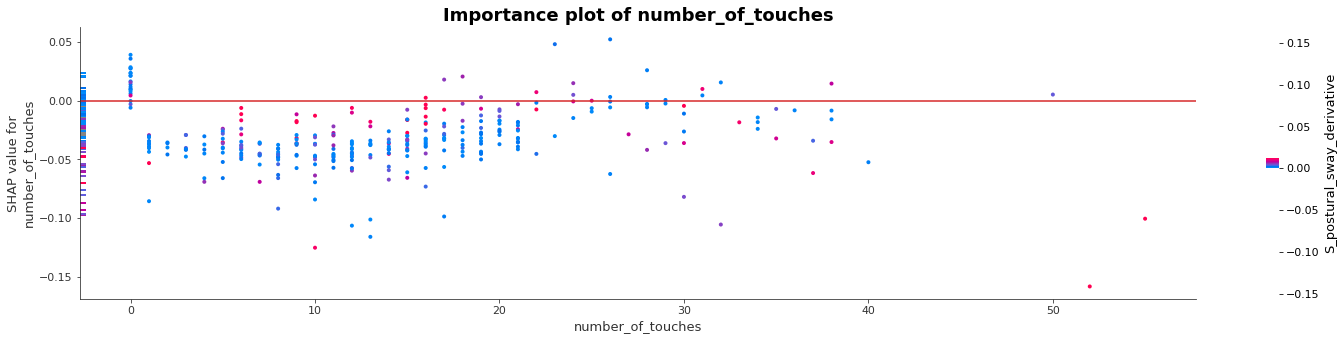

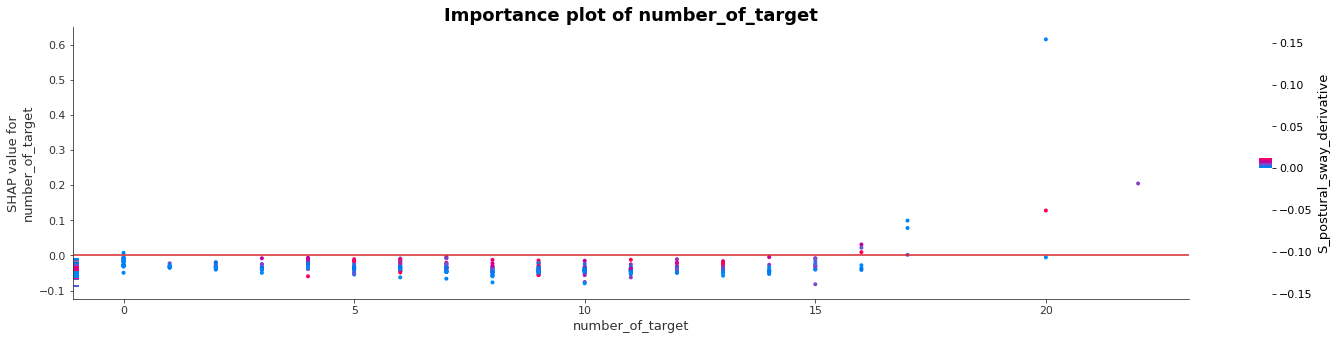

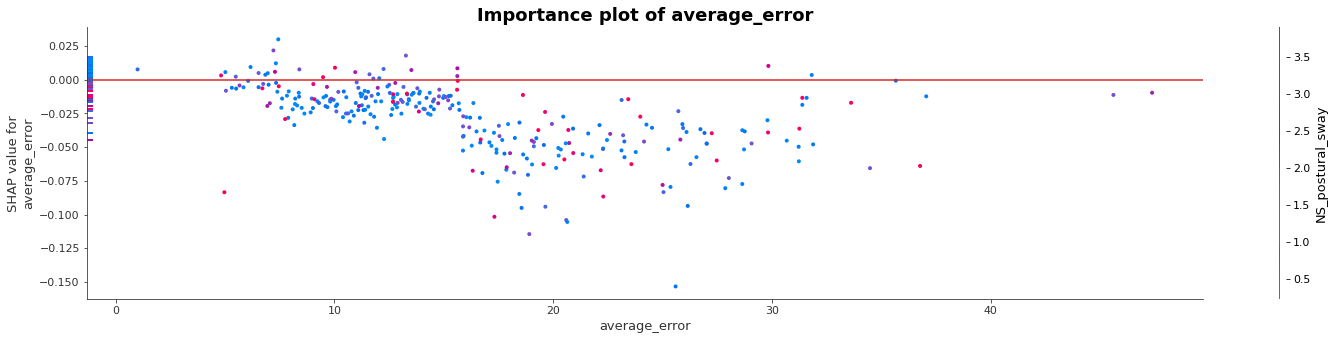

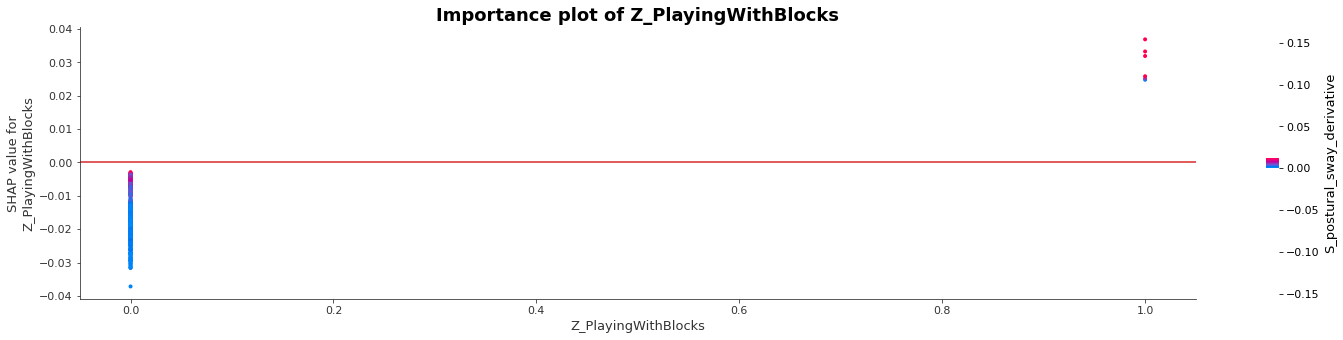

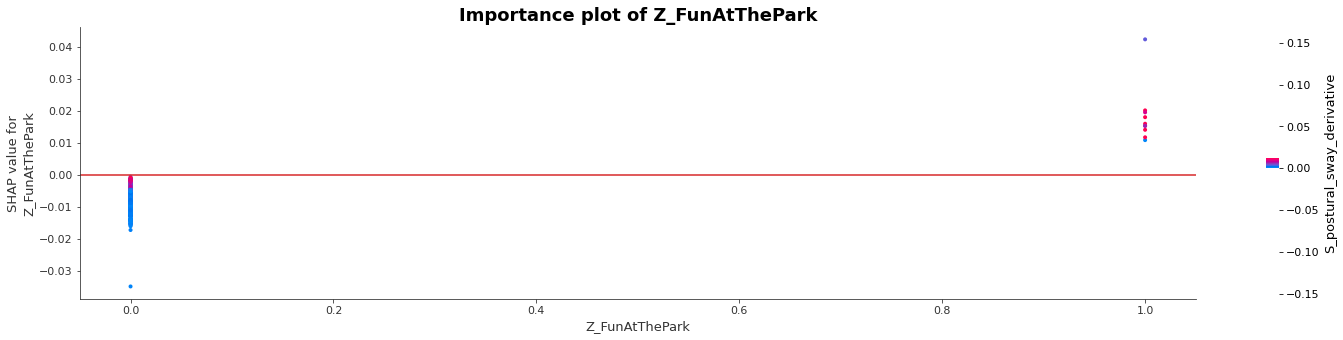

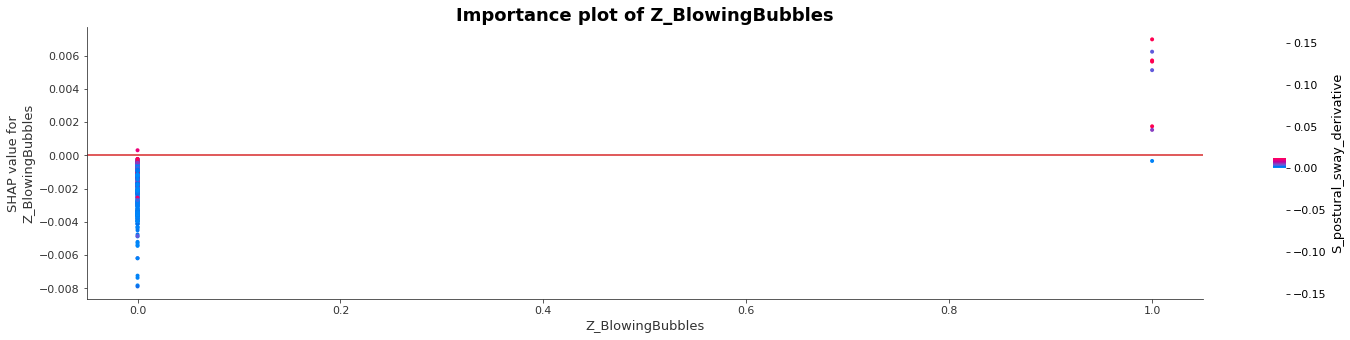

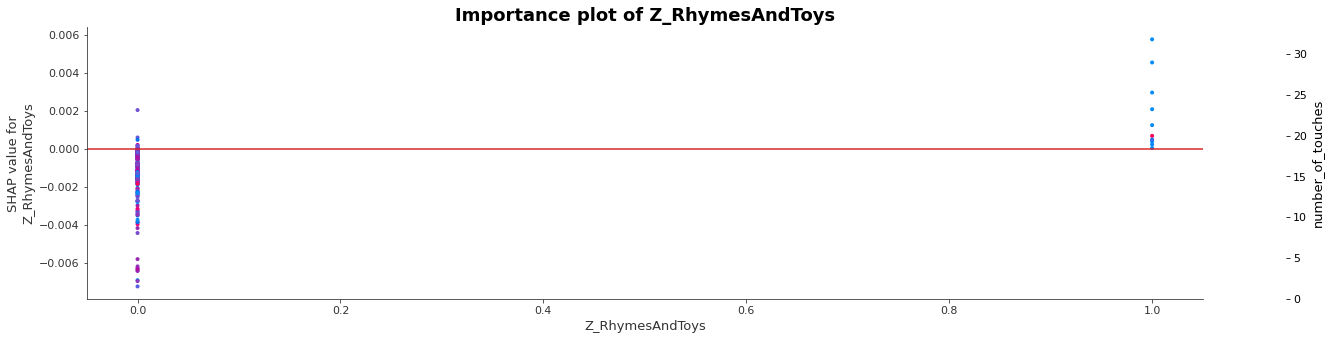

In [307]:
X = deepcopy(exp.dataset.X_train)
X[X==-5] = np.nan
for feat in exp.features_name:
    if feat =='NS_postural_sway':
        continue
    
    fig, ax = plt.subplots(1, 1, figsize=(25, 5))
    ax.axhline(0, color='tab:red')
    ax.set_title("Importance plot of {}".format(feat), weight='bold', fontsize=18)
    shap.dependence_plot(feat, exp.shap_values, X, feature_names=exp.features_name, ax=ax)

# Comparisons of the Shap values between cross-validation and when fitting with all the data

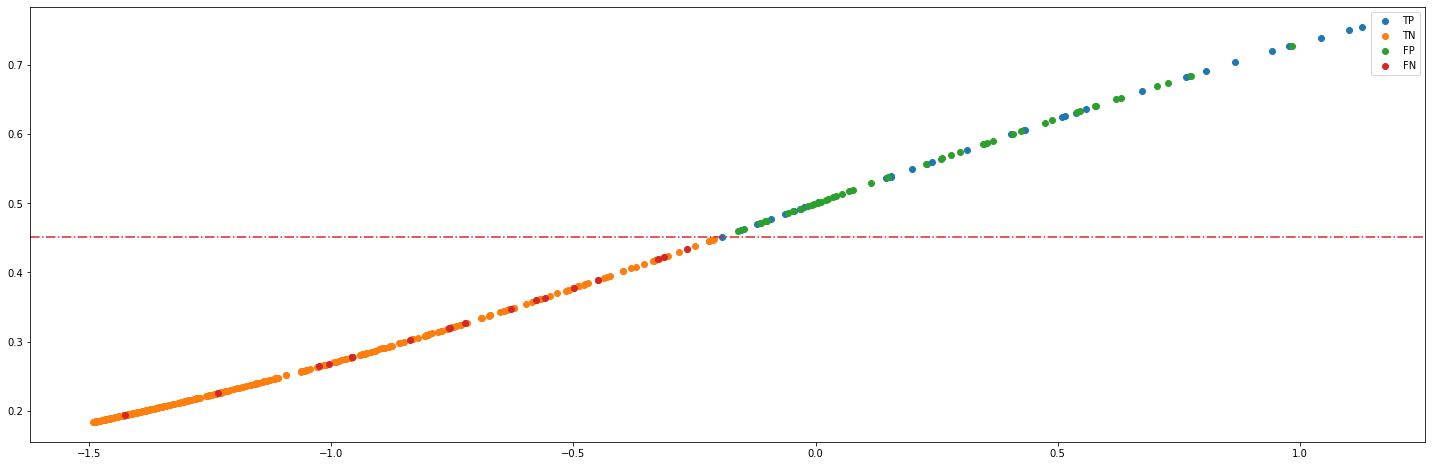

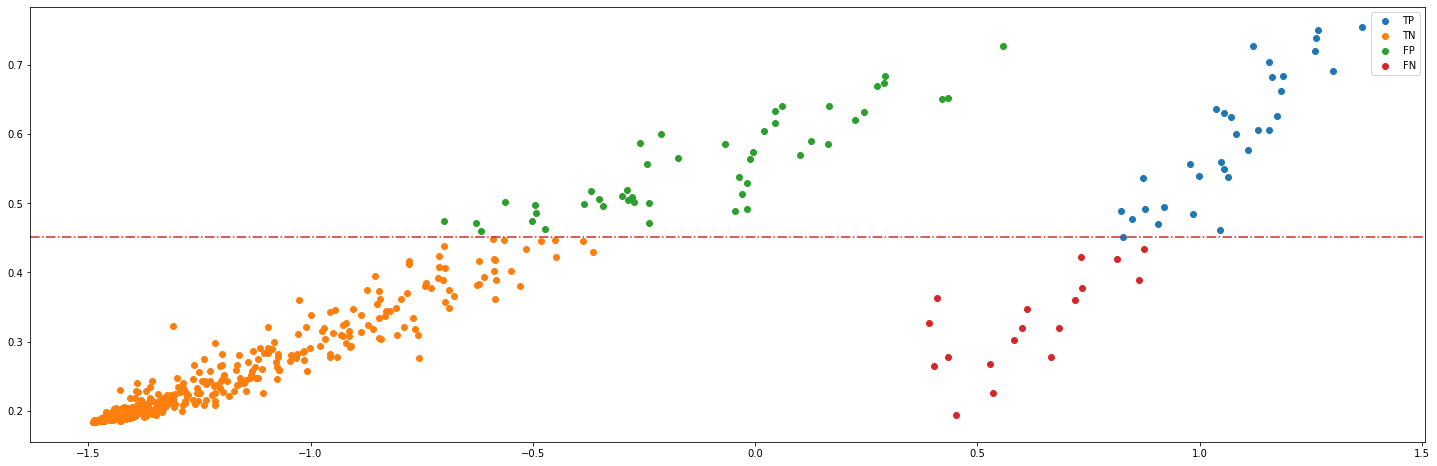

In [153]:
import shap

explainer = shap.TreeExplainer(exp.model)
shap_values = explainer.shap_values(exp.dataset.X_train)
models_expected_value = explainer.expected_value

exp.predictions_df['f_x'] = np.nan
exp.predictions_df['f_x_all'] = np.nan


for idx in range(exp.dataset.num_samples):
    exp.predictions_df.loc[idx, 'f_x'] = exp.shap_values[idx].sum() +  exp.models_expected_value[idx]
    exp.predictions_df.loc[idx, 'f_x_all'] = explainer.shap_values(exp.dataset.X_train)[idx].sum() +  explainer.expected_value
    
exp.predictions_df.sort_values(by='f_x')[['y_pred', 'y_true','f_x', 'TP', 'TN', 'FP', 'FN']]#[:30]

fi(25, 8);ax=plt.gca()
for name in ['TP', 'TN', 'FP', 'FN']:
    plt.scatter(exp.predictions_df[exp.predictions_df[name]==1]['f_x'].to_numpy(), exp.predictions_df[exp.predictions_df[name]==1]['y_pred'].to_numpy(), label=name)
plt.axhline(exp.optimal_threshold, color='tab:red', linestyle='-.');plt.legend()

fi(25, 8);ax=plt.gca()
for name in ['TP', 'TN', 'FP', 'FN']:
    plt.scatter(exp.predictions_df[exp.predictions_df[name]==1]['f_x_all'].to_numpy(), exp.predictions_df[exp.predictions_df[name]==1]['y_pred'].to_numpy(), label=name)
plt.axhline(exp.optimal_threshold, color='tab:red', linestyle='-.');plt.legend()

# Closer look at the Misclassified samples

In [39]:
import shap
explainer = shap.TreeExplainer(exp.model)
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

Explainer expected value: [0.11800709]


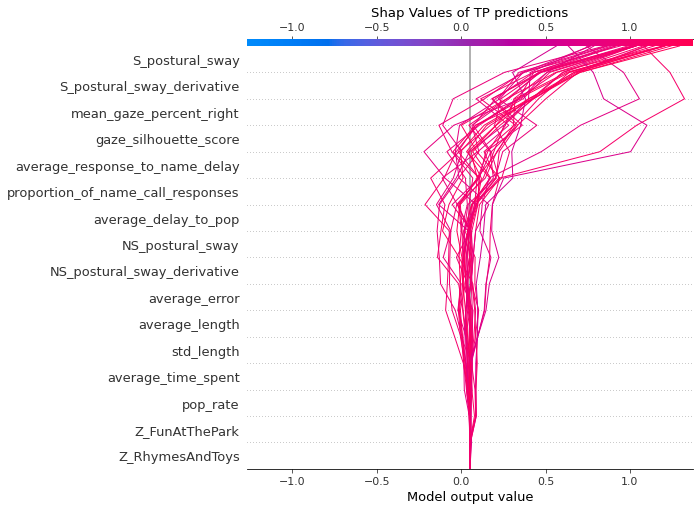

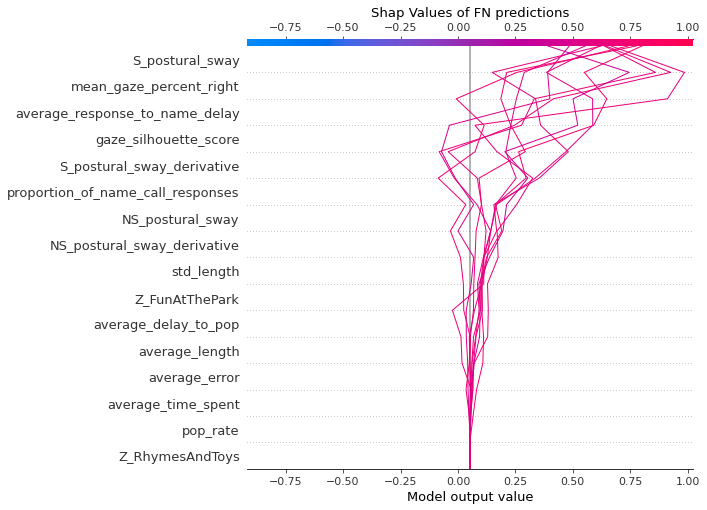

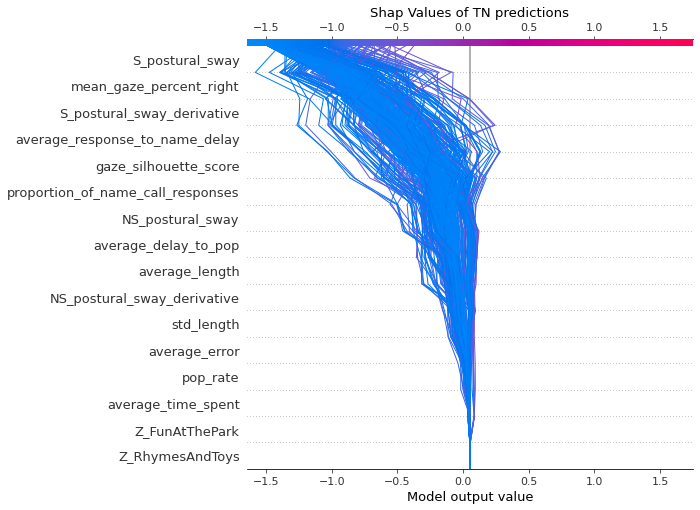

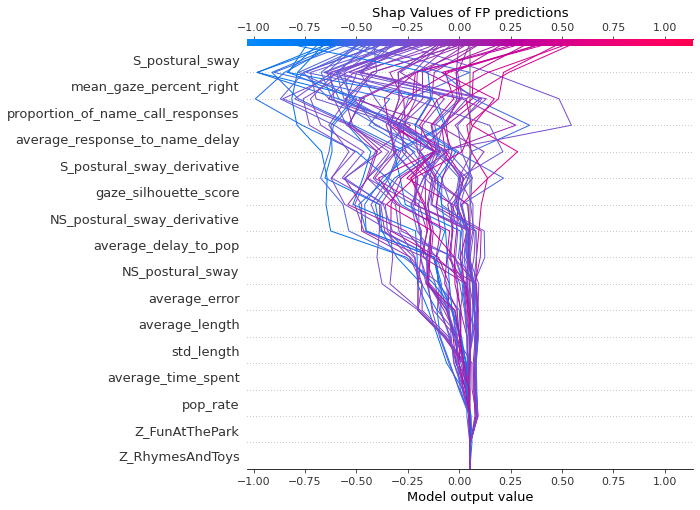

In [157]:
for name in ['TP','FN', 'TN', 'FP']:


    index  = np.array(list(exp.predictions_df[exp.predictions_df[name]==1].index))
    features = exp.predictions_df[exp.features_name]

    shap_values = explainer.shap_values(features)[index]
    shap_interaction_values = explainer.shap_interaction_values(features)
    hap_interaction_values = shap_interaction_values[index]
    shap.decision_plot(expected_value, shap_values, features, title="Shap Values of {} predictions".format(name))

## How the model performs of subgroups of data. 

Here we look at the performances when considering subsets of data by removing the participants missing a feature. 
E.G what are the performances if we remove the participants that miss one feature ? Is it better or worse ? We expect the performances are better, if the hypothess thta missing a feature entails a loss of information in the input, so we expect the model to perform worse on those data. 

Note that another way to look at that is isolating participants with missing a feature and look at the performances. 

In [353]:
variables

['average_length',
 'std_length',
 'average_error',
 'pop_rate',
 'average_delay_to_pop',
 'average_time_spent']

mean_gaze_percent_right  gaze_silhouette_score  proportion_of_name_call_responses  average_response_to_name_delay  S_postural_sway  NS_postural_sway  S_postural_sway_derivative  NS_postural_sway_derivative  average_length  std_length  average_error  pop_rate  average_delay_to_pop  average_time_spent  Z_FunAtThePark  Z_RhymesAndToys  y_true    y_pred  TN  TP  FP  FN  mdp
1                   0.481269               0.582087                           1.000000                        1.384717         0.205969          1.238350                    0.000476                     0.013931        7.781981    6.760262      11.703175  0.800000              2.695000            0.741000             0.0              0.0     0.0  0.185665   1   0   0   0    0
3                   0.434169               0.393004                           1.000000                        0.556111         2.978287          2.007431                    0.016263                     0.006172        6.856880    8.420087      11.981659  0.888889              3.211286            0.927000             0.0              0.0     0.0  0.395438   0   0   1   0    0
13                  0.568734               0.649091                           1.000000                        0.912022         0.164098          0.546002                    0.000375                     0.002896        4.849639    5.443136      14.357930  0.611111              2.337667            1.780000             0.0              0.0     0.0  0.204322   1   0   0   0    0
14                  0.582219               0.394149                           1.000000                        1.084417         1.571709          2.184546                    0.008108                     0.014957        2.046430    4.182066       6.934383  1.000000              3.039333            0.394667             0.0              0.0     0.0  0.529841   0   0   1   0    0
15                  0.617876               0.523076                           0.666667                        1.735067         2.422486          3.209192                    0.010437                     0.013588        4.103233    4.168139       9.086770  0.954545              2.194867            0.605200             0.0              0.0     1.0  0.547475   0   1   0   0    0
..                       ...                    ...                                ...                             ...              ...               ...                         ...                          ...             ...         ...            ...       ...                   ...                 ...             ...              ...     ...       ...  ..  ..  ..  ..  ...
441                 0.501621               0.570985                           0.333333                        0.433767         0.597399          0.570025                    0.004312                     0.003997      130.192765  209.151826      27.867744  0.166667              3.332500            0.415000             0.0              0.0     0.0  0.292758   1   0   0   0    0
443                 0.534895               0.707216                           1.000000                        0.850850         0.491351          1.628709                    0.002315                     0.008190        0.389595    1.292140       7.212946  0.916667              3.155429            0.667333             0.0              0.0     0.0  0.203103   1   0   0   0    0
445                 0.593662               0.515159                           1.000000                        0.912022         0.803349          1.341194                    0.005299                     0.007576        5.853236    4.644631      11.603609  0.875000              2.380095            0.666125             0.0              0.0     1.0  0.397276   0   1   0   0    0
449                 0.523815               0.620826                           0.333333                        1.134467         0.255300          0.696718                    0.000736                     0.005474        7.68359

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)   TN  TP  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
None  0.899   0.503         0.97             0.327                   0.99                           0.485               0.344     0.865                                   0.463                                              0.846                                                       0.866                                            0.314                            0.987                                   0.154                             0.686                            0.013  155  11  24   2      80.729167       5.729167           12.5       1.041667  192

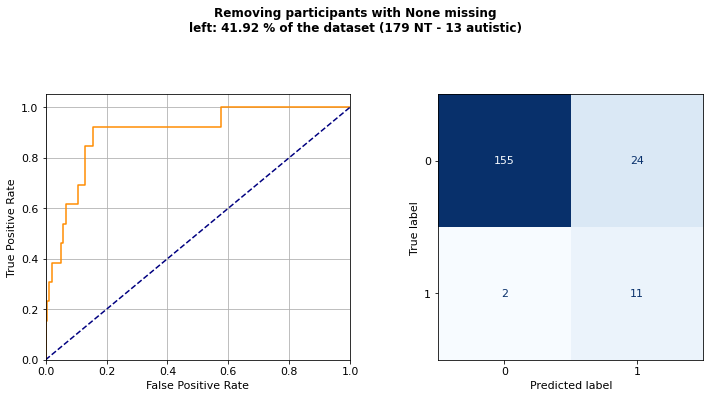

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)   TN  TP  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
Gaze_PR  0.896   0.477        0.891             0.218                  0.973                           0.542               0.264     0.871                                   0.501                                               0.78                                                        0.88                                            0.405                            0.975                                    0.22                             0.595                            0.025  346  32  47   9      79.723502       7.373272      10.829493       2.073733  434

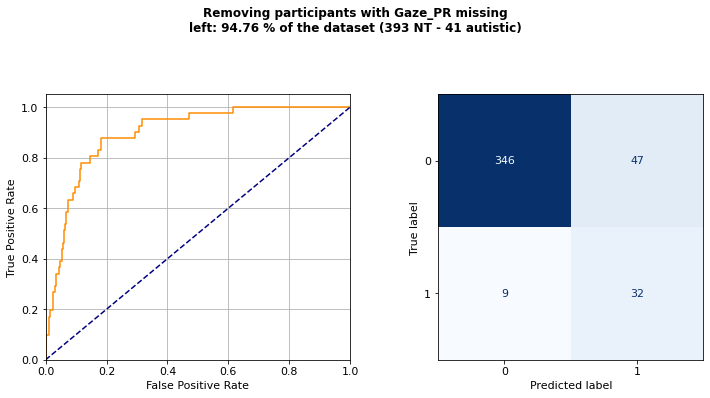

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)   TN  TP  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
Gaze_SS  0.895   0.476        0.886             0.214                  0.972                           0.541               0.259     0.871                                   0.508                                              0.786                                                        0.88                                            0.412                            0.975                                   0.214                             0.588                            0.025  346  33  47   9       79.54023       7.586207      10.804598       2.068966  435

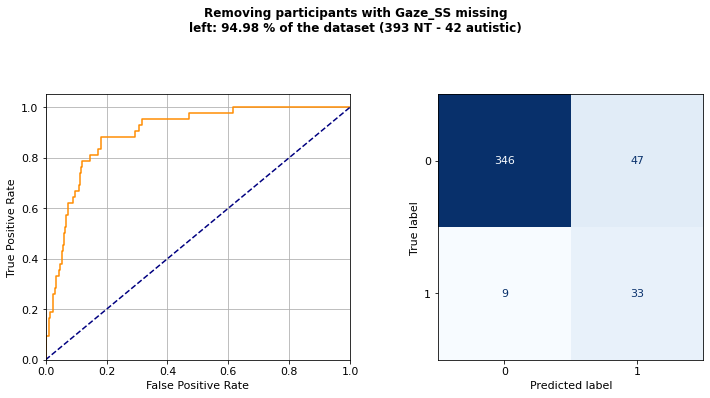

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)   TN  TP  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
RTN_f  0.881   0.442        0.876             0.194                  0.968                             0.5               0.229     0.848                                   0.461                                              0.773                                                       0.856                                            0.366                            0.972                                   0.227                             0.634                            0.028  351  34  59  10      77.312775       7.488987      12.995595       2.202643  454

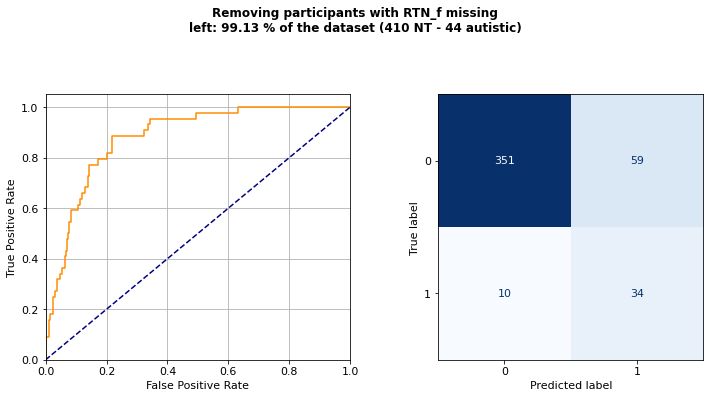

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)   TN  TP  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
RTN_d  0.877   0.478        0.932             0.257                  0.984                           0.486               0.274     0.848                                   0.418                                               0.71                                                       0.861                                            0.338                            0.967                                    0.29                             0.662                            0.033  267  22  43   9       78.29912       6.451613      12.609971       2.639296  341

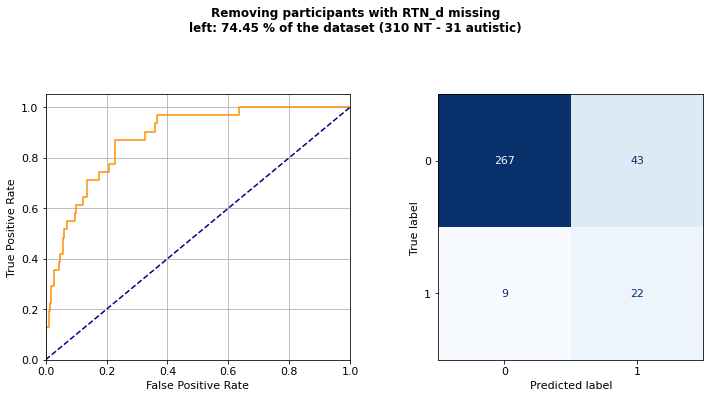

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)   TN  TP  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
S_PS  0.895   0.475        0.886             0.213                  0.972                           0.537               0.259     0.869                                   0.504                                              0.786                                                       0.878                                            0.407                            0.975                                   0.214                             0.593                            0.025  346  33  48   9      79.357798       7.568807      11.009174        2.06422  436

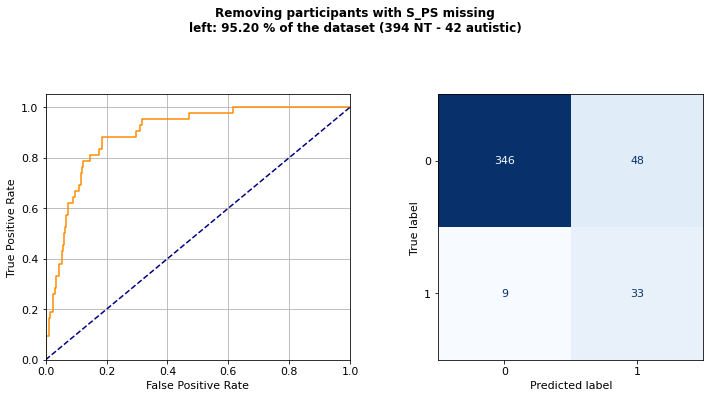

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)   TN  TP  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
NS_PS  0.873    0.43        0.872             0.187                  0.967                           0.482               0.217     0.841                                   0.443                                              0.756                                                        0.85                                            0.354                             0.97                                   0.244                             0.646                             0.03  351  34  62  11      76.637555       7.423581      13.537118       2.401747  458

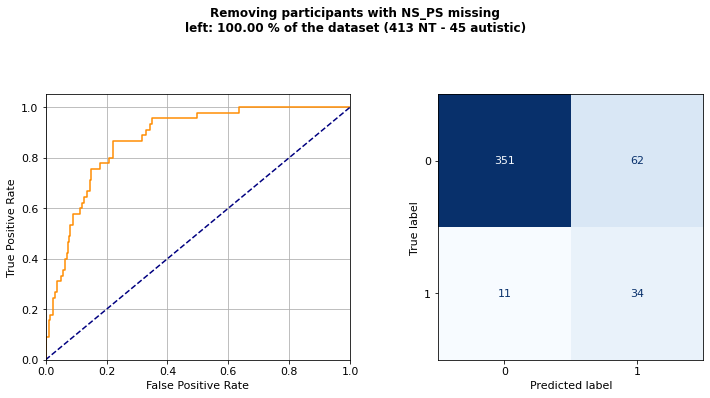

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)   TN  TP  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
S_PSd  0.895   0.475        0.886             0.213                  0.972                           0.537               0.259     0.869                                   0.504                                              0.786                                                       0.878                                            0.407                            0.975                                   0.214                             0.593                            0.025  346  33  48   9      79.357798       7.568807      11.009174        2.06422  436

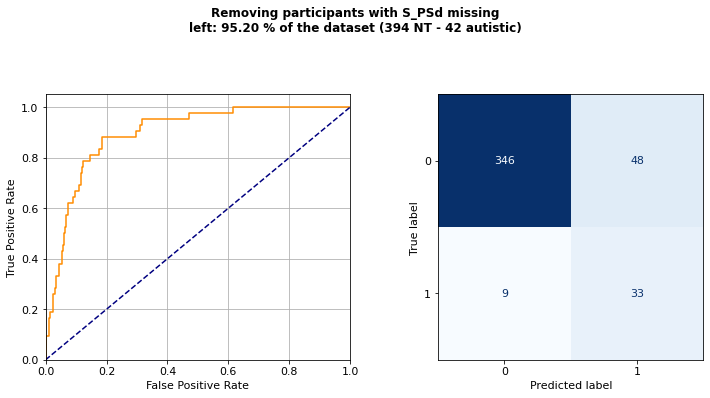

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)   TN  TP  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
NS_PSd  0.873    0.43        0.872             0.187                  0.967                           0.482               0.217     0.841                                   0.443                                              0.756                                                        0.85                                            0.354                             0.97                                   0.244                             0.646                             0.03  351  34  62  11      76.637555       7.423581      13.537118       2.401747  458

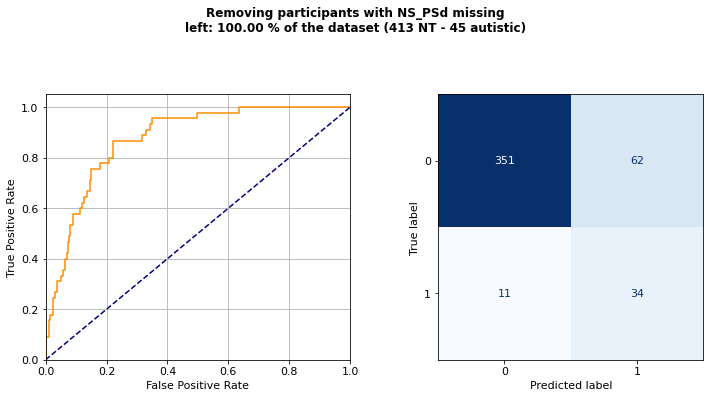

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)   TN  TP  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
Game   0.91   0.491        0.911             0.218                   0.96                           0.577               0.298     0.869                                   0.528                                              0.864                                                        0.87                                            0.396                            0.985                                   0.136                             0.604                            0.015  194  19  29   3      79.183673       7.755102      11.836735        1.22449  245

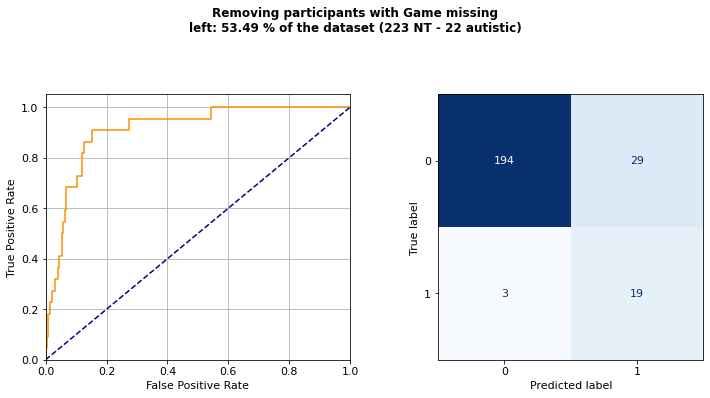

In [405]:
from metrics import f1score, average_precision, bestf1score, calc_auprg, create_prg_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, plot_roc_curve, auc, precision_recall_curve, roc_auc_score, average_precision_score
import prg


mapping_name = {0: "Complete", 
                12: "Only game missing", 
                1: "Only delay missing", 
                13: "Game & Delay missing"}

#for mdp_index in mapping_name.keys():
#    d = dataframe[dataframe['mdp']==mdp_index]

grouped_missing_features = {#'All': [], 
                            'None':DEFAULT_PREDICTORS,
                            'Gaze_PR': ['mean_gaze_percent_right'],
                             'Gaze_SS': ['gaze_silhouette_score'],
                             'RTN_f': ['proportion_of_name_call_responses'],
                             'RTN_d': ['average_response_to_name_delay'],
                            
                             'S_PS': ['S_postural_sway'],
                             'NS_PS': ['NS_postural_sway'],
                             'S_PSd': ['S_postural_sway_derivative'],
                             'NS_PSd': ['NS_postural_sway_derivative'],
                             'Game': ['average_length','std_length','average_error', 'pop_rate','average_delay_to_pop','average_time_spent'], 
                             }

results = deepcopy(exp.performances_df)

results.index = ['All']

for name in ['TP','FN', 'TN', 'FP']:
    results[name] = exp.predictions_df[name].sum()
    
for name in ['TP','FN', 'TN', 'FP']:
    results[name+'_normalized'] = 100*exp.predictions_df[name].mean().round(2)

results['N'] = len(exp.predictions_df)



for missing, variables in grouped_missing_features.items():
    
    d=dataframe.dropna(subset=variables, how='any') 

    
    title = "Removing participants with {} missing".format(missing)
    title+= "\nleft: {:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(d)/len(dataframe), len(d[d['y_true']==0]), len(d[d['y_true']==1]))
    
    y_true = d['y_true'].to_numpy()
    y_pred = d['y_pred'].to_numpy()
    
    
    

    res = compute_results(d, y_true, y_pred, exp.optimal_threshold, name=missing, title=title)
    
    results = results.append(res)
    
    

In [ ]:

results = deepcopy(exp.performances_df)

results.index = ['All']

for name in ['TP','FN', 'TN', 'FP']:
    results[name] = exp.predictions_df[name].sum()
    
for name in ['TP','FN', 'TN', 'FP']:
    results[name+'_normalized'] = 100*exp.predictions_df[name].mean().round(2)

results['N'] = len(exp.predictions_df)

df_with_none_missing = deepcopy(dataframe.dropna(subset=exp.features_name, how='any'))


for missing, variables in grouped_missing_features.items():
    
    d=dataframe.dropna(subset=variables, how='any') 
    
     
    # df with rows having variable missing 
    
    #d = df_with_none_missing.append(dataframe.drop(index=dataframe.dropna(subset=variables, how='any').index))


    print(variables, len(d))
    title = "Removing participants with {} missing".format(missing)
    title+= "\nleft: {:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(d)/len(dataframe), len(d[d['y_true']==0]), len(d[d['y_true']==1]))
    
    y_true = d['y_true'].to_numpy()
    y_pred = d['y_pred'].to_numpy()
    
    
    

    res = compute_results(d, y_true, y_pred, exp.optimal_threshold, name=missing, title=title)
    
    results = results.append(res)
    
    
    
   

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)   TN  TP  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
Male  0.847    0.44        0.775             0.147                  0.937                           0.542                0.17      0.82                                   0.472                                              0.765                                                       0.829                                            0.419                            0.956                                   0.235                             0.581                            0.044  174  26  36   8      71.311475      10.655738      14.754098       3.278689  244

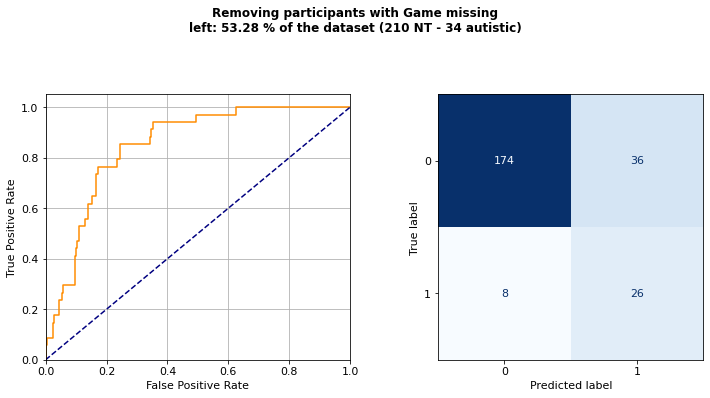

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)   TN  TP  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
Female  0.926   0.534        0.986             0.399                  0.994                            0.56               0.408     0.864                                   0.362                                              0.727                                                       0.872                                            0.235                            0.983                                   0.273                             0.765                            0.017  177   8  26   3       82.71028       3.738318      12.149533       1.401869  214

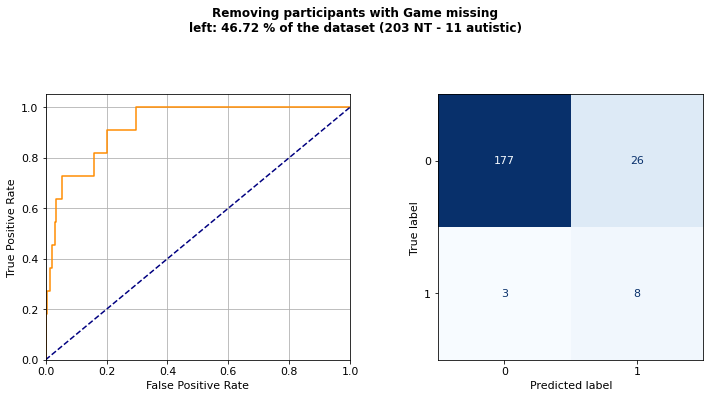

In [386]:

results = deepcopy(exp.performances_df)

results.index = ['All']

for name in ['TP','FN', 'TN', 'FP']:
    results[name] = exp.predictions_df[name].sum()
    
for name in ['TP','FN', 'TN', 'FP']:
    results[name+'_normalized'] = 100*exp.predictions_df[name].mean().round(2)

results['N'] = len(exp.predictions_df)

df_with_none_missing = deepcopy(dataframe.dropna(subset=exp.features_name, how='any'))


for sex, sex_encoding in zip(['Male', 'Female'], [0,1]):
    
    d=dataframe.iloc[list(exp.dataset.df[exp.dataset.df['sex']==sex_encoding].index)]
    
     
    # df with rows having variable missing 
    
    #d = df_with_none_missing.append(dataframe.drop(index=dataframe.dropna(subset=variables, how='any').index))


    title = "Removing participants with {} missing".format(missing)
    title+= "\nleft: {:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(d)/len(dataframe), len(d[d['y_true']==0]), len(d[d['y_true']==1]))
    
    y_true = d['y_true'].to_numpy()
    y_pred = d['y_pred'].to_numpy()
    
    
    

    res = compute_results(d, y_true, y_pred, exp.optimal_threshold, name=sex, title=title)
    
    results = results.append(res)
    
    
    
   



In [398]:
results#['AUROC'].reset_index()

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP  FN   TN  FP  TP_normalized  FN_normalized  TN_normalized  FP_normalized    N
All      0.873   0.430        0.872             0.187                  0.967                           0.482               0.217     0.841                                   0.443                                              0.756                                                       0.850                                            0.354                            0.970                                   0.244                             0.646                            0.030  34  11  351  62       7.000000       2.000000      77.000000      14.000000  458
All      0.873   0.430        0.872             0.187                  0.967                           0.482               0.217     0.841                                   0.443                                              0.756                                                       0.850                                            0.354                            0.970                                   0.244                             0.646                            0.030  34  11  351  62       7.423581       2.401747      76.637555      13.537118  458
None     0.899   0.503        0.970             0.327                  0.990                           0.485               0.344     0.865                                   0.463                                              0.846                                                       0.866                                            0.314                            0.987                                   0.154                             0.686                            0.013  11   2  155  24       5.729167       1.041667      80.729167      12.500000  192
Gaze_PR  0.896   0.477        0.891             0.218                  0.973                           0.542               0.264     0.871                                   0.501                                              0.780                                                       0.880                                            0.405                            0.975                                   0.220                             0.595                            0.025  32   9  346  47       7.373272       2.073733      79.723502      10.829493  434
Gaze_SS  0.895   0.476        0.886             0.214                  0.972                           0.541               0.259     0.871                                   0.508                                              0.786                                                       0.880                                            0.412                            0.975                                   0.214                             0.588                            0.025  33   9  346  47       7.586207       2.068966      79.540230      10.804598  435
RTN_f    0.881   0.442        0.876             0.194                  0.968                           0.500               0.229     0.848                                   0.461                                              0.773                                                       0.856                                            0.366                            0.972                                   0.227                             0.634                            0.028  34  10  351  59       7.488987       2.202643      77.312775      12.995595  454
RTN_d    0.877   0.478        0.932             0.257                  0.984      

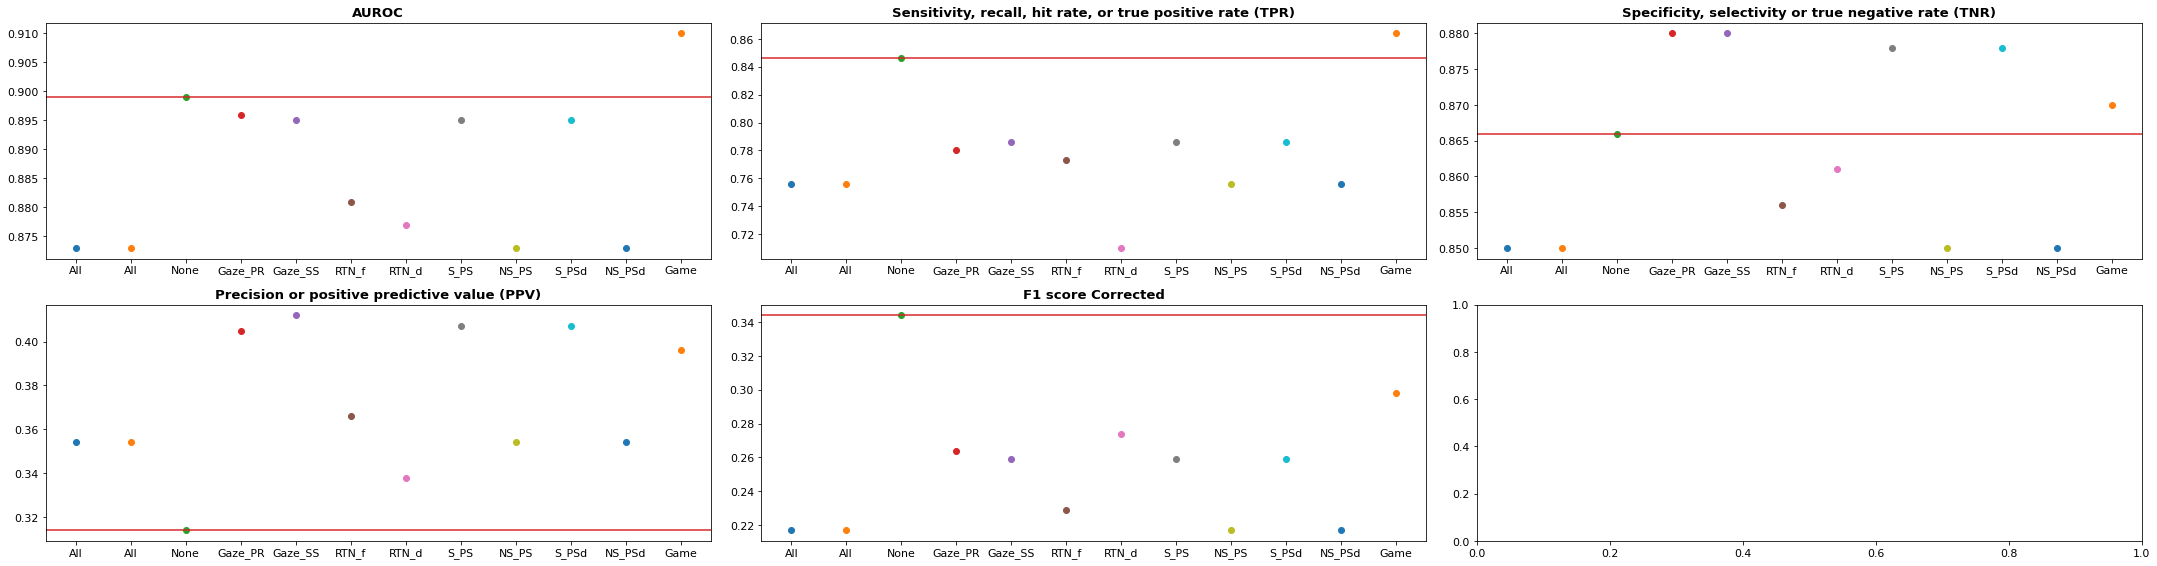

In [404]:
measures = ['AUROC', 'Sensitivity, recall, hit rate, or true positive rate (TPR)', 'Specificity, selectivity or true negative rate (TNR)', 'Precision or positive predictive value (PPV)', 'F1 score Corrected']


n_plots = len(measures)

fix, axes = plt.subplots(3, 2, figsize=(30, 8));axes = axes.flatten()

for idx, measure in enumerate(measures):
    
    #results[measure].plot(kind='bar', ax=axes[idx])
    
    
    for ii, (_, row) in enumerate(results[measure].reset_index().iterrows()):
        
        axes[idx].scatter(ii, row[measure], label=row['index'])
    
    axes[idx].set_xticks(np.arange(len(results)))
    axes[idx].set_xticklabels(results.index)
        
    axes[idx].axhline(results.loc['None', measure], color='tab:red')
        
        
    #axes[idx].legend()
    axes[idx].set_title(measure, weight='bold')
    
plt.tight_layout()

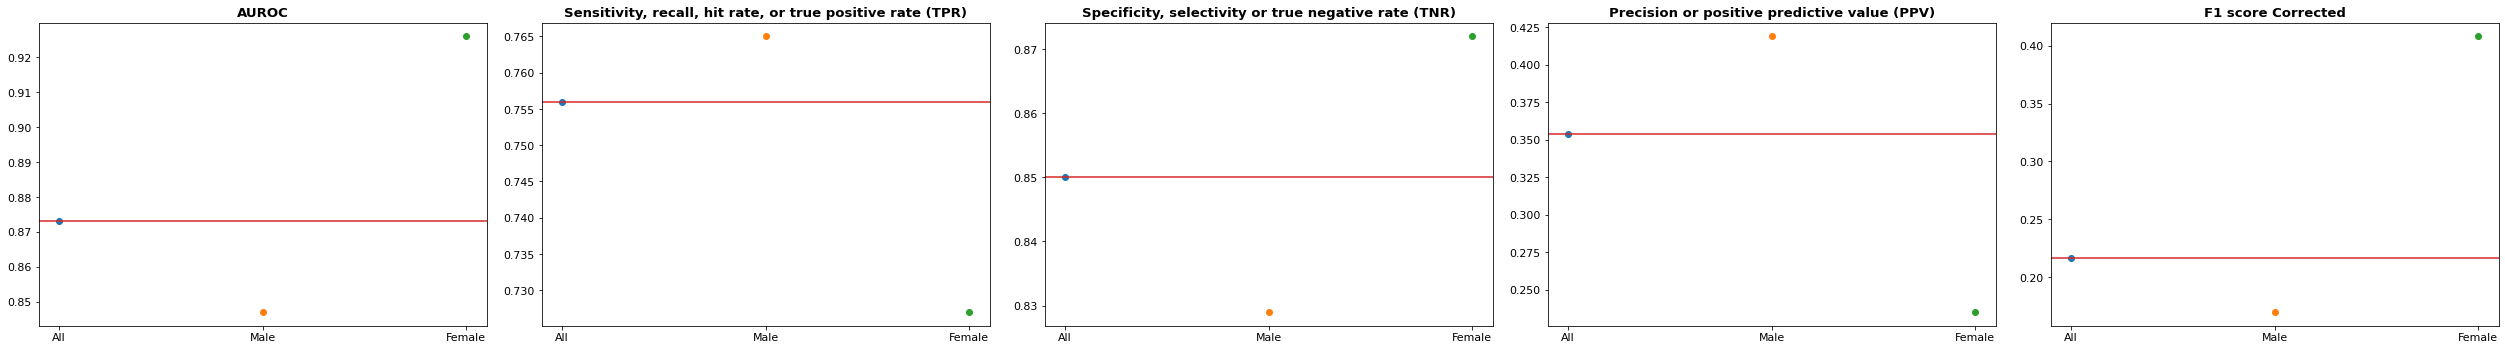

In [396]:
measures = ['AUROC', 'Sensitivity, recall, hit rate, or true positive rate (TPR)', 'Specificity, selectivity or true negative rate (TNR)', 'Precision or positive predictive value (PPV)', 'F1 score Corrected']


n_plots = len(measures)

fix, axes = plt.subplots(1, 5, figsize=(35, 5))#;axes = axes.flatten()

for idx, measure in enumerate(measures):
    
    #results[measure].plot(kind='bar', ax=axes[idx])
    
    
    for ii, (_, row) in enumerate(results[measure].reset_index().iterrows()):
        
        axes[idx].scatter(ii, row[measure], label=row['index'])
    
    axes[idx].set_xticks(np.arange(len(results)))
    axes[idx].set_xticklabels(results.index)
        
    axes[idx].axhline(results.loc['All', measure], color='tab:red')
        
        
    #axes[idx].legend()
    axes[idx].set_title(measure, weight='bold')
    
plt.tight_layout()

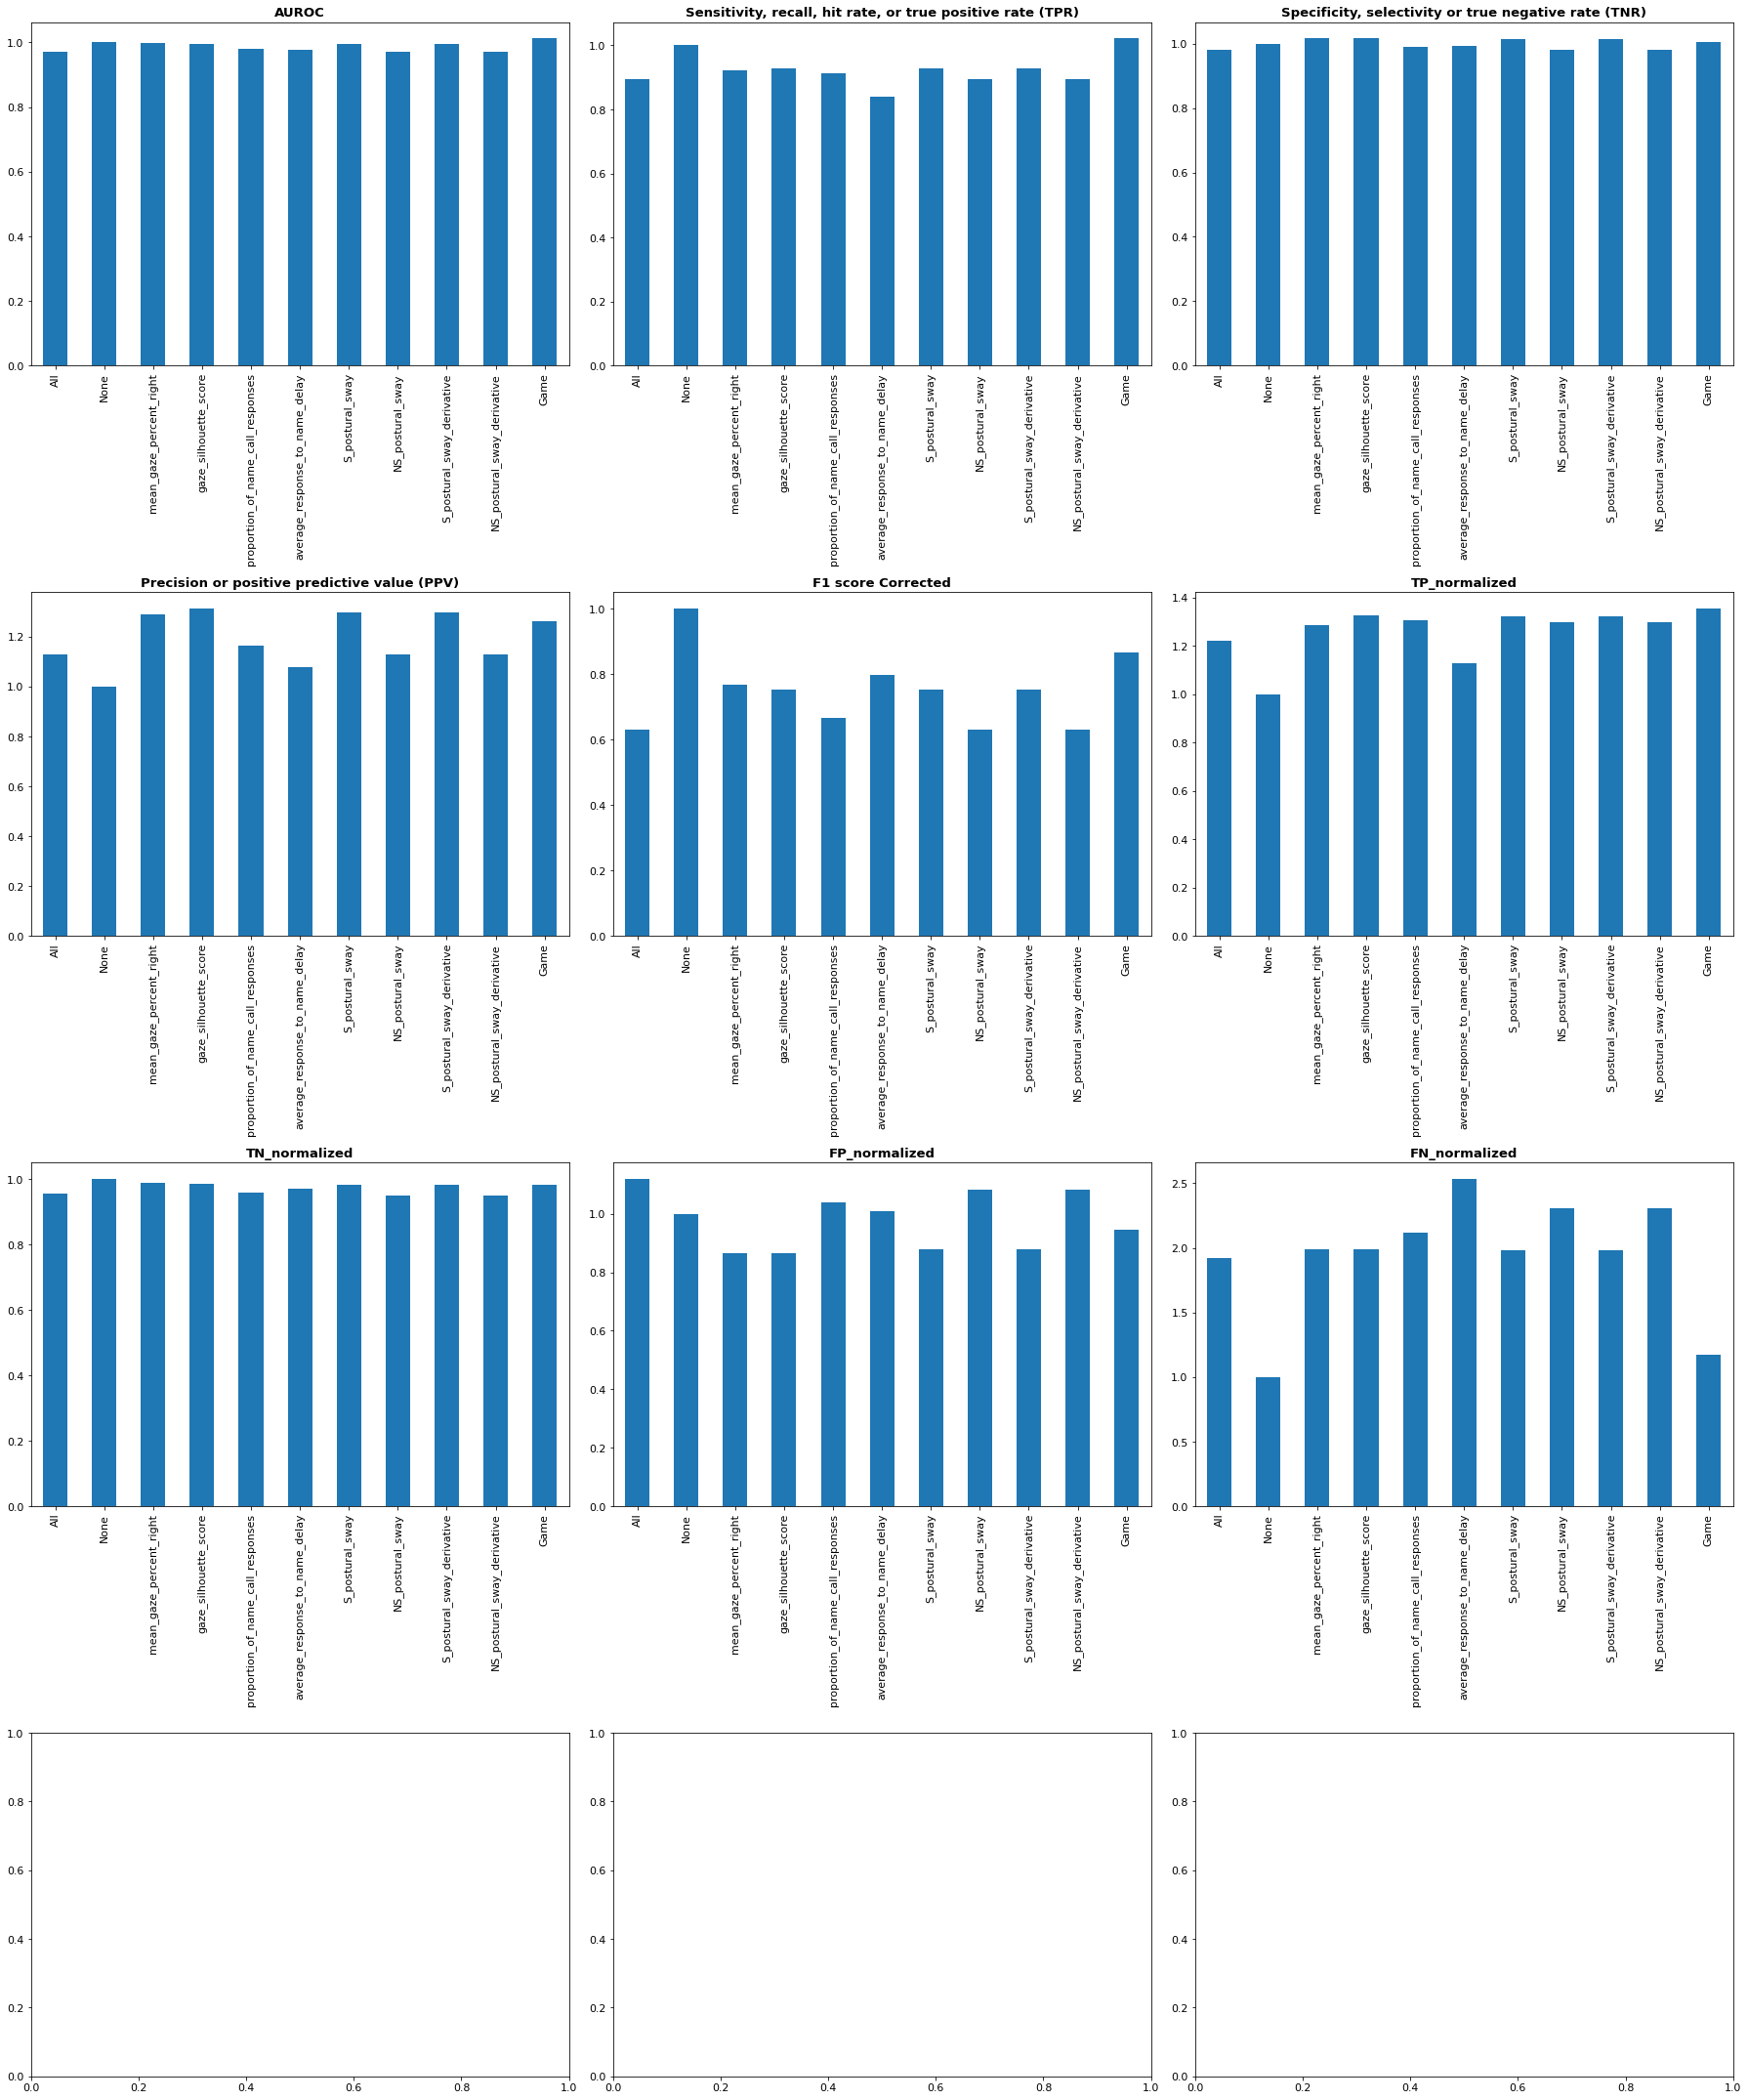

In [291]:
measures = ['AUROC', 'Sensitivity, recall, hit rate, or true positive rate (TPR)', 'Specificity, selectivity or true negative rate (TNR)', 'Precision or positive predictive value (PPV)', 'F1 score Corrected', 
           'TP_normalized', 'TN_normalized', 'FP_normalized', 'FN_normalized']


n_plots = len(measures)

fix, axes = plt.subplots(n_plots//3+1, 3, figsize=(25, 30));axes = axes.flatten()

for idx, measure in enumerate(measures):
    
    results[measure].plot(kind='bar', ax=axes[idx])
    
    axes[idx].set_title(measure, weight='bold')
    
plt.tight_layout()

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)   TN  TP  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
None  0.858   0.425        0.816             0.156                  0.931                             0.5               0.201     0.823                                   0.431                                              0.719                                                       0.838                                            0.377                            0.956                                   0.281                             0.623                            0.044  196  23  38   9       0.736842       0.086466       0.142857       0.033835  266

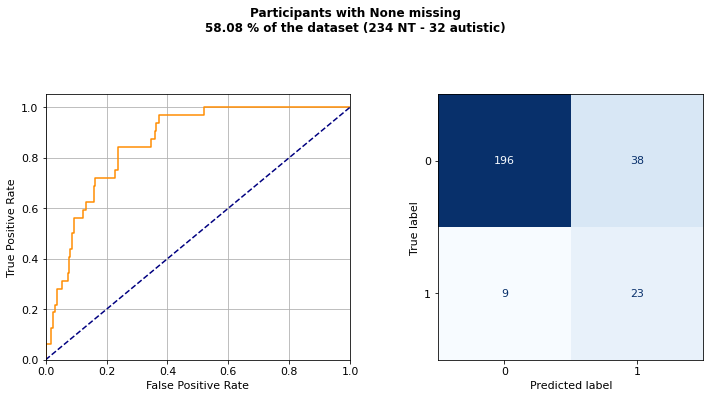

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TN  TP  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
average_response_to_name_delay  0.847   0.337        0.701             0.081                   0.74                           0.533               0.175     0.821                                   0.495                                              0.857                                                       0.816                                            0.387                            0.977                                   0.143                             0.613                            0.023  84  12  19   2       0.717949       0.102564       0.162393       0.017094  117

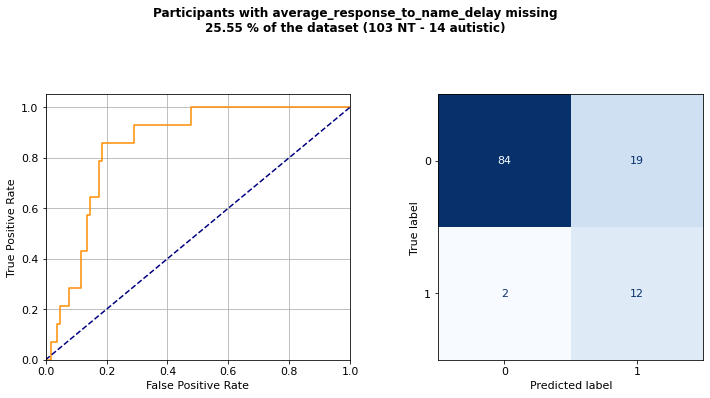

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)   TN  TP  FP  FN  TN_normalized  TP_normalized  FP_normalized  FN_normalized    N
Game  0.828   0.385        0.807             0.168                  0.954                           0.423               0.195     0.808                                   0.355                                              0.652                                                       0.826                                            0.312                            0.952                                   0.348                             0.688                            0.048  157  15  33   8       0.737089       0.070423        0.15493       0.037559  213

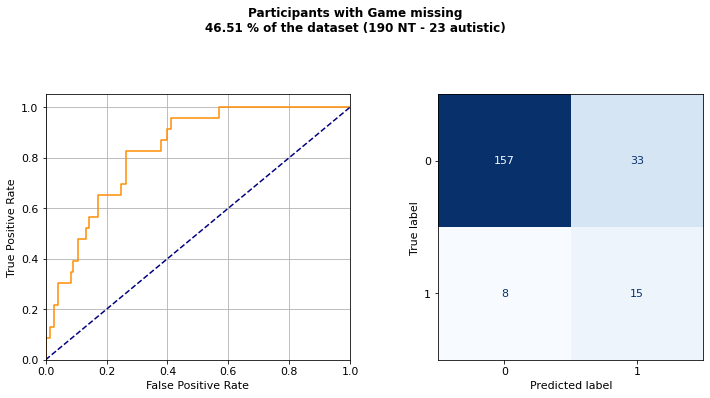

In [250]:
from metrics import f1score, average_precision, bestf1score, calc_auprg, create_prg_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, plot_roc_curve, auc, precision_recall_curve, roc_auc_score, average_precision_score
import prg


mapping_name = {0: "Complete", 
                12: "Only game missing", 
                1: "Only delay missing", 
                13: "Game & Delay missing"}

#for mdp_index in mapping_name.keys():
#    d = dataframe[dataframe['mdp']==mdp_index]

grouped_missing_features = {'All': [], 
                            'None':DEFAULT_PREDICTORS,
                            'mean_gaze_percent_right': ['mean_gaze_percent_right'],
                             'gaze_silhouette_score': ['gaze_silhouette_score'],
                             'proportion_of_name_call_responses': ['proportion_of_name_call_responses'],
                             'average_response_to_name_delay': ['average_response_to_name_delay'],
                            
                             'S_postural_sway': ['S_postural_sway'],
                             'NS_postural_sway': ['NS_postural_sway'],
                             'S_postural_sway': ['S_postural_sway'],
                             'S_postural_sway_derivative': ['S_postural_sway_derivative'],
                             'NS_postural_sway_derivative': ['NS_postural_sway_derivative'],
                             'Game': ['average_length','std_length','average_error', 'pop_rate','average_delay_to_pop','average_time_spent'], 
                             }

results = deepcopy(exp.performances_df)

results.index = ['All']

for name in ['TP','FN', 'TN', 'FP']:
    results[name] = exp.predictions_df[name].sum()
    
for name in ['TP','FN', 'TN', 'FP']:
    results[name+'_normalized'] = 100*exp.predictions_df[name].mean().round(2)

results['N'] = len(exp.predictions_df)



for missing, variables in grouped_missing_features.items():
    
    d=dataframe.drop(index=dataframe.dropna(subset=variables, how='any').index)
    if len(d) <50:
        continue

    
    title = "Participants with {} missing".format(missing)
    title+= "\n{:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(d)/len(dataframe), len(d[d['y_true']==0]), len(d[d['y_true']==1]))
    
    y_true = d['y_true'].to_numpy()
    y_pred = d['y_pred'].to_numpy()
    
    
    

    res = compute_results(d, y_true, y_pred, exp.optimal_threshold, name=missing, title=title)
    
    results = results.append(res)
    
    

In [259]:
results

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP  TP_normalized  FN  FN_normalized   TN  TN_normalized  FP  FP_normalized    N
All                             0.873   0.430        0.872             0.187                  0.967                           0.482               0.217     0.841                                   0.443                                              0.756                                                       0.850                                            0.354                            0.970                                   0.244                             0.646                            0.030  34       7.000000  11       2.000000  351      77.000000  62      14.000000  458
None                            0.858   0.425        0.816             0.156                  0.931                           0.500               0.201     0.823                                   0.431                                              0.719                                                       0.838                                            0.377                            0.956                                   0.281                             0.623                            0.044  23       0.086466   9       0.033835  196       0.736842  38       0.142857  266
average_response_to_name_delay  0.847   0.337        0.701             0.081                  0.740                           0.533               0.175     0.821                                   0.495                                              0.857                                                       0.816                                            0.387                            0.977                                   0.143                             0.613                            0.023  12       0.102564   2       0.017094   84       0.717949  19       0.162393  117
Game                            0.828   0.385        0.807             0.168                  0.954                           0.423               0.195     0.808                                   0.355                                              0.652                                                       0.826                                            0.312                            0.952                                   0.348                             0.688                            0.048  15       0.070423   8       0.037559  157       0.737089  33       0.154930  213

Text(0, 0.5, 'True Positive Rate')

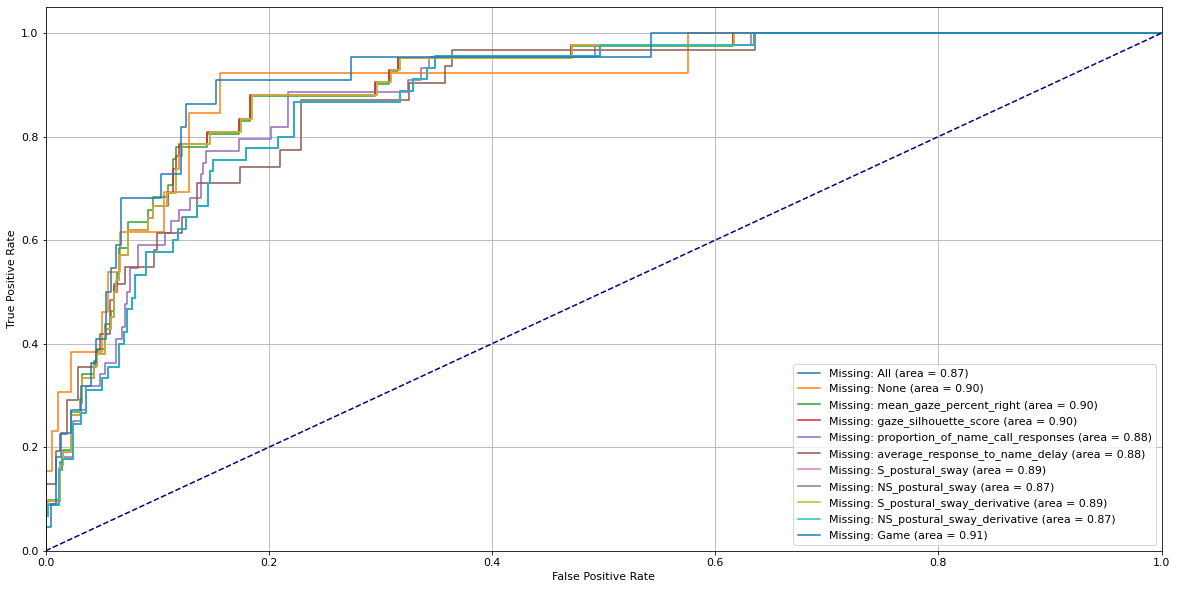

In [240]:
fig, ax =  plt.subplots(1, 1, figsize=(20, 10))


for missing, variables in grouped_missing_features.items():
    
    d=dataframe.dropna(subset=variables, how='any') 

    
    title = missing
    y_true = d['y_true'].to_numpy()
    y_pred = d['y_pred'].to_numpy()
    
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, '-', lw=1.5, label='Missing: {} (area = {:.2f})'.format(missing, roc_auc))


ax.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
ax.legend()
ax.set_xlim([0.0, 1.0]); ax.set_ylim([0.0, 1.05]); ax.grid()
ax.set_xlabel('False Positive Rate'); ax.set_ylabel('True Positive Rate')

In [243]:
results

AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP  TP_normalized  FN  FN_normalized   TN  TN_normalized  FP  FP_normalized    N
All                                0.873   0.430        0.872             0.187                  0.967                           0.482               0.217     0.841                                   0.443                                              0.756                                                       0.850                                            0.354                            0.970                                   0.244                             0.646                            0.030  34       7.000000  11       2.000000  351      77.000000  62      14.000000  458
All                                0.873   0.430        0.872             0.187                  0.967                           0.482               0.217     0.841                                   0.443                                              0.756                                                       0.850                                            0.354                            0.970                                   0.244                             0.646                            0.030  34       0.074236  11       0.024017  351       0.766376  62       0.135371  458
None                               0.899   0.503        0.970             0.327                  0.990                           0.485               0.344     0.865                                   0.463                                              0.846                                                       0.866                                            0.314                            0.987                                   0.154                             0.686                            0.013  11       0.057292   2       0.010417  155       0.807292  24       0.125000  192
mean_gaze_percent_right            0.896   0.477        0.891             0.218                  0.973                           0.542               0.264     0.871                                   0.501                                              0.780                                                       0.880                                            0.405                            0.975                                   0.220                             0.595                            0.025  32       0.073733   9       0.020737  346       0.797235  47       0.108295  434
gaze_silhouette_score              0.895   0.476        0.886             0.214                  0.972                           0.541               0.259     0.871                                   0.508                                              0.786                                                       0.880                                            0.412                            0.975                                   0.214                             0.588                            0.025  33       0.075862   9       0.020690  346       0.795402  47       0.108046  435
proportion_of_name_call_responses  0.881   0.442        0.876             0.194                  0.968                           0.500               0.229     0.848                                   0.461                                              0.773                                                       0.856                                            0.366                            0.972                                   0.227                             0.634                            0.028  34     